In [1]:
#Prints **all** console output, not just last item in cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Boilerplate

In [2]:
from joblib import Parallel, delayed
from tqdm import tqdm

In [3]:
import numpy as np

In [4]:
from numba import jit,njit

In [5]:
from boilerplate import *
from probdist import *

# Choose distributions to load and analyze

In [6]:
from os import getcwd
# os.chdir("/home/AD/emeinhar/c2-jnA/")
print('CWD: ' + getcwd())

CWD: /mnt/cube/home/AD/emeinhar/wr


In [7]:
# which_alignment = 'unaligned'
which_alignment = 'Hammond-aligned'
# which_alignment = 'IPhOD-aligned'

which_stress = 'destressed'
# which_stress = 'stressed'

# pseudocount = 0
pseudocount = 0.001
# pseudocount = 0.01
# pseudocount = 1
which_pseudocount = 'pseudocount' + str(pseudocount)

which = '_'.join([which_alignment, which_stress, which_pseudocount])
whichNoCount = '_'.join([which_alignment, which_stress])

In [8]:
which
whichNoCount

'Hammond-aligned_destressed_pseudocount0.001'

'Hammond-aligned_destressed'

In [9]:
%ls *Hammond-aligned_destressed*

 Hammond-aligned_destressed_fourCousins.json
'Hammond-aligned_destressed gate3 trials.csv'
'Hammond-aligned_destressed gate6 trials.csv'
 Hammond-aligned_destressed_oneCousins.json
'Hammond-aligned_destressed_pseudocount0.001 f3_Y0Y1_X0X1.json'
'Hammond-aligned_destressed_pseudocount0.001 f6_Y0Y1_X0X1.json'
'Hammond-aligned_destressed_pseudocount0.001 p3Xhat012X012_np.npy'
'Hammond-aligned_destressed_pseudocount0.001 p3X_hat012Y012_np.dat'
'Hammond-aligned_destressed_pseudocount0.001 p3Xhat1_np.npy'
'Hammond-aligned_destressed_pseudocount0.001 p3Xhat1X012_np.npy'
'Hammond-aligned_destressed_pseudocount0.001 p3Xhat1X1_np.npy'
'Hammond-aligned_destressed_pseudocount0.001 p3Y012X012_np.dat'
'Hammond-aligned_destressed_pseudocount0.001 p3Y01X01.json'
'Hammond-aligned_destressed_pseudocount0.001 p3Y0X01.json'
'Hammond-aligned_destressed_pseudocount0.001 p3Y1X01.json'
'Hammond-aligned_destressed_pseudocount0.001 p3YX.json'
'Hammond-aligned_destressed_pseudocount0.001 p6Y01X01.json'
'Hammond-

## Import channel distributions

In [10]:
uniphone_suff = ' pYX'
triphone_suff = ' pY1X0X1X2'
preview_suff = ' p3Y1X01'

file_ext = '.json'

uniphone_fn = which + uniphone_suff + file_ext
triphone_fn = which + triphone_suff + file_ext
preview_fn = which + preview_suff + file_ext

In [11]:
with open(uniphone_fn, encoding='utf-8') as data_file:
   uniph_dist = json.loads(data_file.read())

with open(triphone_fn, encoding='utf-8') as data_file:
   triph_dist = json.loads(data_file.read())

triph_channel_dist = triph_dist

with open(preview_fn, encoding='utf-8') as data_file:
   preview_dist = json.loads(data_file.read())

In [12]:
assert areNormalized(uniph_dist)
assert areNormalized(triph_dist)
assert areNormalized(preview_dist)

In [13]:
# %ls *phatXhat0fX0k*

In [14]:
# incPosterior_fn_suff = 'phatXhat0fX0k'
# incPosterior_fn_suff_K2only = incPosterior_fn_suff + '_K2only'
# incPosterior_ext = '.npy'

# my_fn_suff = incPosterior_fn_suff_K2only
# # my_N = None
# # my_N = 80274
# my_N = 230951
# my_fn_suff = my_fn_suff + '_{0}'.format(my_N) if my_N is not None else my_fn_suff

# incPosterior_fn = which + ' ' + my_fn_suff
# incPosterior_fn

In [15]:
# phatXhat0fX0k = np.load(incPosterior_fn + incPosterior_ext, allow_pickle = False)
# phatXhat0fX0k.shape

In [16]:
# np.nansum(np.sum(phatXhat0fX0k, axis = 0)) # = number of columns with SOMETHING in them

## Import lexicon

In [17]:
if which_alignment == 'IPhOD-aligned':
    # my_lexicon_fn = 'IPhOD2_Words.txt'
    # my_lexicon_fn = 'IPhOD2_Words_IPA.csv'
    # my_lexicon_fn = 'IPhOD2_Words_IPA_prob.csv'
    # my_lexicon_fn = 'IPhOD2_Words_IPA_prob_caughtCotMerged.csv'
    my_lexicon_fn = 'IPhOD2_Words_IPA_prob_caughtCotMerged_schwa.csv'
    
    my_filename_stem = my_lexicon_fn[:-4]
elif which_alignment == 'Hammond-aligned':
    hammond_fn = 'Hammond_newdic_IPA_aligned.csv'
    
    my_filename_stem = hammond_fn[:-4] #'Hammond_newdic_IPA_aligned'
else:
    raise Exception('You must choose a lexicon...')
    
my_filename_stem

'Hammond_newdic_IPA_aligned'

In [18]:
my_fn_suffix_filter = '_' + which_stress + '_' + 'noBadTriphones'

my_fn_suffix_prob = '_phonWordToProb'
# my_fn_suffix_nlprob = '_phonWordToNlprob'b

In [19]:
phonWordToProb = None
with open(my_filename_stem + my_fn_suffix_filter +  my_fn_suffix_prob + '.json', encoding='utf-8') as data_file:
   phonWordToProb = json.loads(data_file.read())

In [20]:
assert isNormalized(phonWordToProb)

In [21]:
lexicon_triphs = lexiconTo3factors(phonWordToProb.keys())
len(lexicon_triphs)

8463

In [22]:
lexicon_diphs = lexiconTo2factors(phonWordToProb.keys())
len(lexicon_diphs)

1037

## Validate input models

In [23]:
assert isNormalized(phonWordToProb)
assert areNormalized(triph_channel_dist)
assert areNormalized(preview_dist)

In [24]:
triphChannelDistInventory = lexiconToKfactors(set(triph_channel_dist.keys()), 1)
sourceDistInventory = lexiconToKfactors(set(phonWordToProb.keys()), 1)
assert triphChannelDistInventory == sourceDistInventory

In [25]:
Xs_lex = sourceDistInventory
len(Xs_lex)

41

In [26]:
diphChannelDistInventory = lexiconToKfactors(set(preview_dist.keys()), 1)
assert diphChannelDistInventory == triphChannelDistInventory - edgeSymbols

In [27]:
lexiconTriphones = lexiconTo3factors(set(phonWordToProb.keys()))
channelTriphones = set(triph_channel_dist.keys()) #lexiconTo3factors(set(triph_channel_dist.keys()))
assert all(triph in channelTriphones for triph in lexiconTriphones)

In [28]:
lexiconDiphones = lexiconTo2factors(set(phonWordToProb.keys()))
len(lexiconDiphones)
lexiconDiphones = [each for each in lexiconDiphones if (not leftEdge in each) and (not rightEdge in each)]
len(lexiconDiphones)
channelDiphones = set(preview_dist.keys()) #lexiconTo2factors(set(preview_dist.keys()))
assert all(diph in channelDiphones for diph in lexiconDiphones)

1037

970

In [29]:
assert uniformOutcomes(triph_channel_dist)

In [30]:
assert uniformOutcomes(preview_dist)

# Construct alphabets, diphones, triphones, basic ProbDists

## Foundational distributions

In [31]:
pYX = condDistsAsProbDists(uniph_dist)
p3Y1X012 = condDistsAsProbDists(triph_dist)
p3Y1X01 = condDistsAsProbDists(preview_dist)

In [32]:
pW = ProbDist(phonWordToProb)

## Foundational sequences

In [33]:
Ws = set(pW.keys())
len(Ws)

12565

In [34]:
stimuli_uniphones = set(pYX.keys())
response_uniphones = union([ set(pYX[s].keys()) for s in stimuli_uniphones])

Xs = stimuli_uniphones
Ys = response_uniphones

In [35]:
stimuli_diphones = set(p3Y1X01.keys())
resp_phones = union([ set(p3Y1X01[s].keys()) for s in stimuli_diphones])
assert resp_phones == response_uniphones

X01s = stimuli_diphones

In [36]:
stimuli_triphones = set(p3Y1X012.keys())
X012s = stimuli_triphones

resp_phones = union([ set(p3Y1X012[w].keys()) for w in stimuli_triphones])
assert resp_phones == response_uniphones

In [37]:
Y012s = set(map(tupleToDottedString, tuple(product(Ys, repeat = 3))))

In [38]:
Xs_E = lexiconToKfactors(Ws, 1)
print(Xs_E)
Xs_E - {leftEdge, rightEdge} == stimuli_uniphones

{'oʊ', 'eɪ', 'u', 'g', 'h', 'z', 'j', 'ʊ', 'tʃ', '⋉', 'b', 'k', 'f', 'dʒ', 't', 'ə', 's', 'ɔɪ', 'w', 'ɛ', 'i', '⋊', 'v', 'd', 'ð', 'ʃ', 'n', 'ɚ', 'aʊ', 'p', 'ɑ', 'ɪ', 'aɪ', 'l', 'ŋ', 'ʌ', 'r', 'm', 'ʒ', 'æ', 'θ'}


True

In [39]:
def randomPrefix(l, alphabet=Xs):
    return randomString(alphabet, l, hasLeftEdge=True)
randomPrefix(3)
randomPrefix(5)
randomPrefix(6)

'⋊.p.ʊ.r'

'⋊.t.i.ʊ.m.tʃ'

'⋊.u.u.θ.æ.b.i'

In [40]:
def wordformsOfLength(l, includingEdges = False):
    if includingEdges:
        return {w for w in Ws if len(ds2t(w)) == l}
    return {w for w in Ws if len(ds2t(w)) == l + 2}

wordformsOfLength(16)

{'⋊.t.ɛ.l.ɪ.k.ə.m.j.u.n.ə.k.eɪ.ʃ.ɪ.n.⋉'}

In [41]:
wordlengthsInclEdges = set(len(ds2t(w)) for w in Ws)
wordlengthsInclEdges
numWordsOfExactlyLength = {l:len(wordformsOfLength(l, True)) for l in wordlengthsInclEdges}
numWordsOfExactlyLength

{3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

{3: 4,
 4: 176,
 5: 1410,
 6: 2303,
 7: 2189,
 8: 1891,
 9: 1550,
 10: 1230,
 11: 818,
 12: 539,
 13: 262,
 14: 131,
 15: 42,
 16: 14,
 17: 5,
 18: 1}

In [42]:
wordlengthsNotIncludingEdges = {each-2 for each in wordlengthsInclEdges}
wordlengthsNotIncludingEdges

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [43]:
def wordformsAtLeastLlong(l, includingEdges = False):
    if includingEdges:
        maxL = max(wordlengthsInclEdges)
        return union([wordformsOfLength(eachl, includingEdges) for eachl in range(l, maxL+1)])
    if not includingEdges:
        maxL = max(wordlengthsNotIncludingEdges)
        return union([wordformsOfLength(eachl, includingEdges) for eachl in range(l, maxL+1)])

In [44]:
'd' in ds2t('u.dʒ')
def getWordformsWithx(x):
    return {w for w in Ws if x in ds2t(w)}

# xToWs = {x:getWordformsWithx(x) for x in Xs}
xToWs = {x:getWordformsWithx(x) for x in Xs_E}
{x:len(xToWs[x]) for x in Xs_E}

False

{'oʊ': 1310,
 'eɪ': 1588,
 'u': 900,
 'g': 929,
 'h': 573,
 'z': 778,
 'j': 536,
 'ʊ': 350,
 'tʃ': 486,
 '⋉': 12565,
 'b': 1607,
 'k': 3493,
 'f': 1324,
 'dʒ': 705,
 't': 4861,
 'ə': 3345,
 's': 4095,
 'ɔɪ': 96,
 'w': 636,
 'ɛ': 1915,
 'i': 2317,
 '⋊': 12565,
 'v': 1098,
 'd': 2389,
 'ð': 79,
 'ʃ': 1081,
 'n': 4696,
 'ɚ': 2184,
 'aʊ': 278,
 'p': 2411,
 'ɑ': 2330,
 'ɪ': 5095,
 'aɪ': 1073,
 'l': 4189,
 'ŋ': 474,
 'ʌ': 1002,
 'r': 3773,
 'm': 2509,
 'ʒ': 83,
 'æ': 2126,
 'θ': 308}

In [45]:
def wordsWhereXiIs(x, i):
    wordsWithX = xToWs[x]
    ws = set(map(ds2t, wordsWithX))
    return {t2ds(w) for w in ws if i <= len(w) - 1 and w[i] == x}
wordsWhereXiIs('b',10)

{'⋊.d.ə.m.ɑ.n.s.t.r.ə.b.l.⋉',
 '⋊.k.l.ɑ.s.t.r.ə.f.oʊ.b.i.ə.⋉',
 '⋊.k.ə.m.j.u.n.ɪ.k.ə.b.l.⋉',
 '⋊.ə.t.r.ɪ.b.j.u.t.ə.b.l.⋉',
 '⋊.ɪ.m.p.ɚ.s.ɛ.p.t.ə.b.l.⋉',
 '⋊.ɪ.m.p.ɛ.n.ɪ.t.r.ə.b.l.⋉',
 '⋊.ɪ.n.d.ɪ.s.aɪ.f.ɚ.ə.b.l.⋉',
 '⋊.ɪ.n.k.ə.m.p.æ.t.ə.b.l.⋉',
 '⋊.ɪ.n.k.ə.m.p.æ.t.ə.b.ɪ.l.ɪ.t.i.⋉',
 '⋊.ɪ.n.k.ɪ.n.s.oʊ.l.ɪ.b.l.⋉',
 '⋊.ɪ.n.s.ɚ.m.aʊ.n.t.ə.b.l.⋉',
 '⋊.ɪ.n.ɪ.g.z.ɑ.s.t.ə.b.l.⋉',
 '⋊.ɪ.r.ɪ.s.p.ɑ.n.s.ə.b.l.⋉',
 '⋊.ʌ.n.m.ə.s.t.eɪ.k.ə.b.l.⋉',
 '⋊.ʌ.n.p.r.ɑ.f.ə.t.ə.b.l.⋉'}

In [46]:
def getPrefixes(s):
    if type(s) == str:
        sAsTup = ds2t(s)
    elif type(s) == tuple:
        sAsTup = s
    else:
        raise Exception('s must be a string or a tuple.')
    prefsAsTuples = set(sAsTup[0:i] for i in range(1, len(sAsTup)+1))
    return set(map(t2ds, prefsAsTuples))

getPrefixes(getRandomKey(pW))

{'⋊', '⋊.s', '⋊.s.ɑ', '⋊.s.ɑ.⋉'}

In [47]:
prefixes = union(list(map(getPrefixes, Ws)))
len(prefixes)
list(prefixes)[:10]

46186

['⋊.p.ʌ.ŋ.k.tʃ.u.æ.l.ɪ.t.i',
 '⋊.æ.g.r.ɪ.g',
 '⋊.p.r.i.h',
 '⋊.ə.dʒ.u.d.ɪ.k.eɪ.t',
 '⋊.s.i.n.ɪ',
 '⋊.k.l.oʊ.ʒ.ɚ',
 '⋊.aʊ.t.r.eɪ.dʒ.ɪ',
 '⋊.d.aɪ.n.æ.m.ɪ.k',
 '⋊.w.ɑ.t.ɚ.p',
 '⋊.h.ɛ.k.s']

In [48]:
prefixesOf = {w:getPrefixes(w) for w in Ws}

In [49]:
def getProperPrefixes(s):
    Ps = getPrefixes(s)
    return {p for p in Ps if p[-1] != rightEdge}

def isProperPrefix(word, prefix):
    PPs = getProperPrefixes(word)
    return prefix in PPs

getProperPrefixes('⋊.t.ɛ.n.ɪ.t.⋉')

properPrefixes = union(list(map(getProperPrefixes, Ws)))
len(properPrefixes)

{'⋊', '⋊.t', '⋊.t.ɛ', '⋊.t.ɛ.n', '⋊.t.ɛ.n.ɪ', '⋊.t.ɛ.n.ɪ.t'}

33621

In [50]:
def hasAsPrefix(word, prefix):
    if type(prefix) == str:
        prefix_t = ds2t(prefix)
    elif type(prefix) == tuple:
        prefix_t = prefix
    else:
        raise Exception('prefix should be a dotted string or a tuple.')
    if type(word) == str:
        word_t = ds2t(word)
    elif type(word) == tuple:
        word_t = word
    else:
        raise Exception('word should be a dotted string or a tuple.')
    
    l = len(prefix_t)
    return word_t[0:l] == prefix_t

In [51]:
def wordsWithPrefix(p):
    return {w for w in Ws if hasAsPrefix(w, p)}

my_p = choice(list(prefixes))
my_p
wordsWithPrefix(my_p)

'⋊.t.r.ə.v'

{'⋊.t.r.ə.v.eɪ.l.⋉', '⋊.t.r.ə.v.ɚ.s.⋉'}

In [52]:
def prefixesWithLength(l):
    return {p for p in prefixes if len(ds2t(p)) == l}

prefixLengths = {len(ds2t(p)) for p in prefixes}

In [53]:
prefixToWord_fn = whichNoCount + ' x0iToWs'+ '.json'
prefixToWord_fn

if exists(prefixToWord_fn):
    x0iToWs = importDict(prefixToWord_fn)

'Hammond-aligned_destressed x0iToWs.json'

In [54]:
# %pdef parallelDictDefinition

if not exists(prefixToWord_fn):
    # x0iToWs = {p:wordsWithPrefix(p) for p in tqdm(prefixes)} #15+m [kotoba/python3]
    # ~15+m
    # constructDictWProgressUpdates(wordsWithPrefix, prefixes, x0iToWs)

    def foo(p):
        return (p, wordsWithPrefix(p))

    # ~3m [kotoba/python3]
    x0iToWs = dict( Parallel(n_jobs=-1, backend="multiprocessing", verbose=5)(delayed(foo)(p) for p in prefixes) )

In [55]:
prefixToWord_fn = whichNoCount + ' x0iToWs'+ '.json'
prefixToWord_fn

if not exists(prefixToWord_fn):
    exportDict(prefixToWord_fn, {x0i:list(x0iToWs[x0i]) for x0i in x0iToWs})

    x0iToWs_in = importDict(prefixToWord_fn)
    assert x0iToWs_in == {x0i:list(x0iToWs[x0i]) for x0i in x0iToWs}
    x0iToWs = x0iToWs_in
    x0iToWs = {x0i:set(x0iToWs[x0i]) for x0i in x0iToWs}

'Hammond-aligned_destressed x0iToWs.json'

How many prefixes are unambiguously mappable to a unique wordform?

In [56]:
prefixToNumWordsWithPrefix_fn = whichNoCount + ' x0iTo'

def numWordsWithPrefix(p):
#     return "W(p = {0}) = {1}".format(p, len(wordsWithPrefix(p)))
    return len(x0iToWs[p])

# prefixToNumWordsWithPrefix = dict()
# constructDictWProgressUpdates(numWordsWithPrefix, prefixes, prefixToNumWordsWithPrefix)
# Counter(Parallel(n_jobs = -1)(delayed(numWordsWithPrefix)(p) for p in prefixes))

def foo(p):
    return (p, numWordsWithPrefix(p))

prefixToNumWordsWithPrefix = dict( Parallel(n_jobs = -1, backend="multiprocessing", verbose=5)(delayed(foo)(p) for p in prefixes) )

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 46186 out of 46186 | elapsed:    0.3s finished


In [57]:
len(prefixes)
# The values of counter dictionaries are always counts
# The keys of this counter dictionary correspond to values of prefixToNumWordsWithPrefix
vPrefixes_ThatArePrefixesOf_kWords = Counter(prefixToNumWordsWithPrefix.values())

#  = # of prefixes that map to exactly 1 word (i.e. are unambiguously associatable with a single wordform)
vPrefixes_ThatArePrefixesOf_kWords[1]

vPrefixes_ThatArePrefixesOf_kWords

46186

39647

Counter({1: 39647,
         2: 3395,
         6: 212,
         8: 105,
         4: 546,
         14: 30,
         26: 7,
         3: 1154,
         9: 86,
         5: 310,
         7: 140,
         10: 56,
         41: 6,
         22: 16,
         11: 37,
         60: 2,
         65: 4,
         31: 8,
         34: 8,
         37: 7,
         30: 7,
         159: 1,
         56: 4,
         17: 27,
         209: 1,
         20: 8,
         19: 15,
         140: 1,
         25: 10,
         94: 1,
         18: 17,
         13: 40,
         27: 8,
         35: 2,
         241: 1,
         15: 21,
         162: 1,
         23: 11,
         138: 2,
         104: 1,
         12: 36,
         16: 17,
         62: 3,
         50: 5,
         69: 1,
         66: 3,
         21: 11,
         45: 4,
         91: 1,
         47: 2,
         110: 2,
         96: 1,
         1366: 1,
         232: 1,
         55: 3,
         156: 1,
         75: 1,
         76: 1,
         32: 5,
         28: 9,
  

In [58]:
vPrefixes_ThatArePrefixesOf_kWords[1]
len(prefixes)

vPrefixes_ThatArePrefixesOf_kWords[1] / len(prefixes)

39647

46186

0.8584203005239683

Fully 86% of possible prefixes in the destressed Hammond lexicon can be associated with a unique wordform.

In [59]:
# prefixesWhoseSecondToLastSegIs = {x:{p for p in prefixes if len(ds2t(p)) > 1 and ds2t(p)[-2] == x} for x in Xs}
prefixesWhoseSecondToLastSegIs = {x:{p for p in prefixes if len(ds2t(p)) > 1 and ds2t(p)[-2] == x} for x in Xs_lex}
prefixesWhoseSecondToLastSegIs['g']

{'⋊.aʊ.t.g.oʊ',
 '⋊.aʊ.t.g.r',
 '⋊.b.aɪ.g.ɑ',
 '⋊.b.aɪ.ɑ.g.r',
 '⋊.b.aɪ.ə.g.r',
 '⋊.b.eɪ.g.l',
 '⋊.b.i.g.l',
 '⋊.b.j.u.g.l',
 '⋊.b.l.ɪ.t.s.k.r.i.g.⋉',
 '⋊.b.oʊ.g.ɪ',
 '⋊.b.r.oʊ.g.ə',
 '⋊.b.r.æ.g.⋉',
 '⋊.b.r.ɪ.g.eɪ',
 '⋊.b.r.ɪ.g.⋉',
 '⋊.b.u.t.l.ɛ.g.⋉',
 '⋊.b.æ.g.i',
 '⋊.b.æ.g.ɪ',
 '⋊.b.æ.g.⋉',
 '⋊.b.æ.n.d.w.æ.g.ɪ',
 '⋊.b.æ.ŋ.g.l',
 '⋊.b.ɑ.g.⋉',
 '⋊.b.ɑ.r.g.ɪ',
 '⋊.b.ɑ.ŋ.g.oʊ',
 '⋊.b.ə.g.ɛ',
 '⋊.b.ə.g.ɪ',
 '⋊.b.ɚ.g.l',
 '⋊.b.ɚ.g.⋉',
 '⋊.b.ɛ.g.ɚ',
 '⋊.b.ɛ.g.⋉',
 '⋊.b.ɪ.b.l.i.ɑ.g.r',
 '⋊.b.ɪ.d.r.æ.g.l',
 '⋊.b.ɪ.g.h',
 '⋊.b.ɪ.g.ɪ',
 '⋊.b.ɪ.g.⋉',
 '⋊.b.ʊ.g.i',
 '⋊.b.ʌ.g.i',
 '⋊.b.ʌ.g.⋉',
 '⋊.b.ʌ.ŋ.g.ə',
 '⋊.d.aɪ.g.r',
 '⋊.d.aɪ.æ.g.ɪ',
 '⋊.d.aɪ.ə.g.r',
 '⋊.d.aɪ.ə.l.ɑ.g.⋉',
 '⋊.d.aɪ.ɪ.g.n',
 '⋊.d.r.æ.g.ɪ',
 '⋊.d.r.æ.g.⋉',
 '⋊.d.r.ɛ.g.z',
 '⋊.d.r.ʌ.g.⋉',
 '⋊.d.æ.g.ɚ',
 '⋊.d.æ.ŋ.g.l',
 '⋊.d.ɑ.g.h',
 '⋊.d.ɑ.g.m',
 '⋊.d.ɑ.g.ə',
 '⋊.d.ɑ.g.⋉',
 '⋊.d.ə.g.r',
 '⋊.d.ə.m.ɑ.g.r',
 '⋊.d.ɛ.g.r',
 '⋊.d.ɛ.l.ə.g.eɪ',
 '⋊.d.ɛ.l.ɪ.g.eɪ',
 '⋊.d.ɛ.m.ə.g.r',
 '⋊.d.ɛ.n.ɪ.g.r',
 '⋊.d.ɛ.z.ɪ.g.n',
 '⋊.d.ɛ.ŋ.g.i',
 '⋊.

In [60]:
prefixesEndingWith = {x:{p for p in prefixes if ds2t(p)[-1] == x} for x in Xs}
{x:len(prefixesEndingWith[x]) for x in Xs}

{'oʊ': 576,
 'eɪ': 913,
 'h': 81,
 'u': 399,
 'g': 357,
 'z': 563,
 'j': 258,
 'ʊ': 178,
 'tʃ': 292,
 'b': 591,
 'k': 1448,
 'f': 407,
 'dʒ': 397,
 't': 3143,
 'ə': 2049,
 'ɔɪ': 61,
 's': 1869,
 'w': 142,
 'ɛ': 553,
 'i': 1736,
 'v': 477,
 'd': 1146,
 'ð': 54,
 'ʃ': 874,
 'n': 2976,
 'ɚ': 1347,
 'aʊ': 110,
 'p': 595,
 'ɑ': 606,
 'ɪ': 3405,
 'aɪ': 448,
 'l': 2322,
 'ŋ': 330,
 'ʌ': 192,
 'r': 1034,
 'm': 993,
 'ʒ': 70,
 'æ': 483,
 'θ': 145}

## Identifying different sets of triphones of interest and shaping the triphone 'lexicon'

### Different sets of triphones of interest

`X012s` has a few potentially undesirable properties:
 1. `X012s` contains some 'triphones' where between 1 and 2 segments are word edge symbols; these distributions don't really reflect perceptibility at word boundaries however.
 2. `X012s` contains some triphones that are not in the aligned lexicon.
 3. `X012s` contains some triphones that are not phonotactically licit in English.

Let's address these problems here.

In [61]:
#constructible X012s, as represented in the loaded channel distribution
len(p3Y1X012.keys())
len(X012s)

45553

45553

In [62]:
#no edge symbols
X012s_ne = set([each for each in X012s if leftEdge not in each and rightEdge not in each])
len(X012s_ne)

42930

In [63]:
X012s_AmE = lexicon_triphs
len(X012s_AmE)

8463

In [64]:
X012s_AmEne = set([each for each in X012s_AmE if leftEdge not in each and rightEdge not in each])
len(X012s_AmEne)

7426

### Which do we want?

Ultimately, we want to compare the effect of a real AmE lexicon to a comparable one where the lexicon just consists of triphones. That makes `X012s_AmENE` the set of triphones we're most interested in; to calculate this relatively easily, we will need a channel distribution defined on triphones that include word edges (left ones, anyway).

In [65]:
X012s_lex = X012s_AmEne
len(X012s_lex)

x01s_lex = {t2ds(ds2t(x012)[0:2]) for x012 in X012s_lex}
addLE = lambda x01: leftEdge + '.' + x01
X012s_lexLE = set.union(X012s_lex, set(map(addLE, x01s_lex)))
len(X012s_lexLE)

7426

8363

### Construct distributions

$X_0^2$s and a uniform distribution over $p(X_0^2)$:

In [66]:
# X012s = X012s_lex
pX012 = ProbDist(Counter(X012s_lex))
pX012_lex = ProbDist(Counter(X012s_lex))
H(Uniform(X012s_lex))
H(pX012_lex)
log(len(X012s_lex))

12.858369599853084

12.858369599853084

12.85836959985474

Let's trim $p_3(Y_1|X_0, X_1; X_2)$ to match:

In [67]:
len(X012s_lex)
len(X012s_lexLE)
len(p3Y1X012)

7426

8363

45553

In [68]:
p3Y1X012_lex = {k:p3Y1X012[k] for k in p3Y1X012 if k in X012s_lex}
p3Y1X012_lexLE = {k:p3Y1X012[k] for k in p3Y1X012 if k in X012s_lexLE}

In [69]:
'⋊.aɪ.dʒ' in p3Y1X012
'⋊.aɪ.dʒ' in p3Y1X012_lex
'⋊.aɪ.dʒ' in p3Y1X012_lexLE

True

False

True

In [70]:
def getXsubstrings(i, j=None):
    if j is None:
        Xis = {ds2t(x012)[i] for x012 in X012s_lex}
        return Xis
    Xijs = {ds2t(x012)[i] + '.' + ds2t(x012)[j] for x012 in X012s_lex}
    return Xijs

def substringToX012s(i, j=None):
    if j is None:
        Xis = getXsubstrings(i)
        return {xi:{x012 for x012 in X012s_lex if ds2t(x012)[i] == xi}
                for xi in Xis}
    Xijs = getXsubstrings(i,j)
    return {xij:{x012 for x012 in X012s_lex if ds2t(x012)[i:j+1] == ds2t(xij)}
            for xij in Xijs}


Xis = {i:getXsubstrings(i) for i in [0,1,2]}
Xijs = {(i,j):getXsubstrings(i,j) for (i,j) in [(0,1),(1,2)]}

xiToX012s = {i:substringToX012s(i) for i in [0,1,2]}
xijToX012s = {(i,j):substringToX012s(i,j) for (i,j) in [(0,1),(1,2)]}

pXi = {i:ProbDist({xi:sum([pX012_lex[x012] for x012 in xiToX012s[i][xi]]) 
                   for xi in Xis[i]})
       for i in [0,1,2]}
pXij = {(i,j):ProbDist({xij:sum([pX012_lex[x012] for x012 in xijToX012s[(i,j)][xij]]) for xij in Xijs[(i,j)]})
        for (i,j) in [(0,1),(1,2)]}

$X_0$s and the marginal distribution over $p(X_0)$:

In [71]:
X0s = Xis[0]
x0ToX012s = xiToX012s[0]
pX0 = pXi[0]

$X_1$s and the marginal distribution over $p(X_1)$:

In [72]:
X1s = Xis[1]
x1ToX012s = xiToX012s[1]
xhat1ToX012s = x1ToX012s
pX1 = pXi[1]

$X_2$s and the marginal distribution over $p(X_2)$:

In [73]:
X2s = Xis[2]
x2ToX012s = xiToX012s[2]
pX2 = pXi[2]

$p(X_0, X_1)$

In [74]:
X01s_lex = Xijs[(0,1)]
x01ToX012s = xijToX012s[(0,1)]
pX01 = pXij[(0,1)]
pX01_lex = pX01

$p(X_1|X_0)$

In [75]:
pX1X0 = {x0:{x1:pX01[x0 + '.' + x1]/pX0[x0] for x1 in X1s if x0 + '.' + x1 in pX01}
         for x0 in X0s}
x1ToX0s = {x1:{ds2t(x01)[0] for x01 in X01s_lex if ds2t(x01)[1] == x1}
           for x1 in X1s}
assert areNormalized(pX1X0)
pX1X0 = condDistsAsProbDists(pX1X0)

$p(X_0, X_2| X_1)$:

In [76]:
def pX02X1_func(x012, x1):
    x1_here = dottedStringToTuple(x012)[1]
    if x1_here != x1:
        return 0.0
    return pX012[x012] / pX1[x1]

#takes an x1 and then an x012
# pX02X1 = {x1:ProbDist({x012:pX02X1_func(x012) for x012 in xhat1ToX012s[x1]}) for x1 in X1s}
pX02X1 = {x1:ProbDist({x012:pX02X1_func(x012, x1) for x012 in X012s_lex}) for x1 in X1s}

$p(X_0, X_2)$

In [77]:
def toContext(x012):
    x012_t = ds2t(x012)
    x02_t = (x012_t[0], '_', x012_t[2])
    x02_ds = t2ds(x02_t)
    return x02_ds

def fuse(x02, x1):
    x02_t = ds2t(x02)
    x012_t = (x02_t[0], x1, x02_t[2])
    x012_ds = t2ds(x012_t)
    return x012_ds

toContext('t.u.p')
fuse('t._.p','u')

't._.p'

't.u.p'

In [78]:
X02s_lex = set(map(toContext, X012s_lex))
X02s = X02s_lex
len(X012s_lex)
len(X02s)

7426

1222

In [79]:
#21.0s [local/python3]
#10s [kotoba/python3]
x02ToX012s = {x02:{x012 for x012 in X012s_lex if x02 == toContext(x012)} for x02 in X02s}
x02ToX1s = {x02:{ds2t(x012)[1] for x012 in X012s_lex if x02 == toContext(x012)} for x02 in X02s}
x02ToNumX1s = {x02:len(x02ToX1s[x02]) for x02 in X02s}
x02ToNumX1s

{'ʃ._.ɛ': 2,
 'ð._.n': 5,
 'i._.ɛ': 7,
 'p._.oʊ': 12,
 'tʃ._.k': 6,
 'b._.aɪ': 4,
 'ʃ._.θ': 1,
 'ɑ._.j': 7,
 's._.p': 13,
 'v._.ə': 5,
 'u._.ŋ': 1,
 'f._.θ': 3,
 'j._.t': 4,
 'dʒ._.v': 5,
 'd._.ʌ': 3,
 'ɚ._.l': 17,
 'w._.ɚ': 1,
 'w._.ɪ': 1,
 'd._.t': 12,
 't._.ɚ': 9,
 'oʊ._.s': 8,
 'z._.dʒ': 2,
 't._.n': 13,
 'ə._.ʃ': 1,
 'ŋ._.i': 3,
 'ɪ._.ɔɪ': 2,
 'n._.g': 6,
 'ʊ._.ʌ': 1,
 'ə._.u': 9,
 'aɪ._.ɔɪ': 2,
 's._.j': 2,
 'æ._.θ': 1,
 'v._.eɪ': 3,
 'l._.aɪ': 6,
 'l._.θ': 8,
 'l._.z': 13,
 'm._.v': 6,
 's._.ʒ': 3,
 'θ._.ŋ': 3,
 'k._.ə': 11,
 'f._.b': 10,
 'eɪ._.r': 7,
 'f._.i': 5,
 'ð._.ə': 1,
 'ʊ._.eɪ': 3,
 'r._.f': 12,
 'aʊ._.d': 4,
 'l._.ʃ': 8,
 'ɑ._.i': 16,
 'ə._.s': 5,
 'ɛ._.eɪ': 3,
 'h._.d': 9,
 't._.f': 8,
 'ə._.z': 3,
 'h._.ŋ': 3,
 'd._.ə': 11,
 'z._.g': 3,
 'j._.m': 6,
 'ʌ._.ɪ': 13,
 'l._.ɚ': 18,
 'aɪ._.g': 5,
 'ə._.d': 2,
 'eɪ._.k': 2,
 'k._.aɪ': 5,
 'i._.ʊ': 2,
 'w._.d': 9,
 'p._.ɚ': 7,
 'j._.z': 2,
 'r._.eɪ': 10,
 'g._.v': 5,
 'z._.ʊ': 1,
 'n._.ɪ': 21,
 'ɔɪ._.i': 1,
 'h._.b': 8,
 'd

In [80]:
pX02 = {x02:sum(pX012_lex[x012] for x012 in x02ToX012s[x02]) 
        for x02 in X02s}
assert isNormalized(pX02)
pX02 = ProbDist(pX02)

$p(X_1 | X_0, X_2)$

$p(X_1 = x^* | X_0 = x_0, X_2 = x_2) = \frac{p(X_0 = x_0, X_1 = x^*, X_2 = x_2)}{p(X_0 = x_0, X_2 = x_2)}$

In [81]:
x1ToX02s = {x1:{toContext(x012) for x012 in x1ToX012s[x1]} 
            for x1 in X1s}

In [82]:
pX1X02 = {x02:{x1:pX012_lex[fuse(x02,x1)]/pX02[x02] if fuse(x02,x1) in pX012_lex else 0.0
               for x1 in X1s}
          for x02 in X02s}
assert areNormalized(pX1X02)
pX1X02 = condDistsAsProbDists(pX1X02)

$p(X_2|X_0, X_1)$

$p(X_2 = x^*|X_0 = x_0, X_1 = x_1) = \frac{p(x_0,x^*,x_2)}{p(x_0, x_1)}$

In [83]:
trimRight = lambda x012: t2ds(ds2t(x012)[0:2])
x2ToX01s = {x2:{trimRight(x012)
                for x012 in X012s_lex if ds2t(x012)[2] == x2}
            for x2 in X2s}
# x2ToX01s

In [84]:
attachRight = lambda x01, x2: t2ds((ds2t(x01)[0], ds2t(x01)[1], x2))
pX2X01 = {x01:{x2:pX012_lex[attachRight(x01, x2)] / pX01_lex[x01] if attachRight(x01, x2) in pX012_lex else 0.0
               for x2 in X2s}
          for x01 in X01s_lex}
assert areNormalized(pX2X01)
pX2X01 = condDistsAsProbDists(pX2X01)

The probability $p(X_0^i)$ that the speaker's intended word $w = x_0^f$ has the prefix $x_0^i$ is the sum of the probabilities of all words $w'$ that have $x_0^i$ as a prefix.

In [85]:
prefix_dist_fn = whichNoCount + ' pX0i' + '.json'
prefix_dist_fn

if exists(prefix_dist_fn):
    pX0i_in = importProbDist(prefix_dist_fn)
    pX0i = pX0i_in

'Hammond-aligned_destressed pX0i.json'

In [86]:
if not exists(prefix_dist_fn):
    # pX0i = {x0i:sum(pW[w] for w in Ws if hasAsPrefix(w, x0i)) for x0i in prefixes}

#     pX0i = dict()
#     def calc_pX0i(x0i):
#         return sum(pW[w] for w in Ws if hasAsPrefix(w, x0i))
#     constructDictWProgressUpdates(calc_pX0i, prefixes, pX0i)


    # def calc_pX0i(x0i):
    #     return sum(pW[w] for w in Ws if hasAsPrefix(w, x0i))
    # pX0i = parallelDictDefinition(calc_pX0i, prefixes, -1)
    
    def calc_pX0i(x0i):
        return (x0i, sum(pW[w] for w in Ws if hasAsPrefix(w, x0i)))

    # ~1.8m [kotoba/python3]
    pX0i = dict( Parallel(n_jobs=-1, backend="multiprocessing", verbose=5)(delayed(calc_pX0i)(x0i) for x0i in prefixes) )

In [87]:
if not exists(prefix_dist_fn):
    prefix_dist_fn = whichNoCount + ' pX0i' + '.json'
    prefix_dist_fn
    exportProbDist(prefix_dist_fn, pX0i)

In [88]:
# def prefixesWithLength(l):
#     return {p for p in prefixes if len(ds2t(p)) == l}

prefixLengths = {len(ds2t(p)) for p in prefixes}
prefixLengths
{l:sum(pX0i[p] for p in prefixesWithLength(l)) for l in prefixLengths}

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

{1: 1.0000000000000042,
 2: 0.9999999999999998,
 3: 0.9999999999999992,
 4: 0.9850977291169598,
 5: 0.61205903874039,
 6: 0.306946324802544,
 7: 0.16594105174567791,
 8: 0.10227387995398583,
 9: 0.061300079351523665,
 10: 0.0352058175754535,
 11: 0.020120926218428464,
 12: 0.008775975113547801,
 13: 0.0029362489094659945,
 14: 0.0010065404860659906,
 15: 0.000328772772988657,
 16: 0.00014569388653587825,
 17: 1.1102684991409285e-05,
 18: 7.380115645826962e-07}

How predictable is each $x_{i+1}$?

I.e. for each $x_0^i$ and $x_{i+1}$, what is $p(X_{i+1}|X_0^i)$?

$p(x_{i+1}|x_0^i) = \frac{p(x_0^{i+1})}{p(x_0^i)}$

In [89]:
contextual_predictability_dist_fn = whichNoCount + ' pXiPrimeX0i' + '.json'
contextual_predictability_dist_fn

if exists(contextual_predictability_dist_fn):
    contextual_predictability_dist_in = importProbDist(contextual_predictability_dist_fn)
    contextual_predictability_dist = contextual_predictability_dist_in
    pXiPrimeX0i = contextual_predictability_dist

'Hammond-aligned_destressed pXiPrimeX0i.json'

In [177]:
if not exists(contextual_predictability_dist_fn):
    len(Xs) * len(properPrefixes)
    pXiPrimeX0i = {x0i:{xiPrime:pX0i[x0i + '.' + xiPrime] / pX0i[x0i] if x0i + '.' + xiPrime in pX0i else 0.0
                        for xiPrime in Xs_E}
                   for x0i in properPrefixes}
    assert areNormalized(pXiPrimeX0i)
    contextual_predictability_dist = pXiPrimeX0i

In [178]:
if not exists(contextual_predictability_dist_fn):
    contextual_predictability_dist_fn = whichNoCount + ' pXiPrimeX0i' + '.json'
    exportProbDist(contextual_predictability_dist_fn, contextual_predictability_dist)

What's the probability that the $i$th segment $x_i$ of the speaker's chosen word $w = x_0^f$ is $x_i$?

$p(X_{i+1} = x^* | \exists X_{i+1}) = p(X_{i+1} = x^*) = \frac{1}{n}\sum\limits_{w':|w'|\geq i+2} p(X_{i+1} = x^*|w')p(w')$, where $n = p(|w'|\geq i+2)$

In [ ]:
#FIXME this calculation is wrong

In [ ]:
# wordlengthsNotIncludingEdges
# wordlengthsInclEdges
# max(wordlengthsInclEdges)

In [ ]:
# list(wordformsAtLeastLlong(3, True))[:5]

In [ ]:
# pXi_fn = whichNoCount + ' pXi' + '.json'
# pXi_fn
# if exists(pXi_fn):
#     pXi = importProbDist(pXi_fn)
#     pXi = {int(i):pXi[i] for i in pXi}

In [ ]:
# # ~1m [kotoba/python3]
# def xiIsXstar(xstar, i, w):
#     return ds2t(w)[i] == xstar

# if not exists(pXi_fn):
#     pXi = {i:{xstar:sum([pW[w] * xiIsXstar(xstar, i, w)
#                          for w in Ws if len(ds2t(w)) >= i+1]) / sum([pW[w] 
#                                                                      for w in wordformsAtLeastLlong(i+1, True)]) 
#               for xstar in Xs_E}
#            for i in range(max(wordlengthsInclEdges))}

# assert areNormalized(pXi)
# pXi = condDistsAsProbDists(pXi)

In [ ]:
# pXi[4]

In [ ]:
# pXi_fn = whichNoCount + ' pXi' + '.json'
# pXi_fn

# if not exists(pXi_fn):
#     exportProbDist(pXi_fn, pXi)

$p(X = x^*) = \sum\limits_{j \in [0,max(\{|w'|:w' \in Ws\})]} p(X_j = x^*) p(|w'| \geq j)$

In [ ]:
#fixme this calculation is also wrong

In [ ]:
# pX_fn = whichNoCount + ' pX' + '.json'
# pX_fn

# if exists(pX_fn):
#     pX = importProbDist(pX_fn)

In [ ]:
# # ~40s [kotoba/python3]
# if not exists(pX_fn):
#     pX = {xstar:sum({pXi[j][xstar] * sum([pW[w] for w in wordformsAtLeastLlong(j+1, True)])
#                     for j in range(max(wordlengthsInclEdges))})
#           for xstar in Xs_E}
# pX
# norm(pX)
# {xstar:sum([pW[w] for w in getWordformsWithx(xstar)]) for xstar in Xs_E}
# # [(xstar, norm(pX[xstar])) for xstar in pX]


In [ ]:
# pX_fn = whichNoCount + ' pX' + '.json'
# pX_fn

# if not exists(pX_fn):
#     exportProbDist(pX_fn, pX)

$p(x^* \text{ appears at position } j) = p(X_j = x^*|X = x^*) = \frac{p(X_j = x^*|j)p(|w'|\geq j)}{p(X=x^*)}$

In [ ]:
#fixme this calculation is also wrong

In [ ]:
# pXjX_fn = whichNoCount + ' pXjX' + '.json'
# pXjX_fn

# if exists(pXjX_fn):
#     pXjX = importProbDist(pXjX_fn)

In [ ]:
# # ~40s [kotoba/python3]
# if not exists(pXjX_fn):
#     pXjX = {xstar:{j:pXi[j][xstar]*sum([pW[w] for w in wordformsAtLeastLlong(j+1, True)]) / pX[xstar]
#                    for j in range(max(wordlengthsInclEdges))}
#             for xstar in Xs_E}
# assert areNormalized(pXjX)
# pXjX = condDistsAsProbDists(pXjX)
# # {xstar:norm(pXjX[xstar]) for xstar in Xs_E}

In [ ]:
# pXjX_fn = whichNoCount + ' pXjX' + '.json'
# pXjX_fn

# if not exists(pXjX_fn):
#     exportProbDist(pXjX_fn, pXjX)

## Create numpy equivalents

### Mapping strings to indices

In [179]:
def rev(t):
    return tuple(reversed(t))

def seqsToIndexMap(seqs):
    sorted_seqs = sorted(seqs)
    myIndexMap = dict(map(rev, enumerate(sorted_seqs)))
    return myIndexMap

def indexToSeqMap(seqs):
    sorted_seqs = sorted(seqs)
    mySeqMap = dict(enumerate(sorted_seqs))
    return mySeqMap

def areInverses(dictA, dictB):
    return all(dictB[dictA[k]] == k for k in dictA)

def seqMapToOneHots(seqMap):
    n = len(seqMap.keys())
    one_hots = np.zeros((n,n))
    for (seq, idx) in seqMap.items():
        one_hots[idx][idx] = 1.0
    return one_hots

def seqToOneHot(seq, seqMap, one_hots):
    return one_hots[seqMap[seq]]

def seqsToOneHotMap(seqs):
    seqMap = seqsToIndexMap(seqs)
    one_hots = seqMapToOneHots(seqMap)
    return {seq:one_hots[seqMap[seq]]
            for seq in seqMap}

def oneHotToSeqMap(seqs):
    sorted_seqs = sorted(seqs)
    seqsToOHmap = seqsToOneHotMap(seqs)
    seqsToOHmap_t = mapValues(tuple, seqsToOHmap)
    OHtoSeqs = dict(map(rev, seqsToOHmap_t.items()))
    def OHtoSeq(OH_vector):
        OH_t = tuple(OH_vector)
        return OHtoSeqs[OH_t]
    return OHtoSeq

In [180]:
Xs_lexMap = seqsToIndexMap(Xs_lex)
Xslex_idxmap = indexToSeqMap(Xs_lex)
Xmap = seqsToIndexMap(Xs)
XEmap = seqsToIndexMap(Xs_E)
# XREmap = seqsToIndexMap(Xs_RE)
XOHmap = seqsToOneHotMap(Xs)
Xs_lexOHmap = seqsToOneHotMap(Xs_lex)
Xs_lexOHseqMap = oneHotToSeqMap(Xs_lex)

Ymap = seqsToIndexMap(Ys)

X012map = seqsToIndexMap(X012s)
X012lexmap = seqsToIndexMap(X012s_lex)
X012lexLEmap = seqsToIndexMap(X012s_lexLE)
# X012OHmap = seqsToOneHotMap(X012s)
X1map = seqsToIndexMap(X1s)
X01map = seqsToIndexMap(X01s)
Y012map = seqsToIndexMap(Y012s)

Y012_idxmap = indexToSeqMap(Y012s)
X012lex_idxmap = indexToSeqMap(X012s_lex)
assert areInverses(Y012_idxmap, Y012map)
assert areInverses(X012lexmap, X012lex_idxmap)

X1_idxmap = dict(map(rev, X1map.items()))
assert areInverses(X1map, X1_idxmap)


X0fmap = seqsToIndexMap(Ws)
Wmap = X0fmap
X0f_idxMap = indexToSeqMap(Ws)
W_idxMap = X0f_idxMap
# X0fOHs = seqMapToOneHots(X0fmap)
# WOHs = X0fOHs
# X0fOHmap = seqsToOneHotMap(Ws)
# WOHmap = X0fOHmap

X0imap = seqsToIndexMap(prefixes)
prefixMap = X0imap
X0i_idxMap = indexToSeqMap(prefixes)
prefix_idxMap = X0i_idxMap
# X0iOHs = seqMapToOneHots(X0imap)
# prefixOHs = X0iOHs
# X0iOHmap = seqsToOneHotMap(prefixes)
# prefixOHmap = X0iOHmap



In [181]:
def dsToUniphoneIndices(ds, uniphoneToIndexMap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToIndexMap[uniphone] for uniphone in uniphoneSeq])

def dsToUniphoneOHs(ds, uniphoneToOHmap):
    uniphoneSeq = ds2t(ds)
    return np.array([uniphoneToOHmap[uniphone] for uniphone in uniphoneSeq])

def dsToTriphoneSeq(ds):
    return dsToKfactorSequence(3, ds)

def dsToTriphoneIndices(ds, triphoneToIndexMap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToIndexMap[triphone] for triphone in triphoneSeq])

def dsToTriphoneOHs(ds, triphoneToOHmap):
    triphoneSeq = dsToTriphoneSeq(ds)
    return np.array([triphoneToOHmap[triphone] for triphone in triphoneSeq])

def x0kOHmap(ds):
    '''
    Returns an (s,l) matrix where each column is a one-hot vector.
    '''
    return dsToUniphoneOHs(ds, Xs_lexOHmap).T

dsToUniphoneIndices('t.u.f.l', Xmap)
dsToUniphoneOHs('t.u.f.l', XOHmap)
dsToTriphoneSeq('t.ai.pf.l')
dsToTriphoneIndices('t.u.f.l', X012map)
# dsToTriphoneOHs('t.u.f.l', X012OHmap)
# dsToTriphoneOHs('t.u.f.l', X012OHmap).shape
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[0].shape
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[0][5528]
# dsToTriphoneOHs('t.u.f.l', X012OHmap)[1][5852]

array([19, 21,  6, 12])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

('t.ai.pf', 'ai.pf.l')

array([23486, 25543])

In [182]:
print(sorted(list(Xs_lex)))
Xs_lexOHmap['b']
dsToUniphoneOHs('t.u.f.l', Xs_lexOHmap)
dsToUniphoneOHs('t.u.f.l', Xs_lexOHmap).shape
x0kOHmap('t.u.f.l')

['aɪ', 'aʊ', 'b', 'd', 'dʒ', 'eɪ', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'oʊ', 'p', 'r', 's', 't', 'tʃ', 'u', 'v', 'w', 'z', 'æ', 'ð', 'ŋ', 'ɑ', 'ɔɪ', 'ə', 'ɚ', 'ɛ', 'ɪ', 'ʃ', 'ʊ', 'ʌ', 'ʒ', 'θ', '⋉', '⋊']


array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.]])

(4, 41)

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  

#### `numpy` representations of distributions

The convention adopted throughout this notebook is that a family of conditional distributions $p(B|A)$ where
 - $A = \{a_1 \ldots a_\alpha \ldots a_n\}$
 - $B = \{b_1 \ldots b_\beta \ldots b_m\}$

is represented by an $m \times n$ matrix $P$ where **each column is a probability distribution**, i.e. $P_{:,j} = p(B|a_j)$ and $P_{i,j} = p(b_i|a_j)$.



**Consequences for marginalization**

This means that if the $m \times n$ matrix $L^0$ represents $p(B|A)$ and $P$ is an $n$-row column vector representing $p(A)$, then 
 - $M^0 = L^0P$ represents the marginal probability distribution over $B = p(B) = \sum\limits_{a_j} p(B|a_j)p(a_j)$.
 - $M^0_i = p(b_i) = \sum\limits_{a_j} p(b_i|a_j)p(a_j) = L^0_{i,:}\cdot P$.




Let 
 - $C = \{c_1 \ldots c_\gamma \ldots c_\ell\}$.
 - the $\ell \times m$ matrix $L^1$ represent $p(C|B)$ where $L^1_{i,j} = p(c_j|b_i)$.

Then
 - $L^1M^1 = p(C) = \sum\limits_{b_j} p(C|b_j)p(b_j)$, an $\ell$-length column vector.
 - $L^1L^0 = p(C|A) = \sum\limits_{b_k} p(C|b_k)p(b_k|A) = M^2$, an $\ell \times n$ matrix where $M^2_{i,j} = p(c_i|a_j)$.

In [183]:
from math import isclose

In [184]:
def distToNP(pO):
    pO_np = np.array([float(pO[o]) for o in sorted(pO.keys())])
    return pO_np

def testNPdist(pO_np, outcomeMap, pO):
    assert all([ isclose(pO_np[outcomeMap[o]], pO[o]) for o in outcomeMap])
    
def condDistFamilyToNP(pOutIn):
    pOutIn_np = np.array([[float(pOutIn[i][o]) for o in sorted(pOutIn[i].keys())] for i in sorted(pOutIn.keys())])
    pOutIn_np = pOutIn_np.T
    return pOutIn_np

def testNPcondDist(pOutIn_np, inMap, outMap, pOutIn):
    assert all( isclose(pOutIn_np[outMap[o], inMap[i]], pOutIn[i][o]) for i in inMap for o in outMap)

In [185]:
pX0f_np = distToNP(pW)
testNPdist(pX0f_np, X0fmap, pW)
pX0f_np.shape

pX0i_np = distToNP(pX0i)
testNPdist(pX0i_np, X0imap, pX0i)
pX0i_np.shape

(12565,)

(46186,)

## Hamming neighborhoods

In [186]:
# np.infty

In [459]:
from itertools import starmap

In [460]:
Ws_t = set(map(ds2t, Ws))

In [461]:
# Hamming distance between symbol x and symbol y
def d_s(x, y):
    return x != y

# Hamming distance between strings u and v
def d_h(u, v):
    u_t = ds2t(u)
    v_t = ds2t(v)
    if len(u_t) != len(v_t):
        return np.infty
    return sum(tuple(starmap(d_s, zip(u_t,v_t))))

d_s('i','p')
d_h('t.i.p','t.u.p')
d_h('t.i.p.i.u','t.u.p.u.i')
d_h('t.i.p.i.u','t.u.p.u.i.p.u')

True

1

3

inf

In [465]:
def hamming_neighbors(s, W):
    return h_sphere(1, s, W)

def h_sphere(k, s, W, exclude_s = False):
    sphere = {v for v in W if d_h(s,v) == k}
    if exclude_s:
        return sphere - {s}
    return sphere

def h_neighborhood(k, s, W, exclude_s = False):
    N = {v for v in W if d_h(s,v) <= k}
    if exclude_s:
        return N - {s}
    return N

rand_pref = choice(list(prefixes))
rand_pref
h_neighborhood(2, rand_pref, prefixes)
h_sphere(1, rand_pref, prefixes)

rand_w = choice(list(Ws))
rand_w
h_neighborhood(2, rand_w, Ws)

'⋊.ɪ.n.æ.d.ɪ.k'

{'⋊.ɪ.n.f.l.ɪ.k',
 '⋊.ɪ.n.t.r.ɪ.k',
 '⋊.ɪ.n.æ.d.ɪ.k',
 '⋊.ɪ.n.ɑ.d.ɪ.b',
 '⋊.ɪ.n.ɪ.m.ɪ.k',
 '⋊.ɪ.r.æ.d.ə.k',
 '⋊.ɪ.r.æ.t.ɪ.k'}

set()

'⋊.aʊ.t.l.ɑ.⋉'

{'⋊.aʊ.t.l.eɪ.⋉', '⋊.aʊ.t.l.ɑ.⋉', '⋊.aʊ.t.ɪ.ŋ.⋉', '⋊.s.t.r.ɑ.⋉'}

In [470]:
rw = choice(list(Ws)); rw
hamming_neighbors(rw, Ws)

'⋊.r.eɪ.d.ɑ.r.⋉'

{'⋊.r.eɪ.d.ɑ.n.⋉'}

In [471]:
len(Ws)
len({w for w in Ws if hamming_neighbors(w, Ws) == set()})

12565

6893

In [463]:
def neighborhood_measures(k, s, W, M, exclude_s = False):
    N = h_neighborhood(k, s, W, exclude_s)
    Ms = {v:M[v] for v in N}
    return Ms

rand_w
sum(neighborhood_measures(2, rand_w, Ws, pW).values())

'⋊.ɪ.m.p.ɑ.r.ʃ.i.æ.l.ɪ.t.i.⋉'

1.0338664208691535e-06

In [464]:
def getSpheres(s, W):
    D = range(len(ds2t(s)))
    spheres = {d:h_sphere(d, s, W) for d in D}
    return spheres

rand_w
getSpheres(rand_w, Ws)

'⋊.ɪ.m.p.ɑ.r.ʃ.i.æ.l.ɪ.t.i.⋉'

{0: {'⋊.ɪ.m.p.ɑ.r.ʃ.i.æ.l.ɪ.t.i.⋉'},
 1: set(),
 2: set(),
 3: set(),
 4: {'⋊.ɪ.m.p.ɑ.s.ə.b.ɪ.l.ɪ.t.i.⋉'},
 5: set(),
 6: {'⋊.p.ə.t.ɛ.n.tʃ.i.æ.l.ɪ.t.i.⋉'},
 7: {'⋊.p.r.æ.k.t.ɪ.k.æ.l.ɪ.t.i.⋉',
  '⋊.ɪ.n.f.æ.l.ɪ.b.ɪ.l.ɪ.t.i.⋉',
  '⋊.ɪ.n.v.ɪ.z.ə.b.ɪ.l.ɪ.t.i.⋉'},
 8: {'⋊.f.l.ɛ.k.s.ə.b.ɪ.l.ɪ.t.i.⋉',
  '⋊.s.p.ɪ.r.ɪ.tʃ.ʊ.æ.l.ə.t.i.⋉',
  '⋊.v.ʌ.l.n.ɚ.ə.b.ɪ.l.ɪ.t.i.⋉',
  '⋊.æ.p.l.ɪ.k.ə.b.ɪ.l.ɪ.t.i.⋉',
  '⋊.ə.d.æ.p.t.ə.b.ɪ.l.ɪ.t.i.⋉'},
 9: {'⋊.d.ɪ.s.k.ɑ.n.t.n.u.ɪ.t.i.⋉',
  '⋊.m.æ.s.k.j.ʊ.l.ɪ.n.ɪ.t.i.⋉',
  '⋊.p.r.ɑ.m.ɪ.s.k.j.u.ɪ.t.i.⋉',
  '⋊.ɛ.k.s.ɛ.n.t.r.ɪ.s.ɪ.t.i.⋉',
  '⋊.ɪ.k.s.t.r.æ.v.ɪ.g.ɪ.n.t.⋉',
  '⋊.ɪ.m.p.r.ɑ.v.ə.z.eɪ.ʃ.ɪ.n.⋉',
  '⋊.ɪ.n.k.ɑ.ŋ.g.r.u.ə.s.l.i.⋉',
  '⋊.ɪ.r.ɛ.k.ɪ.n.s.aɪ.l.ɪ.b.l.⋉'},
 10: {'⋊.k.ɑ.n.d.ʌ.k.t.ɪ.v.ə.t.i.⋉',
  '⋊.p.eɪ.l.i.ɑ.n.t.ɑ.l.ə.dʒ.i.⋉',
  '⋊.p.r.ɑ.d.ʌ.k.t.ɪ.v.ə.t.i.⋉',
  '⋊.r.ɪ.f.ɑ.r.ɪ.s.t.eɪ.ʃ.ɪ.n.⋉',
  '⋊.s.p.ɪ.r.ɪ.tʃ.u.ə.l.ɪ.z.m.⋉',
  '⋊.æ.m.p.l.ə.f.ə.k.eɪ.ʃ.ɪ.n.⋉',
  '⋊.ɪ.k.s.k.r.u.ʃ.i.eɪ.t.ɪ.ŋ.⋉',
  '⋊.ɪ.k.s.p.l.æ.n.ɪ.t.oʊ.r.i.⋉',
  '⋊.ɪ.n.k.r.ɛ.dʒ.ʊ.l.ə.s.

In [193]:
# def are_k_cousins(prefix, wordform, k, exactlyK = True):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     prefixesOfw = prefixesOf[wordform]
#     return any(p in k_cousins for p in prefixesOfw)

# def get_k_cousins(prefix, k, W, exactlyK = True, asIDs = False):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     if not asIDs:
#         return {w for w in Ws if any(p in k_cousins for p in prefixesOf[w])}
#     return {X0fmap[w] for w in Ws if any(p in k_cousins for p in prefixesOf[w])}

# def count_k_cousins(prefix, k, W, exactlyK = True):
#     if exactlyK:
#         k_cousins = h_sphere(k, prefix, prefixes)
#     else:
#         k_cousins = h_neighborhood(k, prefix, prefixes)
#     return len({w for w in Ws if any(p in k_cousins for p in prefixesOf[w])})

# rand_pref
# get_k_cousins(rand_pref, 2, Ws)
# # all(are_k_cousins(rand_pref, cousin, 2) for cousin in get_k_cousins(rand_pref, 2, Ws))
# # all(are_k_cousins(rand_pref, cousin, 2) for cousin in get_k_cousins(rand_pref, 3, Ws))
# # count_k_cousins(rand_pref, 2, Ws, exactlyK = True)
# # get_k_cousins(rand_pref, 0, Ws)
# # wordsWithPrefix(rand_pref)


In [194]:
# zeroCousins_fn = whichNoCount + '_' + 'zeroCousins' + '.json'
# oneCousins_fn = whichNoCount + '_' + 'oneCousins' + '.json'
# twoCousins_fn = whichNoCount + '_' + 'twoCousins' + '.json'
# threeCousins_fn = whichNoCount + '_' + 'threeCousins' + '.json'
# fourCousins_fn = whichNoCount + '_' + 'fourCousins' + '.json'

In [195]:
# # zeroCousinsOf = {p:get_k_cousins(p, 0, Ws)
# #                 for p in prefixes}

# def zeroCousins_calc(p):
#     return (p, get_k_cousins(p, 0, Ws, exactlyK = True, asIDs = False))

# # def zeroCousins_calc(p):
# #     return get_k_cousins(p, 0, Ws, exactlyK = True, asIDs = False)

# if exists(zeroCousins_fn):
#     zeroCousinsOf = castValuesToSets(importDict(zeroCousins_fn))
# else:
#     # ~7.75m [kotoba/python3], including export, index dictionary and count dictionary creation
#     zeroCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(zeroCousins_calc)(p) for p in prefixes) )
# #     zeroCousinsOf = dict()
# #     constructDictWProgressUpdates(zeroCousins_calc, prefixes, zeroCousinsOf)

#     exportDict(zeroCousins_fn, castSetValuesToTuples(zeroCousinsOf))

# zeroCousinsOf_idx = {p:{X0fmap[w] for w in zeroCousinsOf[p]} for p in zeroCousinsOf}
# numZeroCousinsOf = {p:len(zeroCousinsOf[p]) for p in zeroCousinsOf}

In [ ]:
# # oneCousinsOf = {p:get_k_cousins(p, 1, Ws)
# #                 for p in prefixes}

# def oneCousins_calc(p):
#     return (p, get_k_cousins(p, 1, Ws, exactlyK = True, asIDs = False))

# if exists(oneCousins_fn):
#     oneCousinsOf = castValuesToSets(importDict(oneCousins_fn))
# else:
#     # ~8m [kotoba/python3], including export, index dictionary and count dictionary creation
#     oneCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(oneCousins_calc)(p) for p in prefixes) )
#     exportDict(oneCousins_fn, castSetValuesToTuples(oneCousinsOf))

# oneCousinsOf_idx = {p:{X0fmap[w] for w in oneCousinsOf[p]} for p in oneCousinsOf}
# numOneCousinsOf = {p:len(oneCousinsOf[p]) for p in oneCousinsOf}

In [ ]:
# # twoCousinsOf = {p:get_k_cousins(p, 2, Ws)
# #                 for p in prefixes}

# def twoCousins_calc(p):
#     return (p, get_k_cousins(p, 2, Ws, exactlyK = True, asIDs = False))

# if exists(twoCousins_fn):
#     twoCousinsOf = castValuesToSets(importDict(twoCousins_fn))
# else:
#     # 8m [kotoba/python3], including export, index dictionary and count dictionary creation
#     twoCousinsOf = dict( Parallel(n_jobs=-1, backend='multiprocessing', verbose=5)(delayed(twoCousins_calc)(p) for p in prefixes) )
#     exportDict(twoCousins_fn, castSetValuesToTuples(twoCousinsOf))

# twoCousinsOf_idx = {p:{X0fmap[w] for w in twoCousinsOf[p]} for p in twoCousinsOf}
# numTwoCousinsOf = {p:len(twoCousinsOf[p]) for p in twoCousinsOf}

In [ ]:
# from functools import reduce

In [ ]:
# def mergeDictsOfSets(d_a, d_b):
#     keys = set.union(set(d_a.keys()), set(d_b.keys()))
#     return {k:set.union(d_a[k], d_b[k]) for k in keys}

# oneOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf))
# oneOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx))

# twoOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf))
# twoOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx))

# # threeOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf, threeCousinsOf))
# # threeOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx, threeCousinsOf_idx))

# # fourOrLessCousinsOf = reduce(mergeDictsOfSets, (zeroCousinsOf, oneCousinsOf, twoCousinsOf, threeCousinsOf, fourCousinsOf))
# # fourOrLessCousinsOf_idx = reduce(mergeDictsOfSets, (zeroCousinsOf_idx, oneCousinsOf_idx, twoCousinsOf_idx, threeCousinsOf_idx, fourCousinsOf_idx))

# Analysis

In [196]:
import pandas as pd
from plotnine import *

In [197]:
smallSize = 0.01
lowAlpha = 0.15
largeWidth = 0.4

medSize = 0.1
medAlpha = 0.3

largeSize = 0.9
highAlpha = 0.9
smallWidth = 0.05

def plot(df, x_col, y_col, title, x_label, y_label, y_min=0.0, y_max=9.0, size=0.01, alpha=0.15, width=0.4, height=0.0):
    my_plot = ggplot(df, aes(x=x_col, y=y_col))
    my_plot = my_plot + geom_jitter(size = size, 
                                    alpha = alpha, 
                                    width = width, 
                                    height = height)
    my_plot = my_plot + scale_x_discrete(expand=(0.0, 2.0))
    my_plot = my_plot + scale_y_continuous(breaks=np.arange(y_min, y_max + 0.5, 0.5), 
                                           minor_breaks=4, 
                                           limits=(y_min, y_max))
    my_plot = my_plot + theme(axis_text_x = element_text(rotation = 90)) + theme_minimal()
    my_plot = my_plot + ggtitle(title)
    my_plot = my_plot + ylab(y_label)
    my_plot = my_plot + xlab(x_label)
    return my_plot

densePlot = lambda df, x_col, y_col, title, x_label, y_label: plot(df, x_col, y_col, title, x_label, y_label, smallSize, lowAlpha, largeWidth)
sparsePlot = lambda df, x_col, y_col, title, x_label, y_label: plot(df, x_col, y_col, title, x_label, y_label, largeSize, highAlpha, smallWidth)

In [198]:
plotsToSave = []

## Source measures

### Incremental context

#### $h(X_i = x^* | x_0, x_1, \ldots, x_{i-1})$ for all licit global incremental contexts of $x^*$

$p(X_i = x^* | x_0, x_1, \ldots, x_{i-1}) = \frac{p(x_0, x_1, \ldots, x_{i-1}, X_i = x^*)}{\sum\limits_{x'} p(x_0, x_1, \ldots, x_{i-1}, X_i = x')}$

In [199]:
#22.2s - 27.6s [python3/kotoba]

normalization = lambda x0h: sum(pX0i.get(x0h + '.' + x_prime, 0.0) for x_prime in X1s)

# let h = i-1
pXiX0h = {x0h:{x_prime:(pX0i.get(x0h + '.' + x_prime, 0.0) / normalization(x0h)) if normalization(x0h) != 0.0 else 0.0
               for x_prime in X1s}
          for x0h in properPrefixes}

In [200]:
areNormalized(pXiX0h)

False

In [201]:
norms(pXiX0h)

[0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0000000000000002,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.9999999999999999,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0000000000000002,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.9999999999999999,
 0.0

In [202]:
[each for each in pXiX0h if norm(pXiX0h[each]) == 0.0]

['⋊.p.ʌ.ŋ.k.tʃ.u.æ.l.ɪ.t.i',
 '⋊.ə.dʒ.u.d.ɪ.k.eɪ.t',
 '⋊.k.l.oʊ.ʒ.ɚ',
 '⋊.d.aɪ.n.æ.m.ɪ.k',
 '⋊.ɪ.n.v.ɛ.s.t.ɪ.g.eɪ.t',
 '⋊.p.r.ɪ.t.i',
 '⋊.w.ɪ.ŋ.s.p.æ.n',
 '⋊.s.w.ʌ.ŋ',
 '⋊.ɪ.n.t.r.ə.d.ʌ.k.t.ɚ.i',
 '⋊.p.r.ɛ.l.j.u.d',
 '⋊.p.r.ɪ.s.ɪ.p.ə.t.eɪ.t',
 '⋊.n.æ.v.ə.g.eɪ.ʃ.ɪ.n',
 '⋊.æ.d.ə.m.ə.n.t',
 '⋊.ɑ.d.z',
 '⋊.ɪ.k.s.k.ɚ.ʒ.ɪ.n',
 '⋊.p.oʊ.l.oʊ',
 '⋊.f.r.ɑ.g',
 '⋊.p.æ.l.ə.d',
 '⋊.r.ɛ.p.r.i.z.ɛ.n.t',
 '⋊.f.r.ɑ.d',
 '⋊.ɪ.m.p.ɪ.n.dʒ',
 '⋊.dʒ.ɛ.n.j.u.ə.n',
 '⋊.ɪ.n.f.ə.n.t.aɪ.l',
 '⋊.n.æ.ʃ.ɪ.n.ə.l.aɪ.z',
 '⋊.r.ɪ.k.ɑ.r.d.ɚ',
 '⋊.n.eɪ.z.l',
 '⋊.s.ɛ.n.s.ɑ.r',
 '⋊.h.æ.t.ɚ',
 '⋊.v.ɛ.n.ɚ.eɪ.ʃ.ɪ.n',
 '⋊.ə.s.t.r.ɪ.n.dʒ.ɪ.n.t',
 '⋊.f.eɪ.b.l',
 '⋊.j.æ.p',
 '⋊.f.ɚ.ɛ.n.s.ɪ.k',
 '⋊.k.æ.s.k.eɪ.d',
 '⋊.v.ə.l.ʌ.p.tʃ.u.ə.s',
 '⋊.k.l.ɛ.f.t',
 '⋊.g.æ.l.ə.p',
 '⋊.r.ʌ.ŋ',
 '⋊.p.ɪ.r.s',
 '⋊.m.i.d.i.ə.n',
 '⋊.h.ɛ.v.i.w.eɪ.t',
 '⋊.f.ɑ.l.oʊ',
 '⋊.m.æ.n.ɚ',
 '⋊.p.ʌ.b.l.ɪ.k',
 '⋊.r.eɪ.z.ɚ',
 '⋊.ɪ.n.v.ɪ.d.i.ə.s',
 '⋊.dʒ.ɚ.m.eɪ.n',
 '⋊.ɪ.m.j.u.n.ɪ.t.i',
 '⋊.p.r.ə.f.ɛ.t.ɪ.k',
 '⋊.l.ɪ.v.ɚ.i',
 '⋊.h.oʊ.ʒ.ɚ.i',
 '⋊.s.aɪ.p.r.ɪ.s',
 '⋊

Prefixes with a norm of 0.0 are all and only those whose next segment is `⋉`; we don't want to see that in any distributions and those prefixes aren't of interest anyway.

In [203]:
hXiX0h = {x0h:{x_prime:h_prime(pXiX0h[x0h][x_prime])
               for x_prime in X1s}
          for x0h in pXiX0h}

In [204]:
dropLast = lambda x0i: t2ds(ds2t(x0i)[:-1])
dropLast('⋊.ɪ.k.s.p.l.oʊ.ʒ')

'⋊.ɪ.k.s.p.l.oʊ'

In [205]:
hXistarX0h_for_all_licit_prefixes_by_xstar = {x_star:{x0h:hXiX0h[x0h][x_star]
                                                      for x0h in set(map(dropLast,
                                                                         prefixesEndingWith[x_star]))}
                                              for x_star in X1s}

In [206]:
hXistarX0h_by_xstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
#                                              '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                              '$x_0.\_.x_2$':'{0}'.format(x02),
                                               '$x_0, x_1, \ldots x_{i-1}$':x0h,
                                               '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$':hXistarX0h_for_all_licit_prefixes_by_xstar[x_star][x0h]}
                                               for x_star in hXistarX0h_for_all_licit_prefixes_by_xstar 
                                              for x0h in hXistarX0h_for_all_licit_prefixes_by_xstar[x_star]])
hXistarX0h_by_xstar_df.head()

,"$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$",$x^*$,"$x_0, x_1, \ldots x_{i-1}$"
0,5.802092,oʊ,⋊.ɪ.n.d
1,4.154483,oʊ,⋊.k.ɑ.m.ə.d
2,-0.000000,oʊ,⋊.ɛ.l.b
3,4.520660,oʊ,⋊.k.æ.n.t
4,2.313083,oʊ,⋊.g


In [207]:
hXistarX0h_by_xstar_df.sort_values(['$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$'], ascending=False)

,"$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$",$x^*$,"$x_0, x_1, \ldots x_{i-1}$"
1597,19.236400,u,⋊
6118,16.118819,dʒ,⋊.ɪ
2507,15.948088,z,⋊.ə
16033,15.811047,v,⋊.s
23850,15.295045,ɑ,⋊.æ.n
3545,15.266094,tʃ,⋊.æ.n
13546,15.031557,ɔɪ,⋊.h
33574,14.986687,θ,⋊.ɪ
16234,14.733009,v,⋊.æ.n
3513,14.414894,tʃ,⋊.ɪ


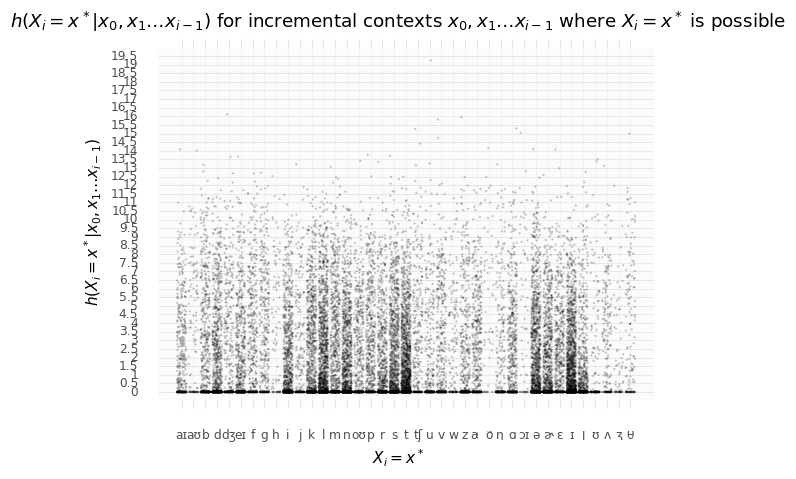

<ggplot: (8762905633975)>

In [208]:
hXistarX0h_by_xstar_plot = plot(hXistarX0h_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     title = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ for incremental contexts $x_0, x_1 \ldots x_{i-1}$ where $X_i = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     y_min = 0.0,
     y_max = 19.5,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXistarX0h_by_xstar_plot

#### $h(X_i = x^* | x_0, x_1, \ldots, x_{i-1} \_\_; x_{i+1})$ for all licit global incremental contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1 \ldots x_{i-1})$ for all licit global incremental contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1, \ldots, x_{i-1} \_\_, x_{i+1})$ for all licit global incremental contexts of $x^*$

#### $\sum\limits_{x_0, x_1 \ldots x_{i-1}} p(x_0, x_1 \ldots x_{i-1}|X_i = x^*) h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ for all licit global incremental contexts of $x^*$

$p(x_0, x_1 \ldots x_{i-1} | X_i = x^*) = \frac{p(x_0, x_1 \ldots x_{i-1}, X_i = x^*)}{\sum\limits_{x'_0, x'_1 \ldots x'_{i-1}, X'_i = x^*} p(x'_0, x'_1 \ldots x'_{i-1}, X'_i = x^*)}$

In [209]:
# prefixNorm = lambda x_i_star: sum(pX0i[r] for r in prefixesEndingWith[x_i_star])
prefixNorms = {x_i_star:sum(pX0i[r] for r in prefixesEndingWith[x_i_star])
               for x_i_star in X1s}

# as above, let h = i-1
pX0hXistar = {x_star:{dropLast(x0i):pX0i[x0i] / prefixNorms[x_star]
                      for x0i in prefixesEndingWith[x_star]}
              for x_star in X1s}

areNormalized(pX0hXistar) #one would hope so

True

In [210]:
ICIxstar = {x_star:sum(pX0hXistar[x_star][x0h] * hXistarX0h_for_all_licit_prefixes_by_xstar[x_star][x0h]
                       for x0h in set(map(dropLast,
                                          prefixesEndingWith[x_star])))
            for x_star in X1s}

In [211]:
ICIxstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(xstar),
#                                     '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                     '$x_0.\_.x_2$':'{0}'.format(x02),
                                    '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$':ICIxstar[xstar]}
                                   for xstar in ICIxstar])
ICIxstar_df.head()

,"$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$",$x^*$
0,3.240882,oʊ
1,3.339827,eɪ
2,1.250634,u
3,4.895002,g
4,3.760345,h


In [212]:
ICIxstar_df.sort_values(['$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$'], ascending=False)

,"$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$",$x^*$
16,6.036484,ɔɪ
3,4.895002,g
6,4.824377,j
26,4.359952,aʊ
10,4.042368,f
30,3.866174,aɪ
9,3.846179,b
4,3.760345,h
17,3.755569,w
12,3.704972,dʒ


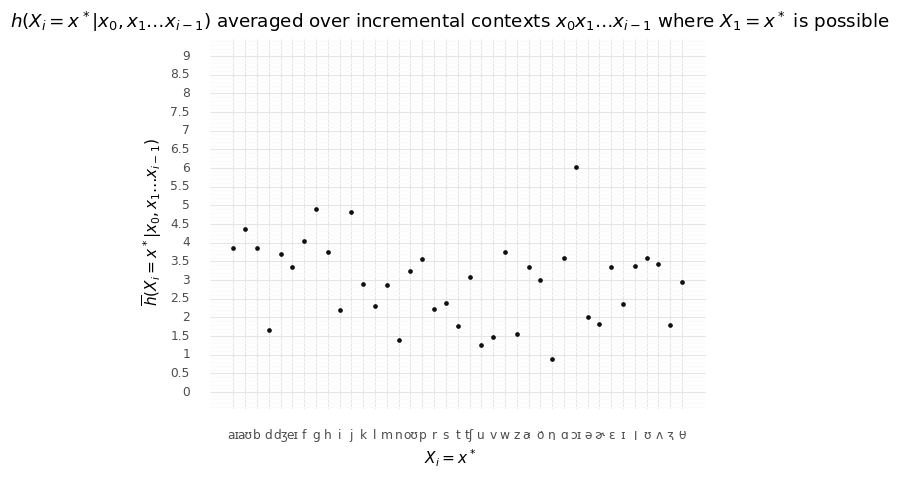

<ggplot: (8762891986089)>

In [213]:
ICIxstar_plot = plot(ICIxstar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     title = '$h(X_i = x^*|x_0, x_1 \ldots x_{i-1})$ averaged over incremental contexts $x_0 x_1 \ldots x_{i-1}$ where $X_1 = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{h}(X_i = x^*|x_0, x_1 \ldots x_{i-1})$', 
     y_min = 0.0,
     y_max = 9.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
ICIxstar_plot

### Total context

#### $h(X_i = x^* | x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

#### $i(X_i = x^* ; x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

#### $\sum\limits_{x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f} p(x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f) h(X_i = x^*|x_0, x_1 \ldots x_{i-1}, \_\_, x_{i+1} \ldots x_{f-1}, x_f)$ for all licit global total contexts of $x^*$

## Distortion-like measures

### Setup

$\hat{p}(\widehat{X}_0^f|X_0^i;X_{i+1}) = \hat{p}(\widehat{X}_0^f|X_0^k)$:

In [214]:
%ls *phatXhat0fX0k*

'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_10095954.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_1037019.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_11426428.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_13397192.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_13582972.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14640243.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14722855.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_2346798.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_3982729.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_451757.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_5959886.npy'
'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_6745050.npy'
'Hammond-aligned_destressed_pseudocount0.001 ph

In [215]:
incPosterior_fn_suff = 'phatXhat0fX0k'
incPosterior_fn_suff_K2only = incPosterior_fn_suff + '_K2only'
incPosterior_ext = '.npy'

my_fn_suff = incPosterior_fn_suff_K2only
# my_N = None
# my_N = 80274
# my_N = 230951
# my_N = 638730
# my_N = 1242546
# my_N = 2565635
# my_N = 5081610
# my_N = 6856011
# my_N = 13548436
# my_N = 14631215
my_N = 14722855
my_fn_suff = my_fn_suff + '_{0}'.format(my_N) if my_N is not None else my_fn_suff

incPosterior_fn = which + ' ' + my_fn_suff
incPosterior_fn

'Hammond-aligned_destressed_pseudocount0.001 phatXhat0fX0k_K2only_14722855'

In [216]:
phatXhat0fX0k_np = np.load(incPosterior_fn + incPosterior_ext, allow_pickle = False)
phatXhat0fX0k_np.shape

(12565, 46186)

In [217]:
np.nansum(np.sum(phatXhat0fX0k_np, axis = 0)) # = number of columns with SOMETHING in them

46149.0

In [218]:
def phatXhat0fX0k(xhat0f, x0k):
    return phatXhat0fX0k_np[Wmap[xhat0f], prefixMap[x0k]]

In [219]:
# randPrefix = getRandomKey(pX0i)
randWord = getRandomKey(pW)
a_prefix = choice(list(getPrefixes(randWord)))
(randWord, a_prefix) # (randWord, randPrefix)

phatXhat0fX0k(randWord, a_prefix)

('⋊.m.ɛ.d.ɪ.k.⋉', '⋊.m.ɛ.d')

0.0010727159

In [220]:
x = np.array([[0,1,2], [3,4,5]]); x
x.transpose(1,0)

array([[0, 1, 2],
       [3, 4, 5]])

array([[0, 3],
       [1, 4],
       [2, 5]])

$p(\hat{X}_j = x_i|x_0^k)$:

For various reasons we want to construct a matrix representing which segment occurs in which wordform. To that end...

Let 
 - $\bar{l}$ represent the maximum length of any prefix.
 - $f$ = `x0kOHmap`
 - $f': C \rightarrow (s,\bar{l})$ denote the version of $f$ that maps the index $c$ of a prefix $x_0^k$ to an $(s,\bar{l})$ matrix representing the sequence of $l$ of length-$s$ one-hot vectors representing the sequence of symbols in $x_0^k$, plus $\bar{l} - l$ extra columns of all-0 vectors.
 - $O' :: (n,s,\bar{l})$ represent the stack of $n$ matrices from each of the $n$ words in the lexicon.
 - $O :: (s,\bar{l}, n)$ represent the transposition (`O_prime.transpose(1,2,0)`)
 - NB: $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th prefix $x_0^k$ is $x_i$.

In [221]:
l_bar = max(wordlengthsInclEdges)

# O_prime = np.zeros((len(Ws), len(Xs_lex), max(wordlengthsInclEdges)))
# O_prime.shape

# Ws_l = sorted(list(Ws))

# for i in range(O_prime.shape[0]):
#     O_prime[i] = paddedX0kOHmap(Ws_l[i], l_bar)
# O_prime.shape

In [222]:
x0kOHmap('b.i.p').shape

def paddedX0kOHmap(x0k, max_l):
    l = len(ds2t(x0k))
    return np.hstack([x0kOHmap(x0k)] + [np.zeros((len(Xs_lex),1)) for each in range(max_l - l)])

paddedX0kOHmap('b.i.p', l_bar).shape

(41, 3)

(41, 18)

In [223]:
O_prime = np.stack([paddedX0kOHmap(x0f, l_bar) for x0f in sorted(list(Ws))])
O_prime.shape
O = O_prime.transpose(1,2,0)
O.shape
' '
np.allclose(O[:,:,0], paddedX0kOHmap('⋊.aɪ.b.ə.s.⋉', l_bar))
np.allclose( O_prime[0], paddedX0kOHmap('⋊.aɪ.b.ə.s.⋉', l_bar) )

(12565, 41, 18)

(41, 18, 12565)

' '

True

True

For various reasons, we also want to construct, for each prefix, the sequence of marginal (posterior) distributions over each segment (given that the prefix has been produced). To that end...

Let 
 - $\widehat{W} :: (n,m)$ be the matrix representing $\hat{p}(\widehat{X}_0^f|X_0^k)$.
 - $x_i$ denote the $i$th segment type among the relevant set of segment types $X$.
 - $\hat{X}_j$ denote the $j$th segment in some wordform $w$.
 - $c$ be the index of some prefix $x_0^k$.
 - $T :: (m,s,\bar{l})$, where
    - $T_{c,i,j} = p(\hat{X}_j = x_i|x_0^k) = \sum\limits_{\hat{x}_0^f:\hat{x}_j = x_i} p(\hat{x}_0^f|x_0^k) = O_{i,j,:} \cdot \hat{W}_{:,c} = \sum\limits_{w} O_{i,j,w} \hat{W}_{w,c}$.
    - I.e. $T_{c,:,:}$ is a matrix representing the sequence of marginal distributions (=columns) over $\hat{X}_j$ given that prefix $c$ has been produced.

In [224]:
# 12m [kotoba/cpython]
# ?m [wittgenstein/cpython]
T = np.einsum('ijw,wc->cij', O, phatXhat0fX0k_np)
T.shape

(46186, 41, 18)

In [225]:
#normalize each distribution (err,'row' = axis 1)
T_row_sums = T.sum(axis=1, keepdims=True)
T_normalized = T / T_row_sums
np.allclose(T, T_normalized)

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


False

In [ ]:
# from numba import jit, njit
# @jit(parallel=True)
# def makeT(M, S, L_bar):
#     T = np.zeros((M, S, L_bar))
# #     T.shape
#     if N == 0:
#         return T

#     for c in np.arange(T.shape[0]):
#         for i in np.arange(T.shape[1]):
#             for j in np.arange(T.shape[2]):
#                 T[c,i,j] = np.dot(O[i,j], phatXhat0fX0k_np[:,c])
#     return T
# makeT(0,10,20)
# makeT(0,10,20)
# makeT(0,10,20)

# # takes >>20m [kotoba/python3]
# T = makeT(len(prefixes), len(Xs_lex), l_bar)
# T.shape

In [226]:
T_fn = which + ' pXhatjX0k_K2only' + '.npy'
np.save(T_fn, T_normalized, allow_pickle=False)

In [227]:
T_fn = which + ' pXhatjX0k_K2only' + '.npy'
T_normalized = np.load(T_fn, allow_pickle=False)

In [ ]:
# T.shape

In [228]:
T_normalized.shape

(46186, 41, 18)

In [229]:
T_normalized.nbytes / 1e6

272.682144

In [230]:
def pXhatj_xStar_x0k(j, x_star, x0k):
    return T_normalized[prefixMap[x0k],Xs_lexMap[x_star],j]

In [231]:
len(Xs_lex)

41

In [232]:
#8.81s [kotoba/cpython]
#?s [wittgenstein/cpython]
pXhatj_xStar_x0k_dict = {x0k:{j:{x_prime:pXhatj_xStar_x0k(j, x_prime, x0k)
                                 for x_prime in Xs_lex}
                              for j in range(l_bar)}
                         for x0k in prefixes}

$p(\widehat{X_i} = x'|x_0^k)$:

In [233]:
def pXhatiX0k_calc(x_prime, x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    # This function call should never happen...
    # but if it does, this is intended(?) to satisfy 
    # subsequent normalization checking
    if len(x0k) == 1 and x0k == '⋊':
        if x_prime == '⋊':
            return 1.0
        else:
            return 0.0
    
    x_i = x0k_t[-2]
    x_star = x_i
    i = l - 2
    
#     x0k_idx = prefixMap[x0k]
#     my_wordforms = wordsWhereXiIs(x_prime, i)
#     return np.sum([phatXhat0fX0k_np[Wmap[w], x0k_idx] for w in my_wordforms])
    return pXhatj_xStar_x0k_dict[x0k][i][x_prime]

pXhatiX0k = {x0k:{x_prime:pXhatiX0k_calc(x_prime, x0k)
                  for x_prime in Xs_lex}
             for x0k in prefixes}

In [234]:
randPrefix = getRandomKey(pX0i)
randPrefix

'⋊.ɪ.n.ɑ.k.j.ʊ.l.eɪ.t.⋉'

In [235]:
pXhatiX0k_calc('s', randPrefix)

0.0

In [236]:
wordsWithPrefix(randPrefix)

{'⋊.ɪ.n.ɑ.k.j.ʊ.l.eɪ.t.⋉'}

In [237]:
pXhatiX0k[randPrefix]

{'oʊ': 0.0,
 'eɪ': 0.0,
 'u': 0.0,
 'g': 0.0,
 'h': 0.0,
 'z': 0.0,
 'j': 0.0,
 'ʊ': 0.0,
 'tʃ': 0.0,
 '⋉': 0.0,
 'b': 0.0,
 'k': 0.0,
 'f': 0.0,
 'dʒ': 0.0,
 't': 1.0,
 'ə': 0.0,
 's': 0.0,
 'ɔɪ': 0.0,
 'w': 0.0,
 'ɛ': 0.0,
 'i': 0.0,
 '⋊': 0.0,
 'v': 0.0,
 'd': 0.0,
 'ð': 0.0,
 'ʃ': 0.0,
 'n': 0.0,
 'ɚ': 0.0,
 'aʊ': 0.0,
 'p': 0.0,
 'ɑ': 0.0,
 'ɪ': 0.0,
 'aɪ': 0.0,
 'l': 0.0,
 'ŋ': 0.0,
 'ʌ': 0.0,
 'r': 0.0,
 'm': 0.0,
 'ʒ': 0.0,
 'æ': 0.0,
 'θ': 0.0}

In [238]:
areNormalized(pXhatiX0k)
[each for each in pXhatiX0k if not isclose(norm(pXhatiX0k[each]), 1.0)] # this is fine...

False

['⋊.ʌ',
 '⋊.dʒ',
 '⋊.ð',
 '⋊.s',
 '⋊.p',
 '⋊.l',
 '⋊.ɑ',
 '⋊.g',
 '⋊.f',
 '⋊.ɪ',
 '⋊.m',
 '⋊.w',
 '⋊.j',
 '⋊.d',
 '⋊.ʃ',
 '⋊.aɪ',
 '⋊.aʊ',
 '⋊.æ',
 '⋊.b',
 '⋊.v',
 '⋊.r',
 '⋊.k',
 '⋊.oʊ',
 '⋊.eɪ',
 '⋊.i',
 '⋊.ə',
 '⋊.h',
 '⋊.n',
 '⋊.θ',
 '⋊.ɛ',
 '⋊.ɔɪ',
 '⋊.z',
 '⋊.tʃ',
 '⋊.ɚ',
 '⋊.u',
 '⋊.t']

$p(\widehat{X_i}|x_0^f)$:

In [239]:
def pXhatiX0f_calc(i, x_prime, x0f):
    x0f_t = ds2t(x0f)
    l = len(x0f_t)
    
    if len(x0f) == 1 and x0f == '⋊':
        if x_prime == '⋊':
            return 1.0
        else:
            return 0.0
    if i >= l:
        return 0.0

    x_i = x0f_t[i]
    x_star = x_i
#     i = l - 2
    
#     x0k_idx = prefixMap[x0k]
#     my_wordforms = wordsWhereXiIs(x_prime, i)
#     return np.sum([phatXhat0fX0k_np[Wmap[w], x0k_idx] for w in my_wordforms])
    return pXhatj_xStar_x0k_dict[x0f][i][x_prime]

pXhatiX0f = {x0f:{i:{x_prime:pXhatiX0f_calc(i, x_prime, x0f)
                     for x_prime in Xs_lex}
                  for i in range(l_bar)}
             for x0f in Ws}

In [240]:
for x0f in pXhatiX0f:
    for i in pXhatiX0f[x0f]:
        if not isNormalized(pXhatiX0f[x0f][i]):
            if not ds2t(x0f)[-1] == rightEdge:
                print((x0f, i, norm(pXhatiX0f[x0f][i])))

In [245]:
randW = getRandomKey(pW)

In [246]:
randW

'⋊.l.ɑ.r.i.ə.t.⋉'

In [247]:
pXhatiX0f[randW][3]

{'oʊ': 0.0,
 'eɪ': 0.0,
 'u': 0.0,
 'g': 0.0,
 'h': 0.0,
 'z': 0.0,
 'j': 0.0,
 'ʊ': 0.0,
 'tʃ': 0.0,
 '⋉': 0.0,
 'b': 0.0,
 'k': 0.0,
 'f': 0.0,
 'dʒ': 0.0,
 't': 0.0,
 'ə': 0.0,
 's': 0.0,
 'ɔɪ': 0.0,
 'w': 0.0,
 'ɛ': 0.0,
 'i': 0.0,
 '⋊': 0.0,
 'v': 0.0,
 'd': 0.0,
 'ð': 0.0,
 'ʃ': 0.0,
 'n': 0.0,
 'ɚ': 0.0,
 'aʊ': 0.0,
 'p': 0.0,
 'ɑ': 0.0,
 'ɪ': 0.0,
 'aɪ': 0.0,
 'l': 0.0,
 'ŋ': 0.0,
 'ʌ': 0.0,
 'r': 1.0,
 'm': 0.0,
 'ʒ': 0.0,
 'æ': 0.0,
 'θ': 0.0}

### $h(\hat{X}_i = x^* | x_0 \ldots x_{i-1}; X_i = x^*)$

### $H(\hat{X}_i | x_0 \ldots x_{i-1}; X_i = x^*)$

### $H(\hat{X}_i | X_0 \ldots X_{i-1}; X_i = x^*)$

### $I(\hat{X}_i ; X_0 \ldots X_{i-1} | X_i = x^*)$

### $h(\hat{X}_i = x^* | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

 - For each $x^*$, collect the set of prefixes $R_{x^*} = \{x_0^{i}; x_{i+1} | x_i = x^*\}$.
 - For each such prefix $r_j = x_0^{i+1}$, what is $p(\hat{X}_i = x^* | x_0^{i+1} = r_j)$?

$\{\hat{p}(\widehat{X}_i = x^* | x_0^i;x_{i+1}) | x_i = x^* \}$

In [248]:
pXhatiStarX0k = {x_star:{x0k:pXhatiX0k[x0k][x_star]
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs}
#                  for x_star in Xs_lex}

In [249]:
hXhatiStarX0k = {x_star:{x0k:h_prime( pXhatiStarX0k[x_star][x0k] )
                         for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                 for x_star in Xs}

In [250]:
def removeXi(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-2]
    before_ds = t2ds(before_t)
    x_i = x0k_t[-2]
#     i = l - 2
    x_k = x0k_t[-1]
    return before_ds + '._.' + x_k

removeXi('b.i.p.b.u.p')

'b.i.p.b._.p'

In [251]:
def leftContext(x0k):
    x0k_t = ds2t(x0k)
    l = len(x0k_t)
    
    before_t = x0k_t[:-3]
    before_ds = t2ds(before_t)
#     x_i = x0k_t[-2]
#     i = l - 2
#     x_k = x0k_t[-1]
    return before_ds# + '._.' + x_k

leftContext('b.i.p.b.u.p')
leftContext('b.i.p')

'b.i.p'

''

In [252]:
hXhatiStarX0k_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                         'incremental context':removeXi(x0k),
                                         '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':hXhatiStarX0k[x_star][x0k]}
                                        for x_star in Xs for x0k in hXhatiStarX0k[x_star]])
hXhatiStarX0k_df.head()

,"$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$",$x^*$,incremental context
0,-0.000000,oʊ,⋊.æ.k.r.ə.m._.n
1,0.163991,oʊ,⋊.ɪ.k.s.p._.n
2,0.001740,oʊ,⋊.oʊ.v.ɚ.f.l._.⋉
3,0.271545,oʊ,⋊.l._.r
4,-0.000000,oʊ,⋊.p.oʊ.r.t.f.oʊ.l.i._.⋉


In [253]:
hXhatiStarX0k_df.sort_values(['$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

,"$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$",$x^*$,incremental context
32391,6.756002,ɑ,⋊.n._.⋉
46025,6.612276,θ,⋊.ɛ.n._.⋉
41547,6.245415,ʌ,⋊.h.w._.t
32537,5.931919,ɑ,⋊._.⋉
23903,5.753505,ð,⋊.l.aɪ._.⋉
1851,5.579777,eɪ,⋊.ɪ.m._.g
22532,5.346026,d,⋊.ʃ.ɑ.r._.⋉
23873,5.233229,ð,⋊.b.eɪ._.⋉
21913,5.103856,v,⋊._.aʊ
14807,5.031551,ə,⋊.r._.d


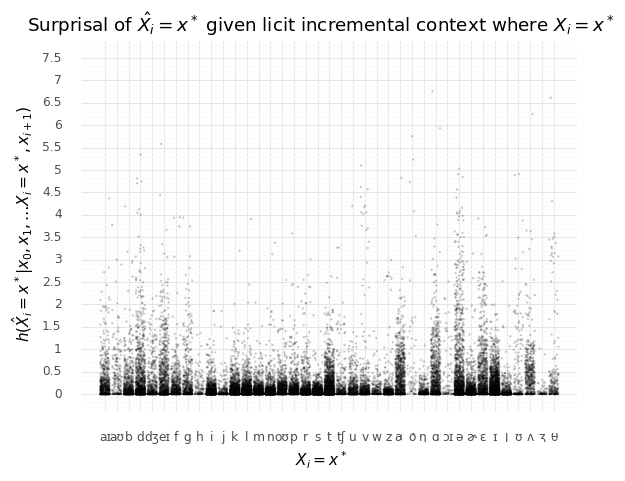

<ggplot: (-9223363273962758631)>

In [254]:
hXhatiStarX0k_plot = plot(hXhatiStarX0k_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given licit incremental context where $X_i = x^*$', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 7.5,
     size=smallSize, 
     alpha=lowAlpha,
#      alpha=medAlpha,
     width=largeWidth)
hXhatiStarX0k_plot

### $H(\hat{X}_i | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

In [255]:
# 3.2s [kotoba/python3]
incrementalEntropies_by_x0k = {x0k:H(ProbDist(pXhatiX0k[x0k]))
                               for x0k in prefixes}

In [256]:
incrementalEntropies_by_xstar_by_x0k = {x_star:{x0k:incrementalEntropies_by_x0k[x0k]
                                                for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                                        for x_star in Xs_lex}

In [257]:
HXhatiXstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                       'incremental context':removeXi(x0k),
                                       '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$':incrementalEntropies_by_xstar_by_x0k[x_star][x0k]}
                                        for x_star in Xs for x0k in incrementalEntropies_by_xstar_by_x0k[x_star]])
HXhatiXstar_df.head()

,"$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$",$x^*$,incremental context
0,0.000000,oʊ,⋊.æ.k.r.ə.m._.n
1,0.761045,oʊ,⋊.ɪ.k.s.p._.n
2,0.013423,oʊ,⋊.oʊ.v.ɚ.f.l._.⋉
3,1.053853,oʊ,⋊.l._.r
4,0.000000,oʊ,⋊.p.oʊ.r.t.f.oʊ.l.i._.⋉


In [258]:
HXhatiXstar_df.sort_values(['$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$'], ascending=False)

,"$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$",$x^*$,incremental context
15722,4.044402,ɔɪ,⋊._.l
15781,4.021236,ɔɪ,⋊._.n
4105,4.013234,z,⋊._.ɛ
37029,3.993628,aɪ,⋊._.ɑ
37206,3.988939,aɪ,⋊._.v
3630,3.988431,z,⋊._.i
4142,3.972816,z,⋊._.ɪ
29823,3.956443,ɚ,⋊._.ɪ
37368,3.955293,aɪ,⋊._.oʊ
3981,3.907737,z,⋊._.eɪ


/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 3 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


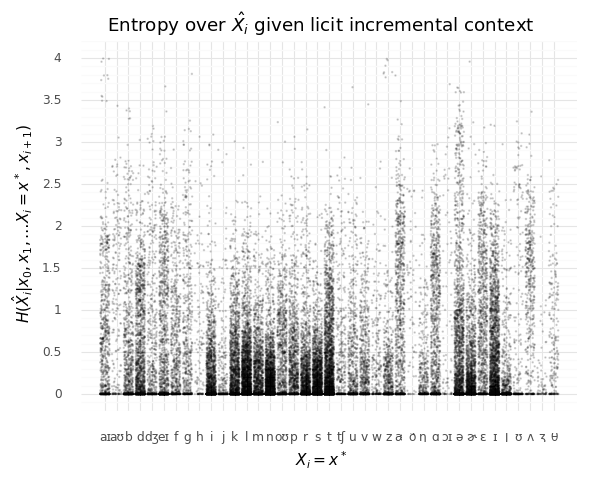

<ggplot: (-9223363274203005180)>

In [259]:
HXhatiXstar_plot = plot(HXhatiXstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     title = 'Entropy over $\hat{X_i}$ given licit incremental context', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i|x_0, x_1, \ldots X_i = x^*, x_{i+1})$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
HXhatiXstar_plot

### $H(\hat{X}_i | X_0 \ldots X_{i-1}, X_i = x^*; X_{i+1})$

$H(\hat{X}_i | X_0 \ldots X_{i-1}, X_i = x^*; X_{i+1}) = \sum\limits_{x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1}} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) H(\hat{X}_i | x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, similar to a calculation further above (`pX0hXistar`).

In [ ]:
# pX0kXistar = {x_star:{removeXi(x0k):pX0i[x0k] / sum(pX0i[x0k_prime] for x0k_prime in prefixesWhoseSecondToLastSegIs[x_star])
#                       for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
#               for x_star in Xs_lex}

# terribly inefficient naive calculation, yes
# 11.2s [kotoba/python3]
pX0kXistar = {x_star:{x0k:pX0i[x0k] / sum(pX0i[x0k_prime] for x0k_prime in prefixesWhoseSecondToLastSegIs[x_star])
                      for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
              for x_star in Xs}
assert areNormalized(pX0kXistar)
pX0kXistar = condDistsAsProbDists(pX0kXistar)

In [ ]:
avgIncrementalEntropies_by_xstar = {x_star:sum(pX0kXistar[x_star][x0k] * incrementalEntropies_by_x0k[x0k]
                                               for x0k in prefixesWhoseSecondToLastSegIs[x_star])
                                    for x_star in Xs}

In [ ]:
avgHXhatiXstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                       '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$':avgIncrementalEntropies_by_xstar[x_star]}
                                        for x_star in Xs])
avgHXhatiXstar_df.head()

In [ ]:
avgHXhatiXstar_df.sort_values(['$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$'], ascending=False)

In [ ]:
avgHXhatiXstar_plot = plot(avgHXhatiXstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$', 
     title = 'Entropy over $\hat{X_i}$, averaged over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i|X_0, X_1, \ldots X_i = x^*, X_{i+1})$', 
     y_min = 0.0,
     y_max = 2.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
avgHXhatiXstar_plot

### $h(\widehat{X_i} = x^*|X_i = x^*)$ (marginalizing over all choices of $i$)

$p(\widehat{X}_i = x' |X_i = x^*) = \sum\limits_{x_0^{i}; x_{i+1} : X_i = x^*} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) p(\widehat{X}_i = x'|x_0, x_1, \ldots X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, as calculated above (`pX0kXistar`) and similar to a calculation further above (`pX0hXistar`).

In [ ]:
def pXhatiXi_calc(x_prime, x_star):
    x_star_idx = Xs_lexMap[x_star]
    x_prime_idx = Xs_lexMap[x_prime]
    
    my_prefixes = prefixesWhoseSecondToLastSegIs[x_star]
    return np.sum([pX0kXistar[x_star][x0k] * pXhatiX0k[x0k][x_prime]
                   for x0k in my_prefixes])

In [ ]:
pXhatiXi = {x_star:{x_prime:pXhatiXi_calc(x_prime, x_star)
                    for x_prime in Xs}
            for x_star in Xs}
assert areNormalized(pXhatiXi)
pXhatiXi = condDistsAsProbDists(pXhatiXi)

In [ ]:
hXhatiStarXiStar = {x_star:h_prime(pXhatiXi[x_star][x_star])
                    for x_star in Xs}

In [ ]:
hXhatiStarXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                            '$h(\hat{X}_i = x^*|X_i = x^*)$':hXhatiStarXiStar[x_star]}
                                           for x_star in Xs])
hXhatiStarXiStar_df.head()

In [ ]:
hXhatiStarXiStar_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=False)

In [ ]:
hXhatiStarXiStar_close = plot(hXhatiStarXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given $X_i = x^*$, averaging over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     y_min = 0.0,
     y_max = 1.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
hXhatiStarXiStar_close

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)$ (version 1)

$i(\widehat{X}_i = x^*;x_0, x_1, \ldots x_{i+1} | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^* | x_0, x_1, \ldots X_i = x^*; x_{i+1})$

Here, the probability distribution underlying $h(\widehat{X}_i = x^* | X_i = x^*)$ is taken to be the marginal distribution over all possible choices of prefix (and therefore choices of $i$).

In [ ]:
iXhatiStarX0kXiStar = {x_star:{x0k:hXhatiStarXiStar[x_star] - hXhatiStarX0k[x_star][x0k]
                               for x0k in prefixesWhoseSecondToLastSegIs[x_star]}
                       for x_star in Xs}

In [ ]:
iXhatiStarX0kXiStar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                               'incrmental context':removeXi(x0k),
                                               '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$':iXhatiStarX0kXiStar[x_star][x0k]}
                                        for x_star in Xs for x0k in iXhatiStarX0kXiStar[x_star]])
iXhatiStarX0kXiStar_df.head()

In [ ]:
iXhatiStarX0kXiStar_df.sort_values(['$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$'], ascending=False)

In [ ]:
iXhatiStarX0kXiStar_plot = plot(iXhatiStarX0kXiStar_df, 
     x_col = '$x^*$', 
     y_col = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     title = '$i(\widehat{X_1} = x^*; x_0, x_1, \ldots \_, x_{i+1} | X_1 = x^*)$ over incremental contexts where $X_i = x^*$ is possible', 
     x_label = '$X_i = x^*$', 
     y_label = '$i(\hat{X}_i = x^*; x_0, x_1, \ldots \_, x_{i+1} |X_i = x^*)$', 
     y_min = -7.0,
     y_max = 1.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
iXhatiStarX0kXiStar_plot

### $h(\widehat{X_i} = x^*|X_i = x^*)$ (for each choice of $i$)

$p(\widehat{X}_i = x' |X_i = x^*) = \sum\limits_{x_0^{i}; x_{i+1} : X_i = x^*} p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) p(\widehat{X}_i = x'|x_0, x_1, \ldots X_i = x^*; x_{i+1})$

where $p(x_0 \ldots x_{i-1}, x_{i+1}|X_i = x^*) = \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1})}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1}} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1})}$, almost as calculated above (`pX0kXistar`) and similar to a calculation further above (`pX0hXistar`), but where normalization is done only by summing over prefixes matched for length/specific value of $i$.

In [ ]:
xiToX0ks = {x_star:{i:{each for each in prefixesWhoseSecondToLastSegIs[x_star] if len(ds2t(each)) == i + 2}
                    for i in range(l_bar)}
            for x_star in Xs}

In [ ]:
xstarToIs = {x_star:{i for i in range(l_bar) if len(xiToX0ks[x_star][i]) > 0}
             for x_star in Xs}

In [ ]:
# ~1.41s [kotoba/python3]
# terribly naive and inefficient calculation
pX0kXistar_i = {x_star:{i:{x0k:pX0i[x0k] / sum(pX0i[x0k_prime] 
                                               for x0k_prime in xiToX0ks[x_star][i])
                           for x0k in xiToX0ks[x_star][i]}
                        for i in xstarToIs[x_star]}
                for x_star in Xs}

In [ ]:
for x_star, i in product(Xs, range(l_bar)):
    if i in pX0kXistar_i[x_star] and len(pX0kXistar_i[x_star][i]) != 0:
        assert isNormalized(pX0kXistar_i[x_star][i])
        pX0kXistar_i[x_star][i] = ProbDist(pX0kXistar_i[x_star][i])

In [ ]:
def pXhatiXi_i_calc(x_prime, x_star, i):
    x_star_idx = Xs_lexMap[x_star]
    x_prime_idx = Xs_lexMap[x_prime]
    
    l = i + 2
#     my_prefixes = set.intersection(prefixesWhoseSecondToLastSegIs[x_star],
#                                    prefixesWithLength(l))
    my_prefixes = xiToX0ks[x_star][i]
    return np.sum([pX0kXistar_i[x_star][i][x0k] * pXhatiX0k[x0k][x_prime]
                   for x0k in my_prefixes])

pXhatiXi_i = {x_star:{i:{x_prime:pXhatiXi_i_calc(x_prime, x_star, i)
                         for x_prime in Xs}
                      for i in xstarToIs[x_star]}
              for x_star in Xs}

In [ ]:
for x_star, i in product(Xs, range(l_bar)):
    if i in pXhatiXi_i[x_star]:
        assert isNormalized(pXhatiXi_i[x_star][i]) or isclose(norm(pXhatiXi_i[x_star][i]), 0.0)
        if isNormalized(pXhatiXi_i[x_star][i]):
            pXhatiXi_i[x_star][i] = ProbDist(pXhatiXi_i[x_star][i])
    #     if len(pX0kXistar_i[x_star][i]) != 0:
    #         assert isNormalized(pX0kXistar_i[x_star][i])
    #         pX0kXistar_i[x_star][i] = ProbDist(pX0kXistar_i[x_star][i])

In [ ]:
hXhatiStarXiStar_i = {x_star:{i: h_prime(pXhatiXi_i[x_star][i][x_star])
                              for i in xstarToIs[x_star]}
                      for x_star in Xs}

In [ ]:
hXhatiStarXiStar_i_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                              '$i$':'{0}'.format(i),
                                            '$h(\hat{X}_i = x^*|X_i = x^*)$':hXhatiStarXiStar_i[x_star][i]}
                                           for x_star in Xs for i in xstarToIs[x_star]])
hXhatiStarXiStar_i_df.head()

In [ ]:
hXhatiStarXiStar_i_df.sort_values(['$h(\hat{X}_i = x^*|X_i = x^*)$'], ascending=False)

In [ ]:
hXhatiStarXiStar_i_close = plot(hXhatiStarXiStar_i_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     title = 'Surprisal of $\hat{X_i} = x^*$ given $X_i = x^*$, averaging over licit incremental contexts of the same length', 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_i = x^*|X_i = x^*)$', 
     y_min = 0.0,
     y_max = 4.5,
     size=medSize, 
     alpha=medAlpha,
     width=largeWidth)
hXhatiStarXiStar_i_close

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)$ (version 2)

$i(\widehat{X}_i = x^*;x_0, x_1, \ldots x_{i+1} | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^* | x_0, x_1, \ldots X_i = x^*; x_{i+1})$

Here, the probability distribution underlying $h(\widehat{X}_i = x^* | X_i = x^*)$ is taken to be the marginal distribution over all possible choices of prefix **for a specific $i$ matched to that in the righthand term**.

### $H(\widehat{X_i}|X_i = x^*)$

$H(\widehat{X_i}|X_i = x^*) = \sum\limits_{x'} p(\widehat{X_i} = x'|X_i = x^*) h(\widehat{X_i} = x' | X_i = x^*)$

In [ ]:
H(pXhatiXi['z'])

In [ ]:
HXhatiXi = {x_star:sum(pXhatiXi[x_star][x_prime] * h_prime(pXhatiXi[x_star][x_prime])
                       for x_prime in Xs)
            for x_star in Xs}

In [ ]:
HXhatiXi_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                    '$H(\hat{X}_i| X_i = x^*)$':HXhatiXi[x_star]}
                                   for x_star in Xs])
HXhatiXi_df.head()

In [ ]:
HXhatiXi_df.sort_values(['$H(\hat{X}_i| X_i = x^*)$'], ascending=False)

In [ ]:
HXhatiXi_df_plot = plot(HXhatiXi_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_i| X_i = x^*)$', 
     title = '$H(\widehat{X_i}| X_i = x^*)$ averaged over licit incremental contexts', 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_i| X_i = x^*)$', 
     y_min = 0.0,
     y_max = 2.5,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
HXhatiXi_df_plot

### $I(\hat{X}_i ; X_0 \ldots X_{i-1}, X_{i+1} | X_i = x^*)$

$I(\widehat{X_1}; X_0 \ldots X_{i-1}, X_{i+1} | X_i = x^*) = H(\widehat{X_i} | X_i = x^*) - H(\widehat{X_i} | X_0 \ldots X_{i-1}, X_{i} = x^*, X_{i+1})$

In [ ]:
IXhatiX0kXi_by_xstar = {x_star:HXhatiXi[x_star] - avgIncrementalEntropies_by_xstar[x_star]
                        for x_star in Xs}

In [ ]:
IXhatiX0kXi_by_xstar_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                                '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$':IXhatiX0kXi_by_xstar[x_star]}
                                               for x_star in Xs])
IXhatiX0kXi_by_xstar_df.head()

In [ ]:
IXhatiX0kXi_by_xstar_df.sort_values(['$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$'], ascending=False)

In [ ]:
IXhatiX0kXi_by_xstar_plot = plot(IXhatiX0kXi_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     title = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     x_label = '$X_i = x^*$', 
     y_label = '$I(\widehat{X_i}; X_0 \ldots X_{i-1}, X_{i+1}| X_i = x^*)$', 
     y_min = 0.0,
     y_max = 1.0,
     size=largeSize, 
     alpha=highAlpha,
     width=0.0)
IXhatiX0kXi_by_xstar_plot

### Average incremental contextual perceptual contrast: $D_{\overline{C}}(x^*,x') = D_{JS}(p(Y_i|X_i = x^*) || p(Y_i| X_i = x'))$

#FIXME

Suppose $c = x_0 \ldots x_{i-1}, x_{i+1}$ is a context that both $x^*$ and $x'$ can appear in as $x_i$. Then

$D_c(x^*, x') = D_{KL}(p(Y_i|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) || p(Y_i|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})) \\ = \sum\limits_{y} p(Y_i = y|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) \log \frac{p(Y_i = y|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1})}{p(Y_i = y|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})}$

measures how perceptually discriminable or contrastive $x^*$ is from $x'$ in context $c = x_0 \ldots x_{i-1}, x_{i+1}$ given that $x^*$ was actually produced: this measure will be 0 iff $p(Y_i|x_0 \ldots x_{i-1} X_i = x^*; x_{i+1}) = p(Y_i|x_0 \ldots x_{i-1} X_i = x'; x_{i+1})$ and increase the more distinct they are.

#FIXME

If we take the expectation of this with respect to the set of common contexts $C_{X_i}(x^*, x') = \{x_0 \ldots x_{i-1}, x_{i+1}| x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1} \in W \land x_0 \ldots x_{i-1}, X_i = x', x_{i+1} \in W\}$, we have a measure of how perceptually discriminable $x^*$ is from $x'$:

$D_{\overline{C}}(x^*,x') = \sum\limits_{x_0 \ldots x_{i-1}, x_{i+1} \in C_{X_i}(x^*, x')} \frac{p(x_0 \ldots x_{i-1}, x_{i+1} | X_i = x^*)}{\sum\limits_{x'_0 \ldots x'_{i-1}, x'_{i+1} \in C_{X_i}(x^*, x')} p(x'_0 \ldots x'_{i-1}, x'_{i+1} | X_i = x^*)} D_{KL}(p(Y_i|x_0 \ldots x_{i-1}, X_i = x^*; x_{i+1}) || p(Y_i| x_0 \ldots x_{i-1}, X_i = x'; x_{i+1}))$

**Note** that since the distribution over $Y_i$ depends **only** on $X_{i-1}, X_i, X_{i+1}$, this measure will *only differ from the corresponding triphone language heatmap* for two reasons:
 - as a result of the difference in the distribution being used to take an expectation
 - as a result of the fact that the triphone language heatmap only considers word-medial triphone contexts.

In [ ]:
#whole cell takes ~3s [kotoba/python3]
def get_common_contexts_inc(x_star, x_prime):
    x_star_C = prefixesWhoseSecondToLastSegIs[x_star]
    x_prime_C = prefixesWhoseSecondToLastSegIs[x_prime]
    x_star_C_hole = set(map(removeXi,
                            x_star_C))
    x_prime_C_hole = set(map(removeXi,
                            x_prime_C))
    C = set.intersection(x_star_C_hole, x_prime_C_hole)
    return C

commonContexts_inc = {(x_star, x_prime):get_common_contexts_inc(x_star, x_prime)
                      for x_star, x_prime in product(Xs, Xs)}
noCommonContexts_inc = {(x_star, x_prime) 
                        for x_star, x_prime in commonContexts_inc 
                        if commonContexts_inc[(x_star, x_prime)] == set()}
list(commonContexts_inc[('i','u')])[:5]
len(noCommonContexts_inc) / 2
len(set(product(Xs, Xs))) / 2
list(noCommonContexts_inc)[:5]

In [ ]:
removeXi('b.i.p')
ds2t(removeXi('b.i.p'))
ds2t(removeXi('b.i.p'))[:3-2]
ds2t(removeXi('b.i.p'))[3-1:]

In [ ]:
def insertXi(x0k_w_hole, x_star):
    x0k_w_hole_t = ds2t(x0k_w_hole)
    l = len(x0k_w_hole_t)
    i = l - 2
    assert x0k_w_hole_t[i] == '_'
    before_hole = x0k_w_hole_t[:l-2]
    after_hole = x0k_w_hole_t[l-1:]
    filled_in = t2ds(before_hole) + '.' + x_star + '.' + t2ds(after_hole)
    return filled_in

insertXi('b.i.p.b._.p', 'u')

In [ ]:
def perceptualContrast_inc(x_star, x_prime, x0k_w_hole):
    assert x0k_w_hole in commonContexts_inc[(x_star, x_prime)]
    
    x0k_w_hole_t = ds2t(x0k_w_hole)
#     l = len(x0k_w_hole_t)
    localContext = t2ds(x0k_w_hole_t[-3:])
    
    channel_dist_xstar = p3Y1X012[fuse(localContext, x_star)]   #p3Y1X012_lex[fuse(localContext, x_star)]
    channel_dist_xprime = p3Y1X012[fuse(localContext, x_prime)] #p3Y1X012_lex[fuse(localContext, x_prime)]
    
#     pc = DKL(channel_dist_xstar, channel_dist_xprime)
    pc = JS(channel_dist_xstar, channel_dist_xprime)
    return pc

In [ ]:
def avgPerceptualContrast_inc(x_star, x_prime):
    C = tuple(commonContexts_inc[(x_star, x_prime)])
    if len(C) == 0:
#         print((x_star, x_prime))
        return np.nan
    
    fusedC = tuple([insertXi(c, x_star) for c in C])
    unnormed_probs = tuple([pX0kXistar[x_star][c] for c in fusedC])
#     unnormed_probs = tuple([pX02[c] for c in C])
    norm_term = sum(unnormed_probs)
    probs = tuple([p/norm_term for p in unnormed_probs])
    PCs = tuple([perceptualContrast_inc(x_star, x_prime, c) for c in C])
    
    terms = tuple(zip(probs, PCs))
    prods = tuple(map(prod, terms))
    s = sum(prods)
#     assert s == sum([pX02X1[x_star][fuse(c, x_star)] * perceptualContrast(x_star, x_prime, c)
#                      for c in C])
#     assert s == sum([(pX02X1[x_star][fuse(c, x_star)]/sum(pX02X1[x_star][c_prime] for c_prime in fusedC)) * perceptualContrast(x_star, x_prime, c)
#                      for c in C])
    return s

In [ ]:
len(p3Y1X012.keys())

In [ ]:
len(p3Y1X012_lex.keys())

In [ ]:
# 6.2s [kotoba/python3]
avgPC_inc = {(x_star, x_prime):avgPerceptualContrast_inc(x_star, x_prime)
             for x_star, x_prime in product(Xs, Xs)}

In [ ]:
[pair for pair in avgPC_inc if np.isnan(avgPC_inc[pair])]

In [ ]:
avgPC_inc_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                     "$x'$":'{0}'.format(x_prime),
#                                      '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                      '$x_0.\_.x_2$':'{0}'.format(x02),
                                 "$D_{\overline{C}}(x^*, x')$":avgPC_inc[(x_star, x_prime)]}
                                for x_star, x_prime in avgPC_inc])
avgPC_inc_df.head()

In [ ]:
noData_avgPC_inc = avgPC_inc_df[avgPC_inc_df["$D_{\overline{C}}(x^*, x')$"].isnull()]
noData_avgPC_inc.head()

In [ ]:
avgPC_inc_df[avgPC_inc_df["$x^*$"] == 't'].sort_values("$D_{\overline{C}}(x^*, x')$")

In [ ]:
avgPC_inc_hm_d = ggplot(avgPC_inc_df, aes("$x'$", "$x^*$"))
avgPC_inc_hm_d = avgPC_inc_hm_d + scale_fill_gradient(low = "white", high = 'black', na_value='yellow')
avgPC_inc_hm_d = avgPC_inc_hm_d + geom_tile(aes(fill="$D_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="white") + coord_fixed()
avgPC_inc_hm_d = avgPC_inc_hm_d + geom_tile(fill = 'yellow', data = noData_avgPC_inc) + coord_fixed()
avgPC_inc_hm_d = avgPC_inc_hm_d + ggtitle("Average contextual perceptual contrast $D_{\overline{C}}(x^*, x')$")
avgPC_inc_hm_d

In [ ]:
avgPC_inc_hm_l = ggplot(avgPC_inc_df, aes("$x'$", "$x^*$"))
avgPC_inc_hm_l = avgPC_inc_hm_l + scale_fill_gradient(low = "black", high = 'white', na_value='yellow')
avgPC_inc_hm_l = avgPC_inc_hm_l + geom_tile(aes(fill="$D_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="black") + coord_fixed()
avgPC_inc_hm_l = avgPC_inc_hm_l + geom_tile(fill = 'yellow', data = noData_avgPC_inc) + coord_fixed()
avgPC_inc_hm_l = avgPC_inc_hm_l + ggtitle("Average contextual perceptual contrast $D_{\overline{C}}(x^*, x')$")
avgPC_inc_hm_l

### Average incremental contextual discriminability: $\hat{D}_{\overline{C}}(x^*,x') = D_{JS}(p(\hat{X}_i|X_i = x^*) || p(\hat{X}_i| X_i = x'))$

In [ ]:
def contextualDiscriminability_inc(x_star, x_prime, x0k_w_hole):
    assert x0k_w_hole in commonContexts_inc[(x_star, x_prime)]
    
    posterior_dist_xstar = ProbDist(pXhatiX0k[insertXi(x0k_w_hole, x_star)])
    posterior_dist_xprime = ProbDist(pXhatiX0k[insertXi(x0k_w_hole, x_prime)])
    
#     pc = DKL(posterior_dist_xstar, posterior_dist_xprime)
    pc = JS(posterior_dist_xstar, posterior_dist_xprime)
    return pc

In [ ]:
def avgContextualDiscriminability_inc(x_star, x_prime):
    C = tuple(commonContexts_inc[(x_star, x_prime)])
    if len(C) == 0:
#         print((x_star, x_prime))
        return np.nan
    
    fusedC = tuple([insertXi(c, x_star) for c in C])
    unnormed_probs = tuple([pX0kXistar[x_star][c] for c in fusedC])
#     unnormed_probs = tuple([pX02[c] for c in C])
    norm_term = sum(unnormed_probs)
    probs = tuple([p/norm_term for p in unnormed_probs])
    PCs = tuple([contextualDiscriminability_inc(x_star, x_prime, c) for c in C])
    
    terms = tuple(zip(probs, PCs))
    prods = tuple(map(prod, terms))
    s = sum(prods)
#     assert s == sum([pX02X1[x_star][fuse(c, x_star)] * contextualDiscriminability(x_star, x_prime, c)
#                      for c in C])
#     assert s == sum([(pX02X1[x_star][fuse(c, x_star)]/sum(pX02X1[x_star][c_prime] for c_prime in fusedC)) * contextualDiscriminability(x_star, x_prime, c)
#                      for c in C])
    return s

In [ ]:
# 10.3s [kotoba/python3]
avgCD_inc = {(x_star, x_prime):avgContextualDiscriminability_inc(x_star, x_prime)
             for x_star, x_prime in product(Xs, Xs)}

In [ ]:
avgCD_inc_df = pd.DataFrame(data = [{'$x^*$':'{0}'.format(x_star),
                                     "$x'$":'{0}'.format(x_prime),
#                                  '$x_0.\_.x_2$':'${0}.\_.{1}$'.format(ds2t(x02)[0],ds2t(x02)[2]),
#                                  '$x_0.\_.x_2$':'{0}'.format(x02),
                                     "$\hat{D}_{\overline{C}}(x^*, x')$":avgCD_inc[(x_star, x_prime)]}
                                    for x_star, x_prime in avgCD_inc])
avgCD_inc_df.head()

In [ ]:
noData_avgCD_inc = avgCD_inc_df[avgCD_inc_df["$\hat{D}_{\overline{C}}(x^*, x')$"].isnull()]
noData_avgCD_inc.head()

In [ ]:
avgCD_inc_df[avgCD_inc_df["$x^*$"] == 't'].sort_values("$\hat{D}_{\overline{C}}(x^*, x')$")

In [ ]:
avgCD_inc_hm_d = ggplot(avgCD_inc_df, aes("$x'$", "$x^*$"))
avgCD_inc_hm_d = avgCD_inc_hm_d + scale_fill_gradient(low = "white", high = 'black', na_value='yellow')
avgCD_inc_hm_d = avgCD_inc_hm_d + geom_tile(aes(fill="$\hat{D}_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="white") + coord_fixed()
avgCD_inc_hm_d = avgCD_inc_hm_d + geom_tile(fill = 'yellow', data = noData_avgCD_inc) + coord_fixed()
avgCD_inc_hm_d = avgCD_inc_hm_d + ggtitle("Average contextual discriminability $\hat{D}_{\overline{C}}(x^*, x')$")
avgCD_inc_hm_d

In [ ]:
avgCD_inc_hm_l = ggplot(avgCD_inc_df, aes("$x'$", "$x^*$"))
avgCD_inc_hm_l = avgCD_inc_hm_l + scale_fill_gradient(low = "black", high = 'white', na_value='yellow')
avgCD_inc_hm_l = avgCD_inc_hm_l + geom_tile(aes(fill="$\hat{D}_{\overline{C}}(x^*, x')$", width=1.0, height=1.0), color="black") + coord_fixed()
avgCD_inc_hm_l = avgCD_inc_hm_l + geom_tile(fill = 'yellow', data = noData_avgCD_inc) + coord_fixed()
avgCD_inc_hm_l = avgCD_inc_hm_l + ggtitle("Average contextual discriminability $\hat{D}_{\overline{C}}(x^*, x')$")
avgCD_inc_hm_l

### $\Delta(w^*, x^*, i) = h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$

For each $x^*$, what is the set of changes in value of the listener's beliefs as a result of producing each token of $x^*$?

In [260]:
randW = getRandomKey(pW)

In [261]:
len(ds2t(randW))

5

In [262]:
sorted(list(getPrefixes(randW)))
len(sorted(list(getPrefixes(randW))))
sorted(list(getPrefixes(randW)))[2:]

['⋊', '⋊.t', '⋊.t.ɪ', '⋊.t.ɪ.k', '⋊.t.ɪ.k.⋉']

5

['⋊.t.ɪ', '⋊.t.ɪ.k', '⋊.t.ɪ.k.⋉']

In [263]:
list(map(lambda r: prefixMap[r],
         sorted(list(getPrefixes(randW)))))

[0, 31425, 33156, 33175, 33187]

In [264]:
def prefixSequence(w, fromIndex=False, toIndices=False):
    if fromIndex:
        w = W_idxMap[w]
    prefSeq = tuple(sorted(list(getPrefixes(w)))[2:])
    
    if not toIndices:
        return prefSeq
    
    return tuple(map(lambda r: prefixMap[r],
                    prefSeq))

In [265]:
randW
prefixSequence(randW)
prefixSequence(randW, toIndices=True)
prefixSequence(Wmap[randW], fromIndex=True, toIndices=True)

'⋊.t.ɪ.k.⋉'

('⋊.t.ɪ', '⋊.t.ɪ.k', '⋊.t.ɪ.k.⋉')

(33156, 33175, 33187)

(33156, 33175, 33187)

Let $R :: (n,m)$ denote the matrix where $R_{i,j} = 1$ iff prefix $r_j$ is a prefix of wordform $w_i$ and $0$ otherwise.

In [266]:
max(prefixMap.values())

46185

In [267]:
phatXhat0fX0k_np.shape
R = np.zeros(phatXhat0fX0k_np.shape)

(12565, 46186)

In [268]:
def r_update(i):
    w = W_idxMap[i]
    jsToUpdate = map(lambda r: prefixMap[r],
                     getPrefixes(w))
    for j in jsToUpdate:
        R[i,j] = 1

In [269]:
for i in range(R.shape[0]):
    r_update(i)

In [270]:
for each in map(lambda r: prefixMap[r], getPrefixes(randW)):
    assert R[Wmap[randW],each] == 1

Recall that
 - $\widehat{W} :: (n,m)$ is the matrix representing $\hat{p}(\widehat{X}_0^f|X_0^k)$.

$\therefore$ $\widehat{W_{a,b}} = \hat{p}(\widehat{X}_0^f = w_a|X_0^k = r_b)$.

Let 
 - $\Delta(w^*, i) = h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$.
 - $\Delta(w_a, i) = \widehat{W_{a,k-1}} - \widehat{W_{a,k}}$, where $r_{k-1} = x_{0}^{*i-1}, x_i^*$ and $r_k = x_{0}^{*i}, x_{i+1}^*$

In [271]:
l_bar

18

$V(w_a) :: (1,\bar{l}-1)$

In [272]:
def get_value_vec(w, fromIndex=False, pad=False):
    if not fromIndex:
        w_idx = Wmap[w]
    else:
        w_idx = w
        w = W_idxMap[w_idx]
    
    l = len(ds2t(w))
    
    # will be a sequence of length l-2
    my_prefix_indices = prefixSequence(w_idx, True, True)
    
    # will be a sequence of length l-1
    my_value_vec = [pW[w]] + [phatXhat0fX0k_np[w_idx, r_idx] for r_idx in my_prefix_indices]
    my_value_vec = [h_prime(p) for p in my_value_vec]
    
    if pad:
        padding = [np.nan for each in range((l_bar-1) - (l-1))]
        return np.array(my_value_vec + padding)
    return np.array(my_value_vec)

In [273]:
randW
h_prime(pW[randW])
print(get_value_vec(randW))
len(get_value_vec(randW))
' '
print(get_value_vec(randW, pad=True))
len(get_value_vec(randW, pad=True))

'⋊.t.ɪ.k.⋉'

17.107613489405853

[ 17.10761349  12.99610658   8.65666543   4.83731088]


4

' '

[ 17.10761349  12.99610658   8.65666543   4.83731088          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan]


17

$V :: (n, \bar{l}-1)$ where $V_{i,j}$ = $h(\widehat{X_0^f} = w^*_i|x_{-1} \ldots x_j; x_{j+1})$

In [274]:
V = np.stack([get_value_vec(w, fromIndex=False, pad=True) for w in sorted(list(Ws))])
V.shape

(12565, 17)

In [275]:
randW
V[Wmap[randW],:]
V[Wmap[randW],0] #value of listener's beliefs before anything has been produced (i.e. 'at' ⋊)
V[Wmap[randW],1] #value of listener's beliefs after x_0 has been produced

'⋊.t.ɪ.k.⋉'

array([ 17.10761349,  12.99610658,   8.65666543,   4.83731088,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan])

17.107613489405853

12.99610658361877

$\Delta(w_a) :: (1,\bar{l} - 2)$

In [276]:
def get_delta_vec(w, fromIndex=False, pad=False):
    if not fromIndex:
        w_idx = Wmap[w]
    else:
        w_idx = w
        w = W_idxMap[w_idx]
    
    l = len(ds2t(w))
    
    # will be a sequence of length l-1
    my_value_vec = get_value_vec(w)
    v = my_value_vec
    
    # will be a sequence of length l-2
    my_delta_vec = np.array([v[i-1] - v[i] for i in range(1, len(v))])
    
    if pad:
        padding = [np.nan for each in range((l_bar-2) - (l-2))]
        return np.array(list(my_delta_vec) + padding)
    
#     my_delta_vec = np.array([v[i-1] - v[i] for i in range(1, len(v))])
    return my_delta_vec

In [277]:
get_delta_vec(randW, pad=False)
get_delta_vec(randW, pad=True)

array([ 4.11150691,  4.33944115,  3.81935455])

array([ 4.11150691,  4.33944115,  3.81935455,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

$\Delta :: (n,\bar{l}-2)$ where $\Delta_{i,j} = h(\widehat{X_0^f} = w^*_i|x_0 \ldots x_{j-1};x_{j}) - h(\widehat{X_0^f} = w_i^*|x_0 \ldots x_{j};x_{j+1})$

In [278]:
Delta = np.stack([get_delta_vec(w, fromIndex=False, pad=True) for w in sorted(list(Ws))])
Delta.shape

(12565, 16)

In [279]:
randW
len(ds2t(randW))
Wmap[randW]
Delta[Wmap[randW],:]
Delta[Wmap[randW],0] #change in value of (expected) listener's beliefs as a result of producing x_0, the first non-edge segment
V[Wmap[randW],0] - V[Wmap[randW],1] #should be identical to value just above

'⋊.t.ɪ.k.⋉'

5

9390

array([ 4.11150691,  4.33944115,  3.81935455,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

4.111506905787083

4.111506905787083

In [280]:
Delta[Wmap[randW],:].shape
Delta[Wmap[randW],:]

(16,)

array([ 4.11150691,  4.33944115,  3.81935455,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [281]:
ds2t(randW)[1] #symbol
Xs_lexMap[ds2t(randW)[1]] #symbol index i
Xs_lexOHmap[ds2t(randW)[1]] #OH vector
Xs_lexOHmap[ds2t(randW)[1]][ Xs_lexMap[ds2t(randW)[1]] ] # ith index of OH vector

't'

19

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.])

1.0

Recall/note that 
 - $O :: (s,\bar{l}, n)$
 - $O_{:,:,c}$ is the sequence of one-hot vectors for the $c$th wordform indicating what the symbols in it are.
 - $O_{:,j,c}$ is a one-hot vector indicating what the $j$th symbol of the $c$th wordform is (or if it doesn't have one).
 - $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th wordform $x_0^f$ is $x_i$.
 - $O_{:,j,:}$ is a stack of $n$ one-hot vectors indicating what the $j$th symbol is (or if there is no such symbol) for all $n$ wordforms.
 - $O_{i,j,:}$ is a length $n$ vector indicating for each of the $n$ wordforms $\{w_c\}$ whether $w_c$'s $j$th symbol is $x_i$ or not.
 - $O_{i,:,:}$ is a $\bar{l} \times n$ matrix indicating for each word $c$ (i.e. each column) whether its $j$th symbol (i.e. each row) is symbol $x_i$.
 - $O_{i,:,c}$ is a length $\bar{l}$ vector indicating which of wordform $c$'s indices are symbol $x_i$.

In [282]:
O.shape

(41, 18, 12565)

In [283]:
leftEdgeVec = O[:,0,0]
leftEdgeVec
Xs_lexOHseqMap(leftEdgeVec)
O[:,0,1]
O[:,0,2]
O[:,0,2343]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

'⋊'

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.])

In [284]:
Delta.shape

(12565, 16)

In [285]:
O_hat = O[:,1:-1,:]
O_hat.shape

(41, 16, 12565)

$\Delta_{c,:} \cdot \hat{O}_{i,:,c} = \sum\limits_{j} \Delta_{c,j} \cdot \hat{O}_{i,j,c}$ = the net value contributed by all instances of $x_i$ in wordform $c$.

$\Delta_{c,:} \odot \hat{O}_{i,:,c}$ = just the value contributed by instances of $x_i$ in wordform $c$.

In [286]:
randW

'⋊.t.ɪ.k.⋉'

In [287]:
Delta[Wmap[randW],:]
Delta[Wmap[randW],:].shape
' '
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]]
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]].shape
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1]
O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1].shape
np.dot(Delta[Wmap[randW],:], O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1])
np.nansum(Delta[Wmap[randW],:] * O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1])
Delta[Wmap[randW],:] * O[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]][1:-1]
Delta[Wmap[randW],:] * O_hat[Xs_lexMap[ds2t(randW)[1]],:,Wmap[randW]]

array([ 4.11150691,  4.33944115,  3.81935455,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

(16,)

' '

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

(18,)

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.])

(16,)

nan

4.111506905787083

array([ 4.11150691,  0.        ,  0.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

array([ 4.11150691,  0.        ,  0.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

Let $\hat{\Delta}_i = \Delta^T \odot \hat{O}_{i} :: (\bar{l}-2, n)$, where
 - $\hat{\Delta}_{i,j,c}$ is the value contributed by a token of $x_i$ at index $j+1$ of wordform $c$, for any non-word-edge symbol $x_i$.

In [288]:
Delta_hat_l = Delta.T * O_hat[Xs_lexMap[ds2t(randW)[1]]]
Delta_hat_l.shape
Delta_hat_l[:,Wmap[randW]]

(16, 12565)

array([ 4.11150691,  0.        ,  0.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [289]:
#what I want is a dataframe where each row is either
# (i in x_i, j, c in w^*_c, \Delta_{c,j}) <- direct translation of Delta_hat below
# (x^*, j, w^*_c, \Delta_{c,j}) # <- more readable

In [290]:
Delta_hat = Delta.T * O_hat
Delta_hat.shape
O_hat.shape
prod(O_hat.shape)

(41, 16, 12565)

(41, 16, 12565)

8242640

In [291]:
#2.9s [kotoba/python3]
Delta_hat_dicts = []
for i in np.arange(Delta_hat.shape[0]):
    for j in np.arange(Delta_hat.shape[1]):
        for c in np.arange(Delta_hat.shape[2]):
            if O_hat[i,j,c] == 1:
                Delta_hat_dicts.append({'i':i,
                                       'j_bar':j+1,
                                       'j':j,
                                       'c':c,
                                       'delta':Delta_hat[i,j,c],
                                       'x*':Xslex_idxmap[i],
                                       'w':W_idxMap[c]})

In [292]:
Delta_hat_l.shape
Delta_hat[Xs_lexMap[ds2t(randW)[1]]].shape
Delta_hat[Xs_lexMap[ds2t(randW)[1]]][:,Wmap[randW]]

(16, 12565)

(16, 12565)

array([ 4.11150691,  0.        ,  0.        ,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [293]:
Delta_hat_dicts[0]

{'i': 0,
 'j_bar': 1,
 'j': 0,
 'c': 0,
 'delta': 10.283972039251239,
 'x*': 'aɪ',
 'w': '⋊.aɪ.b.ə.s.⋉'}

In [294]:
from frozendict import *

In [295]:
Delta_hat_by_x_star = {x_star:{FrozenDict(row) for row in Delta_hat_dicts if row['x*'] == x_star}
                       for x_star in Xs}

In [296]:
Delta_hat_df = pd.DataFrame(data = Delta_hat_dicts)
Delta_hat_df.head()

,c,delta,i,j,j_bar,w,x*
0,0,10.283972,0,0,1,⋊.aɪ.b.ə.s.⋉,aɪ
1,1,8.718105,0,0,1,⋊.aɪ.d.i.l.i.⋉,aɪ
2,2,8.782793,0,0,1,⋊.aɪ.d.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉,aɪ
3,3,8.644944,0,0,1,⋊.aɪ.d.i.l.ɪ.z.m.⋉,aɪ
4,4,8.614244,0,0,1,⋊.aɪ.d.i.l.⋉,aɪ


In [297]:
Delta_hat_df.sort_values('delta', ascending=False)

,c,delta,i,j,j_bar,w,x*
48703,9565,15.043249,21,0,1,⋊.u.z.⋉,u
30287,5778,13.955474,15,0,1,⋊.oʊ.z.oʊ.n.⋉,oʊ
30291,5782,13.806357,15,0,1,⋊.oʊ.⋉,oʊ
10781,3018,13.143550,9,0,1,⋊.i.⋉,i
10761,2998,12.507592,9,0,1,⋊.i.m.j.u.⋉,i
51413,12174,12.245597,24,1,2,⋊.ɪ.z.m.⋉,z
48761,2377,12.195781,21,1,2,⋊.g.u.f.⋉,u
30335,857,12.018602,15,1,2,⋊.d.oʊ.z.⋉,oʊ
5722,10148,12.013007,4,1,2,⋊.æ.dʒ.l.⋉,dʒ
10775,3012,11.796367,9,0,1,⋊.i.z.i.g.oʊ.ɪ.ŋ.⋉,i


In [298]:
Delta_hat_noNaNs = [row for row in Delta_hat_dicts if not np.isnan( row['delta'] ) ]

In [299]:
Delta_hat_df_noNaN = pd.DataFrame(data = Delta_hat_noNaNs)
Delta_hat_df_noNaN.sort_values('delta', ascending = False)

,c,delta,i,j,j_bar,w,x*
48703,9565,15.043249,21,0,1,⋊.u.z.⋉,u
30287,5778,13.955474,15,0,1,⋊.oʊ.z.oʊ.n.⋉,oʊ
30291,5782,13.806357,15,0,1,⋊.oʊ.⋉,oʊ
10781,3018,13.143550,9,0,1,⋊.i.⋉,i
10761,2998,12.507592,9,0,1,⋊.i.m.j.u.⋉,i
51413,12174,12.245597,24,1,2,⋊.ɪ.z.m.⋉,z
48761,2377,12.195781,21,1,2,⋊.g.u.f.⋉,u
30335,857,12.018602,15,1,2,⋊.d.oʊ.z.⋉,oʊ
5722,10148,12.013007,4,1,2,⋊.æ.dʒ.l.⋉,dʒ
10775,3012,11.796367,9,0,1,⋊.i.z.i.g.oʊ.ɪ.ŋ.⋉,i


In [300]:
get_delta_vec('⋊.u.z.⋉')
get_delta_vec('⋊.oʊ.z.oʊ.n.⋉')

array([ 15.04324851,   0.19560631])

array([ 13.95547361,   1.9766832 ,   0.08385226,   0.07163692])

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 8 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


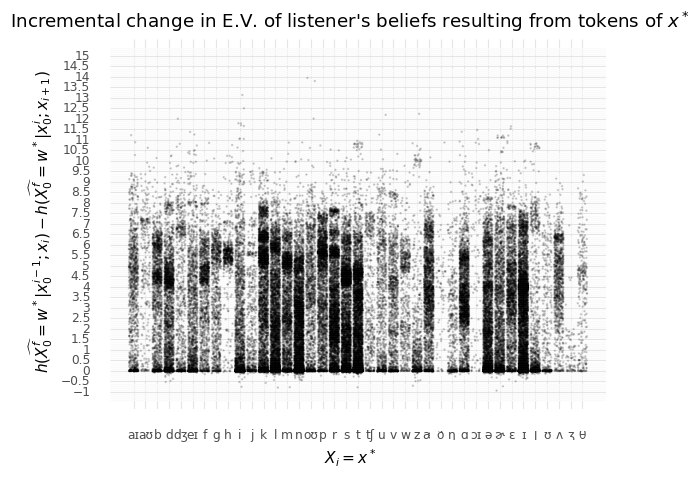

<ggplot: (-9223363274056951022)>

In [301]:
Delta_hat_plot = plot(Delta_hat_df_noNaN, 
     x_col = 'x*', 
     y_col = 'delta', 
     title = "Incremental change in E.V. of listener's beliefs resulting from tokens of $x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$', 
     y_min = -1.0,
     y_max = 15.0,
     size=smallSize, 
     alpha=lowAlpha,
     width=largeWidth)
Delta_hat_plot

0.01

0.15

0.4

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 8 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


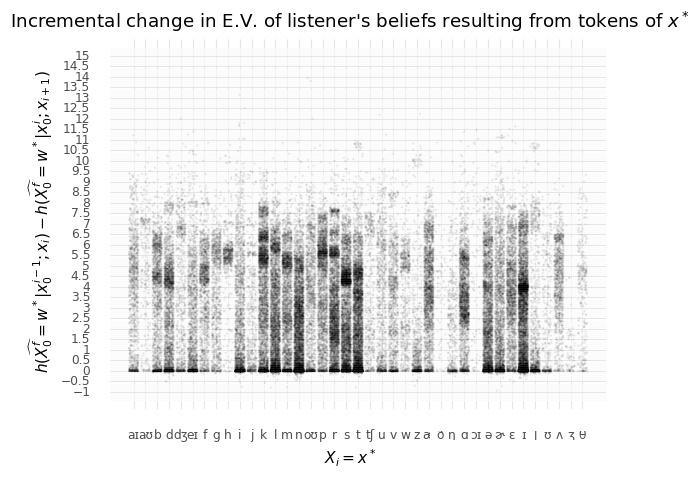

<ggplot: (-9223363273963255871)>

In [302]:
smallSize
lowAlpha
largeWidth
Delta_hat_plot_rez = plot(Delta_hat_df_noNaN, 
     x_col = 'x*', 
     y_col = 'delta', 
     title = "Incremental change in E.V. of listener's beliefs resulting from tokens of $x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})$', 
     y_min = -1.0,
     y_max = 15.0,
     size=smallSize, 
     alpha=0.05,
     width=largeWidth)
Delta_hat_plot_rez

### $\bar{\Delta}(x^*) = \sum\limits_{w^*, i : w^*_i = x^*} \frac{p(w^*)}{\sum\limits_{w': \exists i.w'_i = x^*} p(w')} [h(\widehat{X_0^f} = w^*|x_0^{i-1};x_{i}) - h(\widehat{X_0^f} = w^*|x_0^{i};x_{i+1})]$

In [303]:
delta_bar_norm = {x_star:sum(pW[w_prime] for w_prime in getWordformsWithx(x_star))
                  for x_star in Xs}

def delta_bar_weight(w_star, x_star, i):
#     w_star_t = ds2t(w_star)
#     assert w_star_t[i] == x_star, "w*_i != x*: w* = {0}, x* = {1}, i = {2}".format(w_star, x_star, i)
    return pW[w_star] / delta_bar_norm[x_star]

def extractDeltaBarInfo(delta_hat_row):
    return delta_hat_row['w'], delta_hat_row['j_bar'], delta_hat_row['delta']

delta_bar = {x_star:sum(delta_bar_weight(w_star, x_star, i) * delta
                        for w_star, i, delta in set(map(extractDeltaBarInfo, Delta_hat_by_x_star[x_star])))
             for x_star in Xs}

In [304]:
delta_bar_df = pd.DataFrame(data = [{'$x^*$':x_star,
                                     '$\overline{\Delta}(x^*)$':delta_bar[x_star]}
                                    for x_star in delta_bar])
delta_bar_df.head()

,$\overline{\Delta}(x^*)$,$x^*$
0,3.395860,oʊ
1,2.912405,eɪ
2,5.660939,h
3,1.289431,u
4,4.286083,g


In [305]:
delta_bar_df.sort_values('$\overline{\Delta}(x^*)$', ascending=False)

,$\overline{\Delta}(x^*)$,$x^*$
2,5.660939,h
15,5.191802,ɔɪ
6,4.566264,j
17,4.344572,w
4,4.286083,g
9,4.277748,b
27,4.271191,p
26,4.001434,aʊ
30,3.957667,aɪ
11,3.926668,f


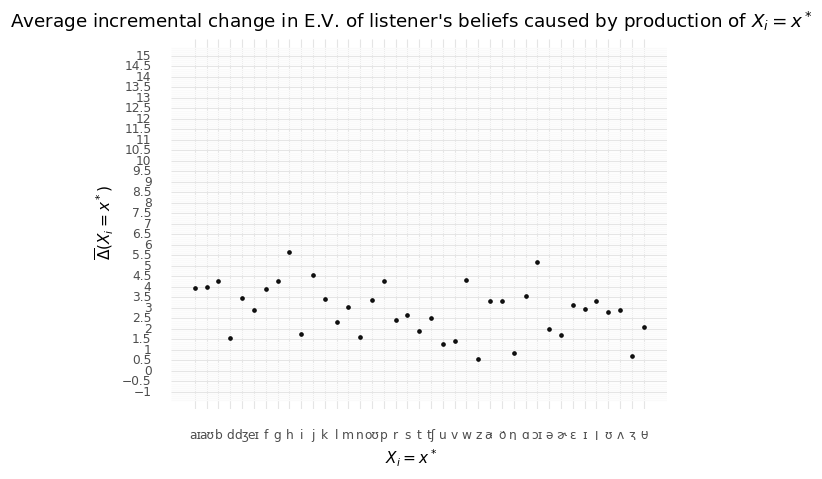

<ggplot: (8762789225364)>

In [306]:
delta_bar_far = plot(delta_bar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{\Delta}(x^*)$', 
     title = "Average incremental change in E.V. of listener's beliefs caused by production of $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{\Delta}(X_i = x^*)$', 
     y_min = -1.0,
     y_max = 15.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
delta_bar_far

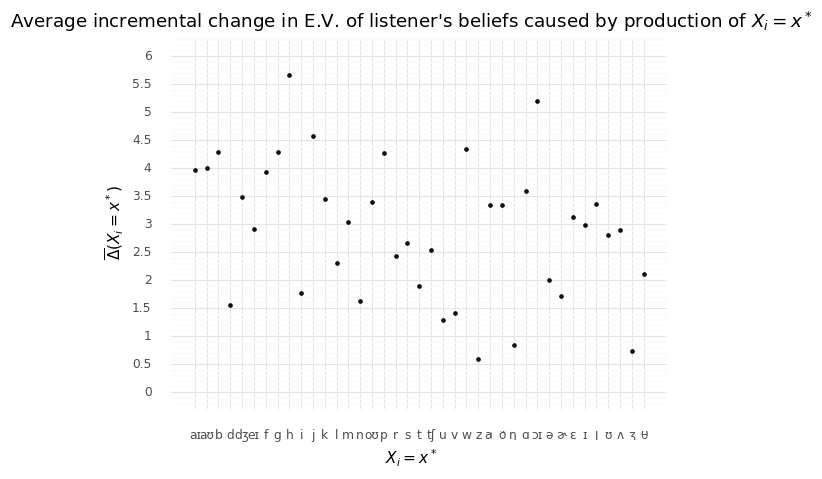

<ggplot: (8762789058659)>

In [307]:
delta_bar_close = plot(delta_bar_df, 
     x_col = '$x^*$', 
     y_col = '$\overline{\Delta}(x^*)$', 
     title = "Average incremental change in E.V. of listener's beliefs caused by production of $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$\overline{\Delta}(X_i = x^*)$', 
     y_min = 0.0,
     y_max = 6.0,
#      size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
delta_bar_close

### Incremental graph export

In [308]:
from os import getcwd
getcwd()

'/mnt/cube/home/AD/emeinhar/wr'

In [ ]:
plotsToSave_Incremental = {
"hXistarX0h_by_xstar_plot":hXistarX0h_by_xstar_plot,

"ICIxstar_plot":ICIxstar_plot,

"hXhatiStarX0k_plot":hXhatiStarX0k_plot,

"HXhatiXstar_plot":HXhatiXstar_plot,

"avgHXhatiXstar_plot":avgHXhatiXstar_plot,

"hXhatiStarXiStar_close":hXhatiStarXiStar_close,

"iXhatiStarX0kXiStar_plot":iXhatiStarX0kXiStar_plot,

"IXhatiX0kXi_by_xstar_plot":IXhatiX0kXi_by_xstar_plot,

"avgPC_inc_hm_d":avgPC_inc_hm_d,
"avgPC_inc_hm_l":avgPC_inc_hm_l,

"avgCD_inc_hm_d":avgCD_inc_hm_d,
"avgCD_inc_hm_l":avgCD_inc_hm_l,

"Delta_hat_plot":Delta_hat_plot,
"Delta_hat_plot_rez":Delta_hat_plot_rez,
    
"delta_bar_far":delta_bar_far,
"delta_bar_close":delta_bar_close

}

In [ ]:
export_ext = '.png'

In [ ]:
for eachPlot in plotsToSave_Incremental:
    plotsToSave_Incremental[eachPlot].save(filename=eachPlot + '_incremental' + export_ext, dpi=1000)

In [ ]:
%ls *_incremental*

In [ ]:
plotsToPDF_Incremental = [
hXistarX0h_by_xstar_plot,

ICIxstar_plot,

hXhatiStarX0k_plot,

HXhatiXstar_plot,

avgHXhatiXstar_plot,

hXhatiStarXiStar_close,

iXhatiStarX0kXiStar_plot,

IXhatiX0kXi_by_xstar_plot,

avgPC_inc_hm_d,
avgPC_inc_hm_l,

avgCD_inc_hm_d,
avgCD_inc_hm_l,

Delta_hat_plot,
Delta_hat_plot_rez,

delta_bar_far,
delta_bar_close
]

In [ ]:
save_as_pdf_pages(plotsToPDF_Incremental, filename='Incremental plots.pdf', dpi=1000)

In [ ]:
%pwd

### Total context overhead

Recall/note that 
 - $O :: (s,\bar{l}, n)$
 - $O_{:,:,c}$ is the sequence of one-hot vectors for the $c$th wordform indicating what the symbols in it are.
 - $O_{:,j,c}$ is a one-hot vector indicating what the $j$th symbol of the $c$th wordform is (or if it doesn't have one).
 - $O_{i,j,c} = 1$ iff the $j$th symbol $X_j$ of the $c$th wordform $x_0^f$ is $x_i$.
 - $O_{:,j,:}$ is a stack of $n$ one-hot vectors indicating what the $j$th symbol is (or if there is no such symbol) for all $n$ wordforms.
 - $O_{i,j,:}$ is a length $n$ vector indicating for each of the $n$ wordforms $\{w_c\}$ whether $w_c$'s $j$th symbol is $x_i$ or not.
 - $O_{i,:,:}$ is a $\bar{l} \times n$ matrix indicating for each word $c$ (i.e. each column) whether its $j$th symbol (i.e. each row) is symbol $x_i$.
 - $O_{i,:,c}$ is a length $\bar{l}$ vector indicating which of wordform $c$'s indices are symbol $x_i$.

In [309]:
O.shape

(41, 18, 12565)

In [310]:
#3.36s [kotoba/python3]
O_dicts = []
for i in np.arange(O.shape[0]):
    for j in np.arange(O.shape[1]):
        for c in np.arange(O.shape[2]):
            if O[i,j,c] == 1:
                O_dicts.append({'i':i,
                                'j_bar':j,
                                'j':j,
                                'c':c,
                                'x*':Xslex_idxmap[i],
                                'w':W_idxMap[c]})

In [311]:
z_occurrences = {FrozenDict(each) for each in O_dicts if each['x*'] == 'z'}
len(z_occurrences)
list(z_occurrences)[:5]

785

[FrozenDict({'c': 12104, 'j_bar': 5, 'j': 5, 'x*': 'z', 'w': '⋊.ɪ.n.θ.u.z.i.æ.z.m.⋉', 'i': 24}),
 FrozenDict({'c': 4871, 'j_bar': 3, 'j': 3, 'x*': 'z', 'w': '⋊.m.oʊ.z.eɪ.ɪ.k.⋉', 'i': 24}),
 FrozenDict({'c': 11576, 'j_bar': 5, 'j': 5, 'x*': 'z', 'w': '⋊.ɪ.m.p.ə.z.ɪ.ʃ.ɪ.n.⋉', 'i': 24}),
 FrozenDict({'c': 6892, 'j_bar': 3, 'j': 3, 'x*': 'z', 'w': '⋊.r.eɪ.z.n.⋉', 'i': 24}),
 FrozenDict({'c': 7820, 'j_bar': 8, 'j': 8, 'x*': 'z', 'w': '⋊.s.m.ɪ.ð.ɚ.i.n.z.⋉', 'i': 24})]

In [312]:
def retrieveRows(predicate):
    return {FrozenDict(each) for each in O_dicts if predicate(each)}

In [313]:
def indicesOfWwhereXiIs_calc(W, x_star):
    rows = retrieveRows(lambda row: row['w'] == W and row['x*'] == x_star)
    return {row['j'] for row in rows}

# indicesOfWwhereXiIs = {x_star:{w:indicesOfWwhereXiIs_calc(w, x_star)
#                                for w in getWordformsWithx(x_star)}
#                        for x_star in tqdm(Xs_lex)}

def parallelCalc(x_star):
    return (x_star, {w:indicesOfWwhereXiIs_calc(w, x_star) for w in getWordformsWithx(x_star)})

# takes ~3m [kotoba/python3]
indicesOfWwhereXiIs = dict(Parallel(n_jobs=-1, backend='multiprocessing', verbose=50)(delayed(parallelCalc)(x_star)
                          for x_star in Xs_lex))

[Parallel(n_jobs=-1)]: Using backend MultiprocessingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done   2 out of  41 | elapsed:    4.5s remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   3 out of  41 | elapsed:   11.3s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   4 out of  41 | elapsed:   15.7s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done   5 out of  41 | elapsed:   19.2s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   6 out of  41 | elapsed:   23.7s remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   7 out of  41 | elapsed:   26.1s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   8 out of  41 | elapsed:   28.3s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   9 out of  41 | elapsed:   29.7s remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  10 out of  41 | elapsed:   30.4s remaining:  1.6min
[Parallel(n_jobs=-1)]: Done  11 out of  41 | elapsed:   30.5s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  12 out of  

In [314]:
indicesOfWwhereXiIs['z']['⋊.d.ɪ.z.ɚ.v.⋉']

{3}

In [315]:
pJ_W = {w:{j:1.0/len(ds2t(w)) if j < len(ds2t(w)) else 0.0
                for j in range(l_bar)}
             for w in Ws}
randW
# pJ_W[randW]
areNormalized(pJ_W)
pJ_W = condDistsAsProbDists(pJ_W)
pJ_W[randW]

'⋊.t.ɪ.k.⋉'

True

0: 0.2
1: 0.2
2: 0.2
3: 0.2
4: 0.2
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 0.0
11: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.0

In [316]:
pJW = {(j,w):pW[w]*pJ_W[w][j]
       for j,w in product(range(l_bar), Ws)}
isNormalized(pJW)
pJW = ProbDist(pJW)

True

In [317]:
pJ = {j:sum(pJW[(j_prime,w)] for j_prime, w in pJW
            if j_prime == j)
      for j in range(l_bar)}
isNormalized(pJ)
pJ = ProbDist(pJ)
pJ

True

0: 0.20311152676593097
1: 0.20311152676593097
2: 0.20311152676593097
3: 0.19814410313825037
4: 0.10488443054410955
5: 0.04386188775653953
6: 0.020361008913728475
7: 0.011265698657772423
8: 0.006143973582464642
9: 0.0032446111629012976
10: 0.0017361220271988013
11: 0.0007047628358460088
12: 0.00021811898550585683
13: 6.967987601354836e-05
14: 2.126789650802436e-05
15: 9.06263741117242e-06
16: 6.506873146430881e-07
17: 4.100064247681655e-08

In [318]:
def pX_JW_calc(j,w):
    if pJW[(j,w)] == 0.0:
        return {x_star:0.0 for x_star in Xs_lex}
    w_t = ds2t(w)
    actual_x_j = w_t[j]
    return {x_star:1.0 if x_star == actual_x_j else 0.0
            for x_star in Xs_lex}

pX_JW = {(j,w):pX_JW_calc(j,w)
              for j,w in pJW}

randW
pX_JW[1, randW]

'⋊.t.ɪ.k.⋉'

{'oʊ': 0.0,
 'eɪ': 0.0,
 'u': 0.0,
 'g': 0.0,
 'h': 0.0,
 'z': 0.0,
 'j': 0.0,
 'ʊ': 0.0,
 'tʃ': 0.0,
 '⋉': 0.0,
 'b': 0.0,
 'k': 0.0,
 'f': 0.0,
 'dʒ': 0.0,
 't': 1.0,
 'ə': 0.0,
 's': 0.0,
 'ɔɪ': 0.0,
 'w': 0.0,
 'ɛ': 0.0,
 'i': 0.0,
 '⋊': 0.0,
 'v': 0.0,
 'd': 0.0,
 'ð': 0.0,
 'ʃ': 0.0,
 'n': 0.0,
 'ɚ': 0.0,
 'aʊ': 0.0,
 'p': 0.0,
 'ɑ': 0.0,
 'ɪ': 0.0,
 'aɪ': 0.0,
 'l': 0.0,
 'ŋ': 0.0,
 'ʌ': 0.0,
 'r': 0.0,
 'm': 0.0,
 'ʒ': 0.0,
 'æ': 0.0,
 'θ': 0.0}

Altogether then, we can define a joint distribution $p(X,J,W) = p(X|J,W)p(J|W)p(W)$ and recover
 - $p(X = x^*) = p(X_J = x^*) = \sum\limits_{j,w} p(x^*, j, w) = \sum\limits_{j,w} p(x^*|j,w)p(j,w)$.
 - Both component conditional distributions of $p(X_J, J)$:
   - $p(X_J = x^*|J = j) = \sum\limits_w p(X_J = x^*, w|J = j) = \sum\limits_w p(X_J = x^*|w, j) p(w|j)$
   - $p(J = j|X_J = x^*) = \sum\limits_w p(J = j, w|X_J = x^*) = \sum\limits_w p(j|w, x^*) p(w|x^*)$
 - $p(X_J = x^*|W = w) = \sum\limits_j p(X_J = x^*, J = j|W = w) = \sum\limits_j p(X_j = x^*|J=j,W=w)p(J=j|W=w)$
 - $p(W = w|X_J = x^*) = \frac{p(X_J = x^*|W = w)p(W = w)}{p(X_J = x^*)}$

In [319]:
list(pJW.keys())[:5]

[(0, '⋊.s.k.w.ɑ.k.⋉'),
 (0, '⋊.eɪ.l.i.ə.n.eɪ.ʃ.ɪ.n.⋉'),
 (0, '⋊.ɪ.n.d.ʌ.s.t.r.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉'),
 (0, '⋊.j.u.n.ɪ.f.ɑ.r.m.⋉'),
 (0, '⋊.k.æ.b.ɚ.eɪ.⋉')]

In [322]:
pXstar = {x:sum(pJW[(j,w)] * pX_JW[(j,w)][x]
                for j, w in pJW)
          for x in Xs_lex}
isNormalized(pXstar)
pXstar = ProbDist(pXstar)

# pXstar_J = {j:{x:sum()
#                for x in Xs_lex}
#             for j in range(l_bar)}
# areNormalized(pXstar_J)
# pXstar_J = condDistsAsProbDists(pXstar_J)

True

### $h(\hat{X}_i = x^* | x_0 \ldots X_i = x^* \ldots x_f)$

In [ ]:
#KEYPLOT_1L

`KEYPLOT_1L`

In [323]:
hXhatiX0f = {x0f:{i:{x_prime:h_prime( pXhatiX0f[x0f][i][x_prime] )
                     for x_prime in Xs_lex}
                  for i in range(l_bar)}
             for x0f in Ws}

In [324]:
indicesOfWwhereXiIs['ɑ']['⋊.f.i.ɑ.n.s.eɪ.⋉']

{3}

In [325]:
{FrozenDict(each) for each in O_dicts if each['x*'] == 'ɑ' and each['w'] == '⋊.f.i.ɑ.n.s.eɪ.⋉'}

{FrozenDict({'c': 1680, 'j_bar': 3, 'j': 3, 'x*': 'ɑ', 'w': '⋊.f.i.ɑ.n.s.eɪ.⋉', 'i': 28})}

In [326]:
hXhatiprimeX0f_by_xstar = {x_star:{x0f:{i:{x_prime:hXhatiX0f[x0f][i][x_prime]
                                           for x_prime in Xs}
                                        for i in indicesOfWwhereXiIs[x_star][x0f]}
                                   for x0f in getWordformsWithx(x_star)}
                          for x_star in Xs}
hXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉']

{3: {'oʊ': -0.0,
  'eɪ': -0.0,
  'h': -0.0,
  'u': -0.0,
  'g': -0.0,
  'z': 0.0005193281209960678,
  'j': -0.0,
  'ʊ': -0.0,
  'tʃ': -0.0,
  'b': -0.0,
  'k': -0.0,
  'f': -0.0,
  'dʒ': -0.0,
  't': -0.0,
  'ə': -0.0,
  'ɔɪ': -0.0,
  's': 11.440092061015472,
  'w': -0.0,
  'ɛ': -0.0,
  'i': -0.0,
  'v': -0.0,
  'd': -0.0,
  'ð': -0.0,
  'ʃ': -0.0,
  'n': -0.0,
  'ɚ': -0.0,
  'aʊ': -0.0,
  'p': -0.0,
  'ɑ': -0.0,
  'ɪ': -0.0,
  'aɪ': -0.0,
  'l': -0.0,
  'ŋ': -0.0,
  'ʌ': -0.0,
  'r': -0.0,
  'm': -0.0,
  'ʒ': -0.0,
  'æ': -0.0,
  'θ': -0.0}}

In [327]:
hXhatiprimeX0f_by_xstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 '$i$':i,
                                                 '$x_0^{*f}$':x0f,
                                                 '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$':hXhatiprimeX0f_by_xstar[x_star][x0f][i][x_star]}
                                                for x_star in hXhatiprimeX0f_by_xstar 
                                                    for x0f in hXhatiprimeX0f_by_xstar[x_star]
                                                       for i in hXhatiprimeX0f_by_xstar[x_star][x0f]])
hXhatiprimeX0f_by_xstar_df.head()

,$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$,$i$,$x^*$,$x_0^{*f}$
0,0.000086,2,oʊ,⋊.m.oʊ.t.i.f.⋉
1,0.068177,2,oʊ,⋊.r.oʊ.l.⋉
2,-0.000000,5,oʊ,⋊.d.ɪ.s.l.oʊ.k.eɪ.ʃ.ɪ.n.⋉
3,0.010330,3,oʊ,⋊.k.r.oʊ.k.eɪ.⋉
4,-0.000000,1,oʊ,⋊.oʊ.v.ɚ.f.l.oʊ.⋉


In [328]:
hXhatiprimeX0f_by_xstar_df.sort_values('$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', ascending=False)

,$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$,$i$,$x^*$,$x_0^{*f}$
35054,9.836682,1,v,⋊.v.aɪ.⋉
67337,9.680888,1,r,⋊.r.u.⋉
34274,8.316217,1,v,⋊.v.æ.t.⋉
74670,7.442845,1,θ,⋊.θ.ɚ.s.t.⋉
35223,6.834579,1,v,⋊.v.ɛ.t.⋉
51705,6.756002,2,ɑ,⋊.n.ɑ.⋉
74637,6.612276,3,θ,⋊.ɛ.n.θ.⋉
74741,6.186137,1,θ,⋊.θ.aɪ.⋉
51199,5.931919,1,ɑ,⋊.ɑ.⋉
37826,5.753505,3,ð,⋊.l.aɪ.ð.⋉


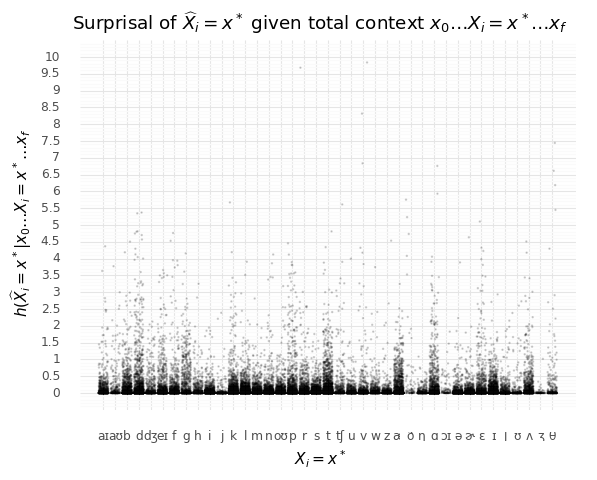

<ggplot: (-9223363274065487335)>

In [329]:
hXhatiprimeX0f_far = plot(hXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Surprisal of $\widehat{X}_i = x^*$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 10.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXhatiprimeX0f_far

0.15

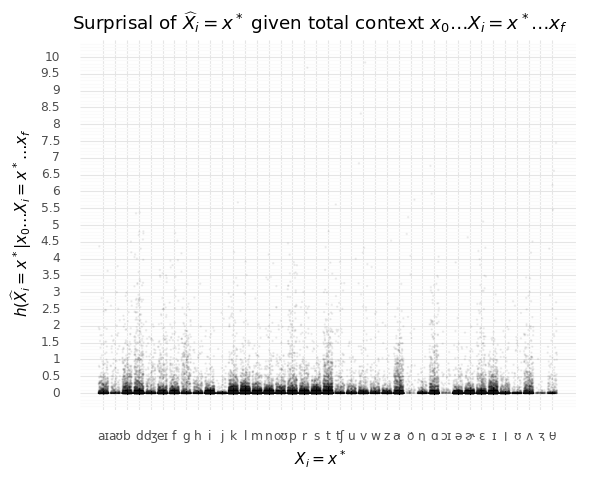

<ggplot: (-9223363274101170407)>

In [330]:
lowAlpha
hXhatiprimeX0f_close = plot(hXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     title = "Surprisal of $\widehat{X}_i = x^*$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\widehat{X}_i = x^*|x_0 \ldots X_i = x^* \ldots x_f$', 
     y_min = 0.0,
     y_max = 10.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
hXhatiprimeX0f_close

### $H(\widehat{X}_i | x_0 \ldots X_i = x^* \ldots x_f)$

In [ ]:
#KEYPLOT_3L

`KEYPLOT_3L`

$H(\widehat{X}_i | x_0 \ldots X_i = x^* \ldots x_f) = \sum\limits_{x'} p(\widehat{X}_i = x'| x_0 \ldots X_i = x^* \ldots x_f) h(\widehat{X}_i = x'|x_0 \ldots X_i = x^* \ldots x_f)$

In [331]:
HXhatiprimeX0f_by_xstar = {x_star:{x0f:{i:sum(pXhatiX0f[x0f][i][x_prime] * hXhatiX0f[x0f][i][x_prime]
                                              for x_prime in Xs)
                                        for i in indicesOfWwhereXiIs[x_star][x0f]}
                                   for x0f in getWordformsWithx(x_star)}
                           for x_star in Xs}
HXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉'][3]
HXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉']
HXhatiprimeX0f_by_xstar['z']

0.0046364994555180179

{3: 0.0046364994555180179}

{'⋊.s.ɪ.n.ɪ.s.ɪ.z.m.⋉': {7: 0.0},
 '⋊.dʒ.ʌ.k.s.t.ə.p.ə.z.ɪ.ʃ.ɪ.n.⋉': {9: 0.0},
 '⋊.ɪ.n.d.ʌ.s.t.r.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉': {11: 0.0},
 '⋊.t.i.z.⋉': {3: 0.74361812415369566},
 '⋊.n.ɑ.n.r.ɛ.z.ɪ.d.ɪ.n.t.⋉': {6: 0.0},
 '⋊.oʊ.v.ɚ.ɑ.l.z.⋉': {6: 0.0018229862137263959},
 '⋊.d.r.ɛ.g.z.⋉': {5: 0.13564586165861356},
 '⋊.p.l.aɪ.r.z.⋉': {5: 0.0040736164731642313},
 '⋊.n.ɔɪ.z.⋉': {3: 0.20193345547217578},
 '⋊.ɪ.s.k.eɪ.p.ɪ.z.m.⋉': {7: 0.0},
 '⋊.dʒ.ɚ.n.ə.l.ɪ.z.m.⋉': {7: 0.0},
 '⋊.d.ɛ.s.p.ə.t.ɪ.z.m.⋉': {8: 0.0},
 '⋊.s.ʌ.p.ə.z.ɪ.ʃ.ɪ.n.⋉': {5: 0.0},
 '⋊.æ.n.t.æ.g.ɪ.n.ɪ.z.m.⋉': {9: 0.0063353677099122234},
 '⋊.h.æ.v.z.⋉': {4: 0.31945960740150481},
 '⋊.w.ɪ.z.d.ə.m.⋉': {3: 5.4343269612193409e-05},
 '⋊.ð.i.z.⋉': {3: 0.13179031973644037},
 '⋊.ɪ.k.s.t.r.æ.v.ə.g.æ.n.z.ə.⋉': {12: 0.0},
 '⋊.h.ɑ.r.ɪ.z.ɑ.n.t.l.⋉': {5: 0.0},
 '⋊.i.v.z.⋉': {3: 0.96891353890979959},
 '⋊.s.ʌ.b.s.ə.d.aɪ.z.⋉': {8: 0.0},
 '⋊.h.ɪ.z.⋉': {3: 0.47348186214671589},
 '⋊.ɪ.g.z.ɪ.s.t.ɪ.n.s.⋉': {3: 0.0},
 '⋊.ɪ.g.z.ɛ.k.j.u.t.ɪ.v.⋉': {3: 0.0},
 '⋊.f.i.z.ə

limit_output extension: Maximum message size of 20000 exceeded with 31200 characters

In [387]:
HXhatiprimeX0f_by_xstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 '$i$':i,
                                                 '$x_0^{*f}$':x0f,
                                                 '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$':HXhatiprimeX0f_by_xstar[x_star][x0f][i]}
                                                for x_star in HXhatiprimeX0f_by_xstar 
                                                    for x0f in HXhatiprimeX0f_by_xstar[x_star]
                                                       for i in HXhatiprimeX0f_by_xstar[x_star][x0f]])
HXhatiprimeX0f_by_xstar_df.head()

,$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$,$i$,$x^*$,$x_0^{*f}$
0,0.000924,2,oʊ,⋊.m.oʊ.t.i.f.⋉
1,0.406837,2,oʊ,⋊.r.oʊ.l.⋉
2,0.000000,5,oʊ,⋊.d.ɪ.s.l.oʊ.k.eɪ.ʃ.ɪ.n.⋉
3,0.064038,3,oʊ,⋊.k.r.oʊ.k.eɪ.⋉
4,0.000000,1,oʊ,⋊.oʊ.v.ɚ.f.l.oʊ.⋉


In [388]:
HXhatiprimeX0f_by_xstar_df.sort_values('$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$', ascending=False)

,$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$,$i$,$x^*$,$x_0^{*f}$
1500,3.406474,1,eɪ,⋊.eɪ.l.⋉
4625,3.354131,2,g,⋊.oʊ.g.l.⋉
7090,3.217754,1,tʃ,⋊.tʃ.aʊ.⋉
5017,3.195717,1,g,⋊.g.ɑ.k.⋉
68746,3.149353,2,r,⋊.ɪ.r.⋉
46825,3.143594,1,aʊ,⋊.aʊ.l.⋉
59625,3.138506,1,aɪ,⋊.aɪ.r.⋉
5691,3.137856,1,z,⋊.z.ɛ.d.⋉
68732,3.114804,1,r,⋊.r.aɪ.⋉
14604,3.110307,1,dʒ,⋊.dʒ.ɑ.t.⋉


0.15

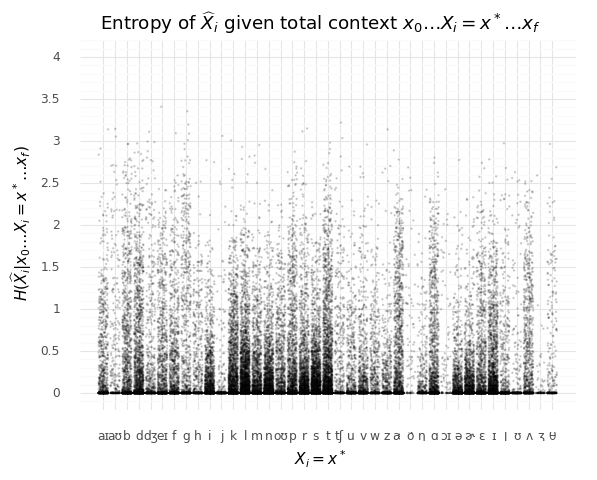

<ggplot: (-9223363274101169597)>

In [389]:
lowAlpha
HXhatiprimeX0f_far = plot(HXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$', 
     title = "Entropy of $\widehat{X}_i$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
#      alpha=0.05,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
HXhatiprimeX0f_far

0.15

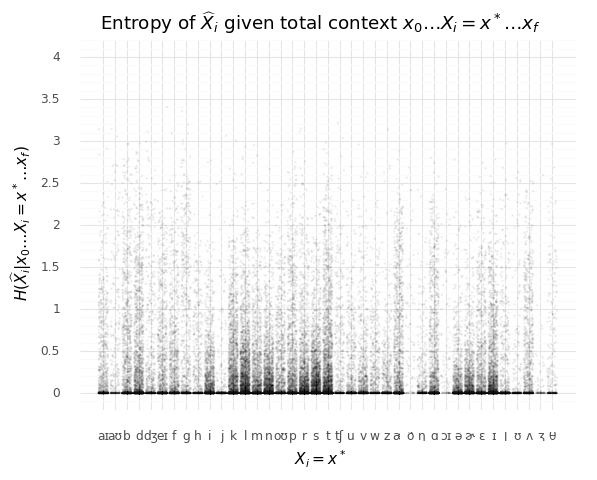

<ggplot: (-9223363274065525013)>

In [390]:
lowAlpha
HXhatiprimeX0f_close = plot(HXhatiprimeX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$', 
     title = "Entropy of $\widehat{X}_i$ given total context $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\widehat{X}_i|x_0 \ldots X_i = x^* \ldots x_f)$', 
     y_min = 0.0,
     y_max = 4.0,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
HXhatiprimeX0f_close

### $H(\hat{X}_i | X_0 \ldots X_i = x^* \ldots X_f)$

In [380]:
#KEYPLOT_4L

`KEYPLOT_4L`

$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f) = \sum\limits_{x_0 \ldots X_j = x^* \ldots x_f} p(J = j, x_0 \ldots x_{j-1}, x_{j+1} \ldots x_f| X_J = x^*) H(\widehat{X}_j|J = j, x_0 \ldots X_J = x^* \ldots x_f)$, where

$p(x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f| X_i = x^*) \overset{?}{=} \frac{p(x_0 \ldots x_{i-1}, X_i = x^*, x_{i+1} \ldots x_f)}{\sum\limits_{x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1} \ldots x'_f} p(x'_0 \ldots x'_{i-1}, X'_i = x^*, x'_{i+1} \ldots x'_f)}$

Supposing we do this, the denominator should represent $p(X_i = x^*)$, where $i$ is *not* constant. If this really represents a probability, then $\sum\limits_{x'} p(X_i = x')$ should be 1. 

It is not.

In [336]:
pSomeXiIsXstar = {x_star:sum(pW[w] for w in getWordformsWithx(x_star))
                  for x_star in Xs}
isNormalized(pSomeXiIsXstar)
norm(pSomeXiIsXstar)

False

3.2088146176591694

**Take 2:**

$p(X_J = x^*| J = i)$ seems very concrete and calculable:
 - $p(X_J = x^* | J = 3) = $

In [337]:
len(wordsWhereXiIs('z',3))
list(wordsWhereXiIs('z',3))[:10]
sum(pW[w] for w in wordsWhereXiIs('z',3))

244

['⋊.r.ɛ.z.ɚ.v.w.ɑ.r.⋉',
 '⋊.r.ɛ.z.ə.l.u.ʃ.ɪ.n.⋉',
 '⋊.r.oʊ.z.w.ʊ.d.⋉',
 '⋊.t.i.z.⋉',
 '⋊.n.u.z.⋉',
 '⋊.g.aɪ.z.⋉',
 '⋊.m.eɪ.z.⋉',
 '⋊.v.aɪ.z.ɚ.⋉',
 '⋊.n.ɔɪ.z.⋉',
 '⋊.ɪ.g.z.ɪ.b.ə.t.ɚ.⋉']

0.0328552344864963

Starting from this we should be able to marginalize over possible values of $J$:
 - $p(X_J = x^*) = \sum\limits_{i \in [0, \bar{l}]} p(X_J = x^* | J = i) p(J = i)$
 
What is $p(J = i)$? *Not* crystal clear. Also $p(X_J = x^* | J = i)$ is not as straightforward as I thought it was above:

In [338]:
pXJ = {j:{x:sum(pW[w] for w in wordsWhereXiIs(x, j))
          for x in Xs_lex}
       for j in range(l_bar)}
areNormalized(pXJ)
norms(pXJ) # <- BAD.
# pXJ = condDistsAsProbDists(pXJ) # <- NO.

False

[1.0000000000000016,
 1.0000000000000022,
 1.0000000000000022,
 0.9850977291169603,
 0.6120590387403935,
 0.30694632480254463,
 0.16594105174567794,
 0.10227387995398568,
 0.06130007935152379,
 0.035205817575453505,
 0.020120926218428516,
 0.008775975113547812,
 0.0029362489094660006,
 0.001006540486065992,
 0.00032877277298865774,
 0.00014569388653587855,
 1.1102684991409309e-05,
 7.380115645826978e-07]

**An aside on the interpretation of $p(J)$** 

Hypothesis: The 'real' relevant/helpful distribution here is $p(W,J)$. $p(W)$ clearly comes from the lexicon prior, and the sample space for $p(J)$ is $0 \ldots \bar{l}$. For a specific word $w$, what is $p(J|w)$? 

Well, $\forall j > |w|$, it seems necessary to say that $p(j|w) = 0$. For the rest, a uniform distribution seems like the only reasonable choice.

In [339]:
randW
len(ds2t(randW))
ds2t(randW)[ len(ds2t(randW)) - 1 ]

'⋊.t.ɪ.k.⋉'

5

'⋉'

In [340]:
pJ_givenW = {w:{j:1.0/len(ds2t(w)) if j < len(ds2t(w)) else 0.0
                for j in range(l_bar)}
             for w in Ws}
randW
# pJ_givenW[randW]
areNormalized(pJ_givenW)
pJ_givenW = condDistsAsProbDists(pJ_givenW)
pJ_givenW[randW]

'⋊.t.ɪ.k.⋉'

True

0: 0.2
1: 0.2
2: 0.2
3: 0.2
4: 0.2
5: 0.0
6: 0.0
7: 0.0
8: 0.0
9: 0.0
10: 0.0
11: 0.0
12: 0.0
13: 0.0
14: 0.0
15: 0.0
16: 0.0
17: 0.0

In [341]:
pJW = {(j,w):pW[w]*pJ_givenW[w][j]
       for j,w in product(range(l_bar), Ws)}
isNormalized(pJW)
pJW = ProbDist(pJW)

True

In [342]:
pJ = {j:sum(pJW[(j_prime,w)] for j_prime, w in pJW
            if j_prime == j)
      for j in range(l_bar)}
isNormalized(pJ)
pJ = ProbDist(pJ)
pJ

True

0: 0.20311152676593097
1: 0.20311152676593097
2: 0.20311152676593097
3: 0.19814410313825037
4: 0.10488443054410955
5: 0.04386188775653953
6: 0.020361008913728475
7: 0.011265698657772423
8: 0.006143973582464642
9: 0.0032446111629012976
10: 0.0017361220271988013
11: 0.0007047628358460088
12: 0.00021811898550585683
13: 6.967987601354836e-05
14: 2.126789650802436e-05
15: 9.06263741117242e-06
16: 6.506873146430881e-07
17: 4.100064247681655e-08

$\forall j,w$ such that $p(j,w) > 0$, $p(X_J = x^*|j, w)$ is $1.0$ for just that $x^*$ where $X_j$ of $w$ is, in fact, $x^*$:

In [343]:
def pX_givenJW_calc(j,w):
    if pJW[(j,w)] == 0.0:
        return {x_star:0.0 for x_star in Xs_lex}
    w_t = ds2t(w)
    actual_x_j = w_t[j]
    return {x_star:1.0 if x_star == actual_x_j else 0.0
            for x_star in Xs_lex}

pX_givenJW = {(j,w):pX_givenJW_calc(j,w)
              for j,w in pJW}

randW
pX_givenJW[1, randW]

'⋊.t.ɪ.k.⋉'

{'oʊ': 0.0,
 'eɪ': 0.0,
 'u': 0.0,
 'g': 0.0,
 'h': 0.0,
 'z': 0.0,
 'j': 0.0,
 'ʊ': 0.0,
 'tʃ': 0.0,
 '⋉': 0.0,
 'b': 0.0,
 'k': 0.0,
 'f': 0.0,
 'dʒ': 0.0,
 't': 1.0,
 'ə': 0.0,
 's': 0.0,
 'ɔɪ': 0.0,
 'w': 0.0,
 'ɛ': 0.0,
 'i': 0.0,
 '⋊': 0.0,
 'v': 0.0,
 'd': 0.0,
 'ð': 0.0,
 'ʃ': 0.0,
 'n': 0.0,
 'ɚ': 0.0,
 'aʊ': 0.0,
 'p': 0.0,
 'ɑ': 0.0,
 'ɪ': 0.0,
 'aɪ': 0.0,
 'l': 0.0,
 'ŋ': 0.0,
 'ʌ': 0.0,
 'r': 0.0,
 'm': 0.0,
 'ʒ': 0.0,
 'æ': 0.0,
 'θ': 0.0}

Altogether then, we can define a joint distribution $p(X,J,W) = p(X|J,W)p(J|W)p(W)$ and recover
 - $p(X = x^*) = p(X_J = x^*) = \sum\limits_{j,w} p(x^*, j, w) = \sum\limits_{j,w} p(x^*|j,w)p(j,w)$.
 - Both component conditional distributions of $p(X_J, J)$.
 - $p(X_J = x^*|W = w) = \sum\limits_j p(X_J = x^*, J = j|W = w) = \sum\limits_j p(X_j = x^*|J=j,W=w)p(J=j|W=w)$
 - $p(W = w|X_J = x^*) = \frac{p(X_J = x^*|W = w)p(W = w)}{p(X_J = x^*)}$

/end_aside

In [344]:
len(Xs_lex) * len(list(range(l_bar))) * len(Ws)

def pXJW_calc(x,j,w):
    pjw = pJW[(j,w)]
    if pjw == 0.0:
        return 0.0
    return pX_givenJW[(j,w)][x] * pjw

pXJW = {(x,j,w):pXJW_calc(x,j,w)
        for x,j,w in tqdm(product(Xs_lex, range(l_bar), Ws))}
isNormalized(pXJW)
pXJW = ProbDist(pXJW)

9272970

9272970it [00:12, 754048.28it/s]


In [358]:
pX_marg = {x_star:sum(pXJW[(x_star,j,w)]
                      for j,w in pJW)
           for x_star in Xs_lex}
isNormalized(pX_marg)
pX_marg = ProbDist(pX_marg)

True

In [359]:
pJ_marg = {j:sum(pXJW[(x,j,w)]
                      for x,w in product(Xs_lex, Ws))
           for j in range(l_bar)}
isNormalized(pJ_marg)
pJ_marg = ProbDist(pJ_marg)

True

In [361]:
pX_givenW = {w:{x_star:sum(pJ_givenW[w][j] * pX_givenJW[(j,w)][x_star]
                           for j in range(l_bar))
                for x_star in Xs_lex}
             for w in Ws}
areNormalized(pX_givenW)
pX_givenW = condDistsAsProbDists(pX_givenW)

True

In [364]:
HX_givenW = {w:H(pX_givenW[w])
             for w in Ws}

In [365]:
randW
HX_givenW[randW]

'⋊.t.ɪ.k.⋉'

2.321928094887362

In [362]:
pW_givenX = {x_star:{w:(1.0 / pX_marg[x_star]) * pX_givenW[w][x_star] * pW[w]
                     for w in Ws}
             for x_star in Xs_lex}
areNormalized(pW_givenX)
pW_givenX = condDistsAsProbDists(pW_givenX)

True

$p(J=j,W=w|X_J = x^*) = \frac{p(j,w,x^*)}{p(x^*)}$

In [372]:
pJW_givenX = {x_star:{(j,w): pXJW[(x_star, j, w)] / pX_marg[x_star]
                       for j,w in product(range(l_bar), Ws)}
              for x_star in Xs_lex}
areNormalized(pJW_givenX)
pJW_givenX = condDistsAsProbDists(pJW_givenX)

True

What's $p(J = i| X_J = x^*)$?

In [352]:
choice(O_dicts)

{'i': 40, 'j_bar': 0, 'j': 0, 'c': 7971, 'x*': '⋊', 'w': '⋊.s.p.ɔɪ.l.d.⋉'}

In [353]:
def numOccurrencesOf(x, w):
    w_t = ds2t(w)
    return Counter(w_t)[x]

randW
ds2t(randW)[1]
numOccurrencesOf( ds2t(randW)[1], randW )
numOccurrencesOf('x', 'x.o.a.b.x')

'⋊.t.ɪ.k.⋉'

't'

1

2

In [354]:
# indices_of_x_star = {x_star:tuple([row['j'] for row in retrieveRows(lambda row: row['x*'] == x_star)])
#                      for x_star in Xs_lex}

# pJX = {x_star:ProbDist(Counter(indices_of_x_star[x_star]))
#        for x_star in Xs_lex} # <- gonna be normalized by construction.

indexWeight = lambda x_star, w: pW[w] / numOccurrencesOf(x_star, w)

indices_of_x_star = {x_star:tuple([(row['j'], indexWeight(x_star, row['w'])) 
                                   for row in retrieveRows(lambda row: row['x*'] == x_star)])
                     for x_star in Xs_lex}

pJ_X = {x_star:{j:sum(pair[1] for pair in indices_of_x_star[x_star] if pair[0] == j)
               for j in range(l_bar)}
       for x_star in Xs_lex}
pJX['z']
sum(pJX['z'].values())
areNormalized(pJX)

NameError: name 'pJX' is not defined

In [ ]:
hJX = {x_star:mapValues(h_prime, pJX[x_star])
       for x_star in Xs_lex}

def fill_pJX_df(x_star, i):
    if i in pJX[x_star]:
        return float(pJX[x_star][i])
    return np.nan

pJX_df = pd.DataFrame(data = [{'$x^*$':x_star,
                               '$i$':i,
                               '$p(J=i|X_j = x^*)$':fill_pJX_df(x_star, i)}#float(pJX[x_star][i])}
#                               for x_star in pJX for i in pJX[x_star]])
                              for x_star in pJX for i in range(l_bar)])
pJX_df.head()

hJX_df = pd.DataFrame(data = [{'$x^*$':x_star,
                               '$i$':i,
                               '$h(J=i|X_j = x^*)$':h_prime(fill_pJX_df(x_star, i))}#float(pJX[x_star][i])}
#                               for x_star in pJX for i in pJX[x_star]])
                              for x_star in pJX for i in range(l_bar)])

In [ ]:
noData_pJX_df = pJX_df[pJX_df['$p(J=i|X_j = x^*)$'].isnull()]
noData_pJX_df.head()

In [ ]:
pJX_hm_l = ggplot(pJX_df, aes("$i$", "$x^*$"))
pJX_hm_l = pJX_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
pJX_hm_l = pJX_hm_l + geom_tile(aes(fill='$p(J=i|X_j = x^*)$'), color='black') + coord_fixed()
pJX_hm_l = pJX_hm_l + geom_tile(fill = 'yellow', data = noData_pJX_df) + coord_fixed()
pJX_hm_l = pJX_hm_l + ggtitle('$p(J=i|X_j = x^*)$')
#pJX_hm_l = pJX_hm_l + theme_bw()
# pJX_hm_l = pJX_hm_l + theme(plot_background = element_rect(fill = "transparent"))
pJX_hm_l

In [ ]:
hJX_hm_l = ggplot(hJX_df, aes("$i$", "$x^*$"))
hJX_hm_l = hJX_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
hJX_hm_l = hJX_hm_l + geom_tile(aes(fill='$h(J=i|X_j = x^*)$'), color='black') + coord_fixed()
hJX_hm_l = hJX_hm_l + geom_tile(fill = 'yellow', data = noData_pJX_df) + coord_fixed()
hJX_hm_l = hJX_hm_l + ggtitle('$h(J=i|X_j = x^*)$')
#hJX_hm_l = hJX_hm_l + theme_bw()
# hJX_hm_l = hJX_hm_l + theme(plot_background = element_rect(fill = "transparent"))
hJX_hm_l

This is Good.

Starting from this --- $p(J = i| X_J = x^*)$ --- we should be able to marginalize over possible values of $x^*$:
 - $p(J = i) = \sum\limits_{x^*} p(J = i| X_J = x^*)p(X_J = x^*)$
 
...but what's $p(X_J = x^*)$? that brings us back to where we already were.

What about the joint distribution $p(J = i, X_j = x^*)$?

In [461]:
choice(O_dicts)

{'i': 16, 'j_bar': 1, 'j': 1, 'c': 5819, 'x*': 'p', 'w': '⋊.p.eɪ.n.⋉'}

In [417]:
JXstar_observations = tuple(map(lambda row: (row['j'], row['x*']),
                                O_dicts))
len(JXstar_observations)
pJXstar = ProbDist(Counter(JXstar_observations))

def fill_pJXstar_df(j, x_star):
    if (j, x_star) in pJXstar:
        return float(pJXstar[(j, x_star)])
    return np.nan

pJXstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                 '$j$':j,
                                 '$p(J = i, X_j = x^*)$':fill_pJXstar_df(j, x_star)}
                                for (j, x_star) in product(range(l_bar), Xs_lex)])
pJXstar_df.head()

hJXstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                 '$j$':j,
                                 '$h(J = i, X_j = x^*)$':h_prime(fill_pJXstar_df(j, x_star))}
                                for (j, x_star) in product(range(l_bar), Xs_lex)])

99948

,$j$,"$p(J = i, X_j = x^*)$",$x^*$
0,0,NaN,ɑ
1,0,NaN,oʊ
2,0,NaN,aɪ
3,0,0.125715,⋊
4,0,NaN,æ


In [413]:
noData_pJXstar_df = pJXstar_df[pJXstar_df['$p(J = i, X_j = x^*)$'].isnull()]
noData_pJXstar_df.head()

,$j$,"$p(J = i, X_j = x^*)$",$x^*$
0,0,NaN,ɑ
1,0,NaN,oʊ
2,0,NaN,aɪ
4,0,NaN,æ
5,0,NaN,ʃ


/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


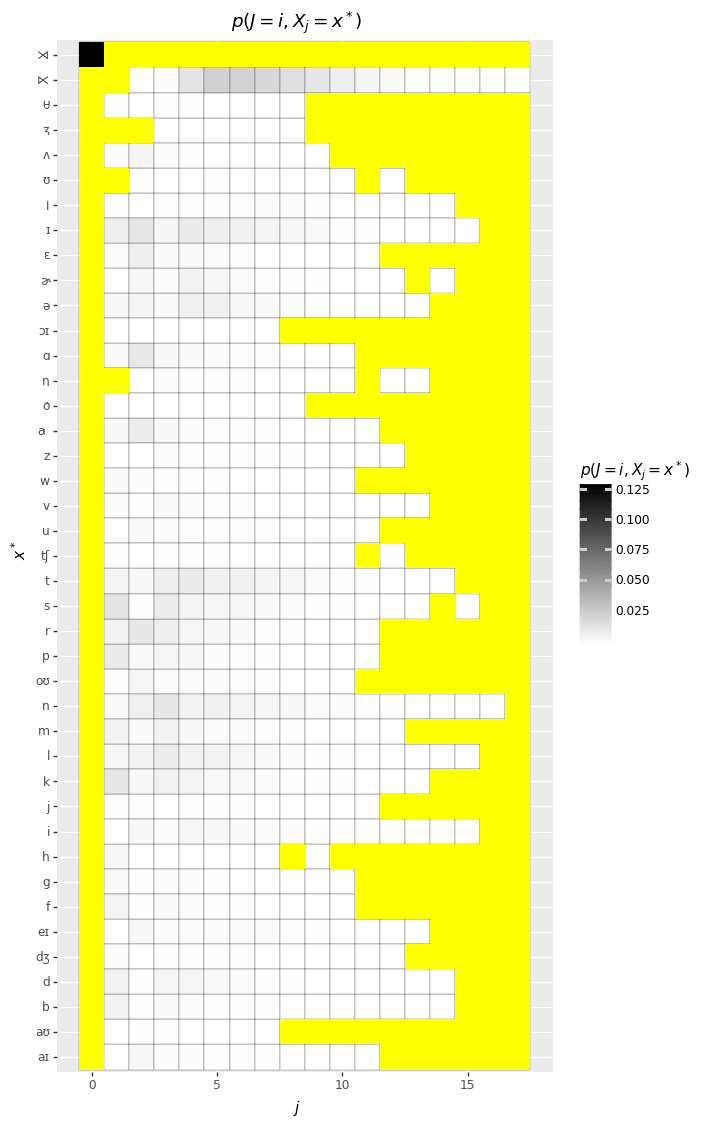

<ggplot: (-9223363305176809868)>

In [416]:
pJXstar_hm_l = ggplot(pJXstar_df, aes("$j$", "$x^*$"))
pJXstar_hm_l = pJXstar_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
pJXstar_hm_l = pJXstar_hm_l + geom_tile(aes(fill='$p(J = i, X_j = x^*)$'), color='black') + coord_fixed()
pJXstar_hm_l = pJXstar_hm_l + geom_tile(fill = 'yellow', data = noData_pJXstar_df) + coord_fixed()
pJXstar_hm_l = pJXstar_hm_l + ggtitle('$p(J = i, X_j = x^*)$')
#pJXstar_hm_l = pJXstar_hm_l + theme_bw()
# pJXstar_hm_l = pJXstar_hm_l + theme(plot_background = element_rect(fill = "transparent"))
pJXstar_hm_l

/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in less
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/mizani/bounds.py:352: RuntimeWarning: invalid value encountered in greater
  outside = (x < range[0]) | (x > range[1])
/home/AD/emeinhar/anaconda3/envs/omnibus/lib/python3.6/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


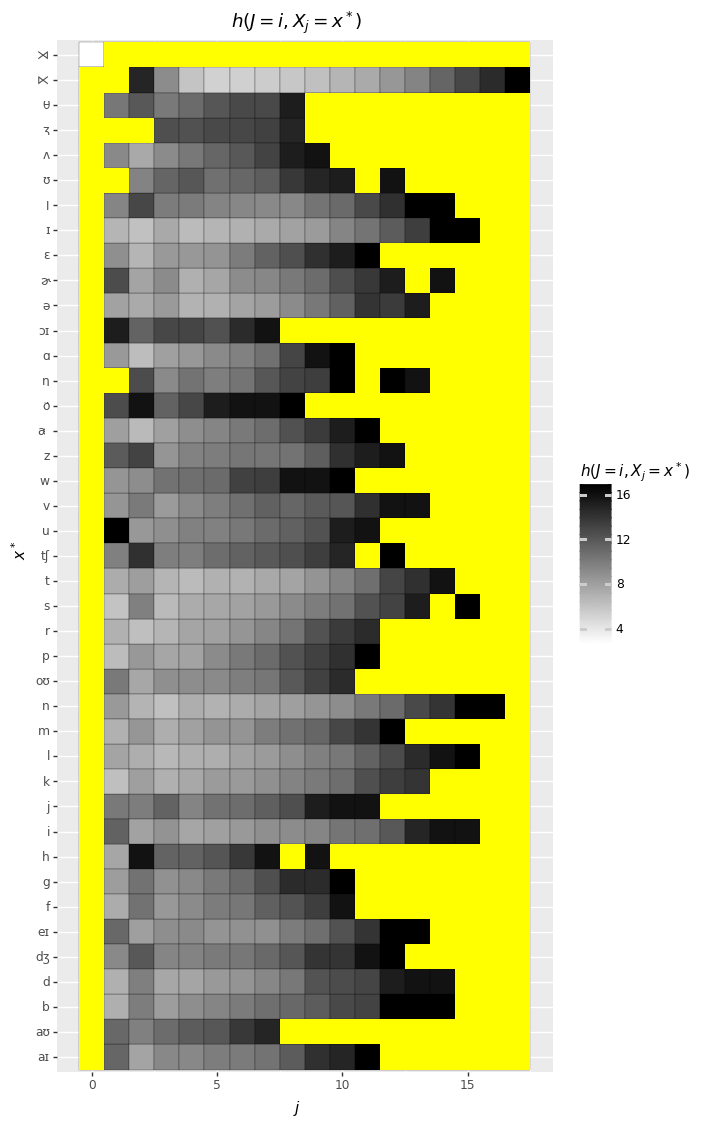

<ggplot: (-9223363305174269275)>

In [420]:
hJXstar_hm_l = ggplot(hJXstar_df, aes("$j$", "$x^*$"))
hJXstar_hm_l = hJXstar_hm_l + scale_fill_gradient(low = 'white', high = 'black', na_value='yellow')
hJXstar_hm_l = hJXstar_hm_l + geom_tile(aes(fill='$h(J = i, X_j = x^*)$'), color='black') + coord_fixed()
hJXstar_hm_l = hJXstar_hm_l + geom_tile(fill = 'yellow', data = noData_pJXstar_df) + coord_fixed()
hJXstar_hm_l = hJXstar_hm_l + ggtitle('$h(J = i, X_j = x^*)$')
#hJXstar_hm_l = hJXstar_hm_l + theme_bw()
# hJXstar_hm_l = hJXstar_hm_l + theme(plot_background = element_rect(fill = "transparent"))
hJXstar_hm_l

If `pJXstar` $p(J, X_J)$ really does represent the joint distribution we're after, then we should be able to recover the conditional distribution defined above (`pJX`). Can we?

$p(J = i)$:

In [429]:
pJ_fromPJXstar = {j:sum(tuple([pJXstar[(j_prime, x_star)] for j_prime, x_star in pJXstar if j_prime == j]))
                  for j in range(l_bar)}
isNormalized(pJ_fromPJXstar)
pJ_fromPJXstar = ProbDist(pJ_fromPJXstar)

True

$p(X_J)$:

In [430]:
pXstar_fromPJXstar = {x_star:sum([pJXstar[(j, x_prime)] for j, x_prime in pJXstar if x_prime == x_star])
                      for x_star in Xs_lex}
isNormalized(pXstar_fromPJXstar)
pXstar_fromPJXstar = ProbDist(pXstar_fromPJXstar)

True

$p(J = i | X_J = x^*)$

In [435]:
pJX_fromPJXstar = {x_star:{j:pJXstar[(j, x_star)]/pXstar_fromPJXstar[x_star]
                           for j in range(l_bar)}
                   for x_star in Xs_lex}
areNormalized(pJX_fromPJXstar)
pJX_fromPJXstar = condDistsAsProbDists(pJX_fromPJXstar)

True

In [440]:
for x_star in pJX:
    for j in pJX[x_star]:
        areDiff = isclose(pJX_fromPJXstar[x_star][j], pJX[x_star][j])
        theDiff = abs(pJX_fromPJXstar[x_star][j] - pJX[x_star][j])
        print(j, x_star, theDiff) if not areDiff else None

Great!

In [355]:
# hXhatiX0f = {x0f:{i:{x_prime:h_prime( pXhatiX0f[x0f][i][x_prime] )
#                      for x_prime in Xs_lex}
#                   for i in range(l_bar)}
#              for x0f in Ws}

HXhatiX0f = {x0f:{i:sum(pXhatiX0f[x0f][i][x_prime] * h_prime( pXhatiX0f[x0f][i][x_prime] )
                        for x_prime in Xs_lex)
                  for i in range(l_bar)}
             for x0f in Ws}

$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f) = \sum\limits_{x_0 \ldots X_j = x^* \ldots x_f} p(J = j, x_0 \ldots x_{j-1}, x_{j+1} \ldots x_f| X_J = x^*) H(\widehat{X}_j|J = j, x_0 \ldots X_J = x^* \ldots x_f)$

In [370]:
totalContexts = {x_star:{(x0f, i) 
                               for x0f in getWordformsWithx(x_star) 
                               for i in indicesOfWwhereXiIs[x_star][x0f]}
                 for x_star in Xs_lex}
totalContexts['z']

{('⋊.aɪ.d.i.l.ə.z.eɪ.ʃ.ɪ.n.⋉', 6),
 ('⋊.aɪ.d.i.l.ɪ.z.m.⋉', 6),
 ('⋊.aɪ.s.ə.l.eɪ.ʃ.ɪ.n.ɪ.z.m.⋉', 10),
 ('⋊.aʊ.r.s.ɛ.l.v.z.⋉', 7),
 ('⋊.aʊ.r.z.⋉', 3),
 ('⋊.aʊ.t.d.oʊ.r.z.⋉', 6),
 ('⋊.aʊ.t.s.aɪ.z.⋉', 5),
 ('⋊.b.aɪ.f.oʊ.k.l.z.⋉', 7),
 ('⋊.b.aɪ.p.ɑ.r.t.ɪ.z.ɪ.n.⋉', 8),
 ('⋊.b.i.z.w.æ.k.s.⋉', 3),
 ('⋊.b.l.eɪ.z.ɚ.⋉', 4),
 ('⋊.b.l.eɪ.z.⋉', 4),
 ('⋊.b.l.i.tʃ.ɚ.z.⋉', 6),
 ('⋊.b.l.u.m.ɚ.z.⋉', 6),
 ('⋊.b.l.u.z.⋉', 4),
 ('⋊.b.l.ɑ.z.eɪ.⋉', 4),
 ('⋊.b.l.ɪ.z.ɚ.d.⋉', 4),
 ('⋊.b.oʊ.z.⋉', 3),
 ('⋊.b.r.aɪ.d.z.m.eɪ.d.⋉', 5),
 ('⋊.b.r.aʊ.z.⋉', 4),
 ('⋊.b.r.eɪ.z.n.⋉', 4),
 ('⋊.b.r.i.z.⋉', 4),
 ('⋊.b.r.u.z.⋉', 4),
 ('⋊.b.r.ɑ.n.z.⋉', 5),
 ('⋊.b.r.ɪ.z.ɪ.r.⋉', 4),
 ('⋊.b.u.z.⋉', 3),
 ('⋊.b.u.ð.z.⋉', 4),
 ('⋊.b.æ.p.t.aɪ.z.⋉', 6),
 ('⋊.b.æ.p.t.ɪ.z.m.l.⋉', 6),
 ('⋊.b.æ.p.t.ɪ.z.m.⋉', 6),
 ('⋊.b.æ.z.l.⋉', 3),
 ('⋊.b.æ.ð.z.⋉', 4),
 ('⋊.b.ɑ.r.b.ə.r.ɪ.z.m.⋉', 8),
 ('⋊.b.ə.k.ɑ.z.⋉', 5),
 ('⋊.b.ə.z.ɑ.r.⋉', 3),
 ('⋊.b.ɛ.n.z.i.n.⋉', 4),
 ('⋊.b.ɪ.l.j.ɚ.d.z.⋉', 7),
 ('⋊.b.ɪ.n.æ.n.z.ə.⋉', 6),
 ('⋊.b.ɪ.t.ɚ.z.⋉', 5),
 ('⋊.b.ɪ.z.i

limit_output extension: Maximum message size of 20000 exceeded with 20929 characters

In [ ]:
# pJW_givenX = {x_star:{(j,w): pXJW[(x_star, j, w)] / pX_marg[x_star]
#                        for j,w in product(range(l_bar), Ws)}
#               for x_star in Xs_lex}

In [432]:
HXhatiX0f_by_xstar = {x_star:sum(pJW_givenX[x_star][(j, x0f)] * HXhatiprimeX0f_by_xstar[x_star][x0f][j]
                                 for x0f,j in totalContexts[x_star])
                      for x_star in Xs}

In [433]:
len(HXhatiX0f_by_xstar)

39

In [434]:
H3Xhat1X1 = importProbDist(which + '_H3Xhat1X1' + '.json')
len(H3Xhat1X1)
H3Xhat1X1_df = [{'$x^*$':'{0}'.format(x_star),
                 '$H(\widehat{X_1}|X_1 = x^*;)$':H3Xhat1X1[x_star]}
                for x_star in X1s]
H3Xhat1X1_df = pd.DataFrame(data=H3Xhat1X1_df)
H3Xhat1X1_df.head()

39

,$H(\widehat{X_1}|X_1 = x^*;)$,$x^*$
0,1.417003,oʊ
1,2.178555,eɪ
2,1.100115,u
3,2.395459,g
4,1.923290,h


In [397]:
HXhatiX0f_np = np.array([HXhatiX0f_by_xstar[x_star] for x_star in sorted(Xs)])
H3Xhat1X1_np = np.array([H3Xhat1X1[x_star] for x_star in sorted(Xs)])

In [398]:
from scipy.stats import spearmanr

In [399]:
spearmanr(HXhatiX0f_np, H3Xhat1X1_np)

SpearmanrResult(correlation=0.57165991902834001, pvalue=0.00014384472992828582)

In [416]:
from scipy.stats import pearsonr

In [417]:
pearsonr(HXhatiX0f_np, H3Xhat1X1_np)

(0.4655017141417061, 0.0028242295026366347)

In [401]:
avgCondEntropy_local_vs_global_df = pd.DataFrame(data= [{'$x^*$':x_star,
                                      '$H(\widehat{X_1}|X_1 = x^*;)$':H3Xhat1X1[x_star],
                                      '$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$':HXhatiX0f_by_xstar[x_star]
                                     }
                                    for x_star in Xs])
avgCondEntropy_local_vs_global_df.head()
avgCondEntropy_local_vs_global_df.sort_values('$H(\widehat{X_1}|X_1 = x^*;)$', ascending=False)

,$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$,$H(\widehat{X_1}|X_1 = x^*;)$,$x^*$
0,0.412191,1.417003,oʊ
1,0.693413,2.178555,eɪ
2,0.475049,1.923290,h
3,0.294192,1.100115,u
4,0.738427,2.395459,g


,$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$,$H(\widehat{X_1}|X_1 = x^*;)$,$x^*$
14,0.510728,3.740710,ə
7,0.581529,3.191246,ʊ
22,0.348092,2.885730,ð
33,0.534167,2.812622,ʌ
37,0.492862,2.502784,æ
12,0.473454,2.447306,dʒ
18,0.398172,2.424698,ɛ
4,0.738427,2.395459,g
28,0.606411,2.300630,ɑ
38,0.412423,2.287497,θ


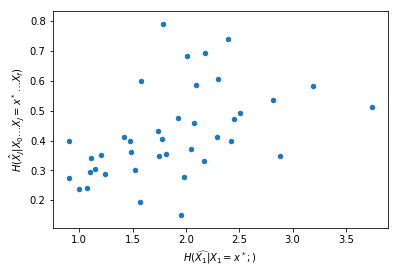

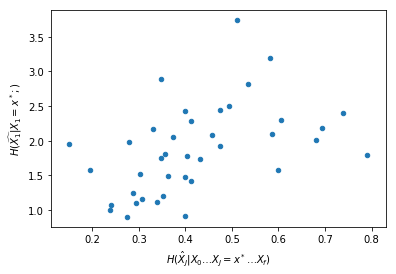

In [437]:
avgCondEntropy_local_vs_global_df.plot.scatter(x='$H(\widehat{X_1}|X_1 = x^*;)$',
                                               y='$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$')
avgCondEntropy_local_vs_global_df.plot.scatter(y='$H(\widehat{X_1}|X_1 = x^*;)$',
                                               x='$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$')

0.15

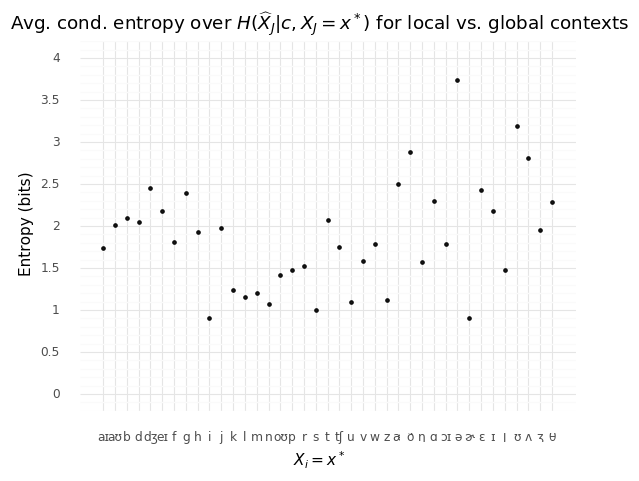

<ggplot: (8762202477064)>

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 14 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


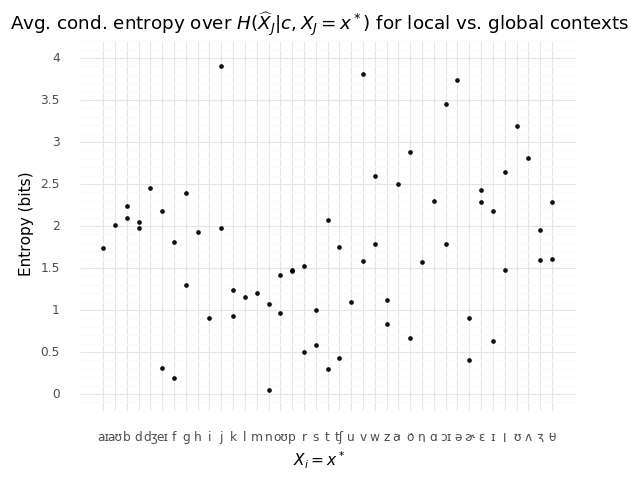

<ggplot: (8762202810667)>

In [413]:
lowAlpha
avgCondEntropy_local_vs_global_plot = plot(H3Xhat1X1_df, 
     x_col = '$x^*$', 
     y_col = '$H(\widehat{X_1}|X_1 = x^*;)$',#:H3Xhat1X1[x_star], 
     title = "Avg. cond. entropy over $H(\widehat{X}_J|c, X_J = x^*)$ for local vs. global contexts", 
     x_label = '$X_i = x^*$', 
     y_label = 'Entropy (bits)', 
     y_min = 0.0,
     y_max = 4.0,
     # size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=0.05,
     # alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
avgCondEntropy_local_vs_global_plot
avgCondEntropy_local_vs_global_plot + geom_jitter(
                                    HXhatiX0f_by_xstar_df,
                                    aes(x='$x^*$', y='$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$'),
                                    size = largeSize, 
                                    alpha = highAlpha, 
                                    width = 0.0, 
                                    height = 4.0)

In [ ]:
# HXhatiprimeX0f_by_xstar = {x_star:{x0f:{i:sum(pXhatiX0f[x0f][i][x_prime] * hXhatiX0f[x0f][i][x_prime]
#                                               for x_prime in Xs)
#                                         for i in indicesOfWwhereXiIs[x_star][x0f]}
#                                    for x0f in getWordformsWithx(x_star)}
#                            for x_star in Xs}
# HXhatiprimeX0f_by_xstar['z']['⋊.d.ɪ.z.ɚ.v.⋉'][3]

In [ ]:
# HXhatiX0f_by_xstar = {x_star:{x0f:{sum(
#     pW_givenX[x_star][x0f] * HXhatiprimeX0f_by_xstar[x_star][x0f]
#                                    for i in indicesOfWwhereXiIs[x_star][x0f]}
#                               for x0f in getWordformsWithx(x_star)}
#                       for x_star in }

In [377]:
HXhatiX0f_by_xstar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 # '$i$':i,
                                                 # '$x_0^{*f}$':x0f,
                                                 '$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$':HXhatiX0f_by_xstar[x_star]}
                                                for x_star in HXhatiX0f_by_xstar 
                                                    # for x0f in HXhatiX0f_by_xstar[x_star]
                                                       # for i in HXhatiX0f_by_xstar[x_star][x0f]
                                                       ])
HXhatiX0f_by_xstar_df.head()

,$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$,$x^*$
0,0.412191,oʊ
1,0.693413,eɪ
2,0.475049,h
3,0.294192,u
4,0.738427,g


In [378]:
HXhatiX0f_by_xstar_df.sort_values('$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$', ascending=False)

,$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$,$x^*$
15,0.791160,ɔɪ
4,0.738427,g
1,0.693413,eɪ
26,0.681185,aʊ
28,0.606411,ɑ
20,0.599700,v
9,0.586704,b
7,0.581529,ʊ
33,0.534167,ʌ
14,0.510728,ə


0.15

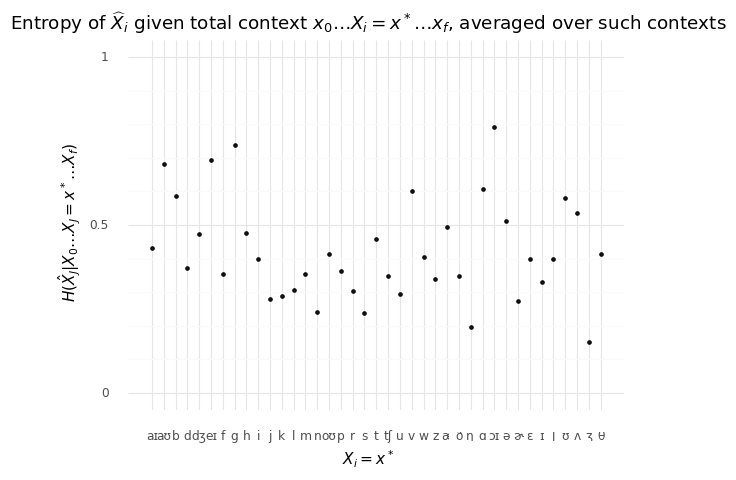

<ggplot: (8762750779498)>

In [379]:
lowAlpha
HXhatiX0f_far = plot(HXhatiX0f_by_xstar_df, 
     x_col = '$x^*$', 
     y_col = '$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$', 
     title = "Entropy of $\widehat{X}_i$ given total context $x_0 \ldots X_i = x^* \ldots x_f$, averaged over such contexts", 
     x_label = '$X_i = x^*$', 
     y_label = '$H(\hat{X}_J | X_0 \ldots X_J = x^* \ldots X_f)$', 
     y_min = 0.0,
     y_max = 1.0,
     # size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=0.05,
     # alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
HXhatiX0f_far

### $h(\widehat{X}_i = x^*|X_i = x^*)$ marginalizing over total contexts

In [ ]:
# HXhatiX0f_by_xstar = {x_star:sum(pJW_givenX[x_star][(tc[1], tc[0])] * HXhatiprimeX0f_by_xstar[x_star][tc[0]][tc[1]]
#                                  for tc in totalContexts[x_star])
#                       for x_star in Xs}

$p(\widehat{X}_J = x'|X_J = x^*) = \sum\limits_{j, x_0 \ldots X_j = x^* \ldots x_f} p(J = j, x_0 \ldots x_f | X_J = x^*) h(\widehat{X_i} = x' | j, x_0 \ldots X_j = x^* \ldots x_f)$

In [436]:
pXhatiprimeXistar_tc = {x_star:{x_prime:sum(pJW_givenX[x_star][(j, x0f)] * pXhatiX0f[x0f][j][x_prime]
                                            for x0f,j in totalContexts[x_star])
                                for x_prime in Xs_lex}
                        for x_star in Xs_lex}
areNormalized(pXhatiprimeXistar_tc)
pXhatiprimeXistar_tc = condDistsAsProbDists(pXhatiprimeXistar_tc)

True

In [386]:
hXhatiprimeXistar_tc = {x_star:{x_prime:h_prime( pXhatiprimeXistar_tc[x_star][x_prime] )
                                for x_prime in Xs_lex}
                        for x_star in Xs_lex}

In [391]:
hXhatistarXistar_tc = {x_star:h_prime( pXhatiprimeXistar_tc[x_star][x_star] )
                        for x_star in Xs_lex}

In [418]:
hXhatistarXistar_tc_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                                 # '$i$':i,
                                                 # '$x_0^{*f}$':x0f,
                                                 '$h(\hat{X}_J = x^* | X_J = x^*)$':hXhatistarXistar_tc[x_star]}
                                                for x_star in hXhatistarXistar_tc 
                                                    # for x0f in hXhatistarXistar_tc[x_star]
                                                       # for i in hXhatistarXistar_tc[x_star][x0f]
                                                       ])
hXhatistarXistar_tc_df.head()

,$h(\hat{X}_J = x^* | X_J = x^*)$,$x^*$
0,0.094367,oʊ
1,0.345439,eɪ
2,0.051441,u
3,0.210560,g
4,0.103362,h


In [419]:
hXhatistarXistar_tc_df.sort_values('$h(\hat{X}_J = x^* | X_J = x^*)$', ascending=False)

,$h(\hat{X}_J = x^* | X_J = x^*)$,$x^*$
1,0.345439,eɪ
3,0.210560,g
17,0.204585,ɔɪ
28,0.178880,aʊ
23,0.162606,d
30,0.160982,ɑ
7,0.158318,ʊ
39,0.137167,æ
10,0.132398,b
19,0.132131,ɛ


0.15

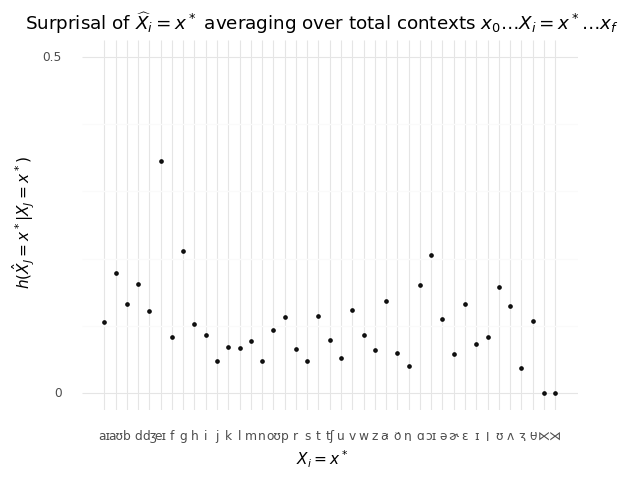

<ggplot: (-9223363274650746466)>

In [421]:
lowAlpha
hXhatistarXistar_tc_far = plot(hXhatistarXistar_tc_df, 
     x_col = '$x^*$', 
     y_col = '$h(\hat{X}_J = x^* | X_J = x^*)$', 
     title = "Surprisal of $\widehat{X}_i = x^*$ averaging over total contexts $x_0 \ldots X_i = x^* \ldots x_f$", 
     x_label = '$X_i = x^*$', 
     y_label = '$h(\hat{X}_J = x^* | X_J = x^*)$', 
     y_min = 0.0,
     y_max = 0.5,
     # size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=0.05,
     # alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
hXhatistarXistar_tc_far

### $i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$

In [ ]:
#KEYPLOT_2L

`KEYPLOT_2L`

$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*) = h(\widehat{X}_i = x^* | X_i = x^*) - h(\widehat{X}_i = x^*| x_0 \ldots x_{i-1}, x_i, x_{i+1} \ldots x_f)$

In [424]:
iXhatiStarX0fXiStar = {x_star:{(x0f, j):hXhatistarXistar_tc[x_star] - hXhatiprimeX0f_by_xstar[x_star][x0f][j][x_star]
                               for x0f,j in totalContexts[x_star]}
                       for x_star in Xs}

In [427]:
iXhatiStarX0fXiStar_df = pd.DataFrame(data=[{"$x^*$":x_star,
                                             "$w$":x0f,
                                             "$i$":j,
                                             "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$":iXhatiStarX0fXiStar[x_star][(x0f, j)]}
                                            for x_star in Xs
                                            for x0f,j in totalContexts[x_star]])
iXhatiStarX0fXiStar_df.head()

,$i$,"$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$",$w$,$x^*$
0,1,-0.589067,⋊.oʊ.m.ɪ.t.⋉,oʊ
1,3,-0.013361,⋊.k.l.oʊ.v.⋉,oʊ
2,4,0.040552,⋊.ɪ.n.b.oʊ.r.d.⋉,oʊ
3,4,0.094367,⋊.n.oʊ.t.oʊ.r.i.ə.s.⋉,oʊ
4,6,0.094367,⋊.ɪ.n.d.ɪ.g.oʊ.⋉,oʊ


In [428]:
iXhatiStarX0fXiStar_df.sort_values("$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", ascending=False)

,$i$,"$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$",$w$,$x^*$
1545,8,0.345439,⋊.æ.k.s.ɛ.n.tʃ.u.eɪ.t.⋉,eɪ
1402,7,0.345439,⋊.g.r.æ.v.ə.t.eɪ.ʃ.ɪ.n.⋉,eɪ
1409,7,0.345439,⋊.f.r.ʌ.s.t.r.eɪ.t.⋉,eɪ
1408,6,0.345439,⋊.ɛ.m.ə.g.r.eɪ.⋉,eɪ
1406,7,0.345439,⋊.k.ɑ.p.j.ʊ.l.eɪ.ʃ.ɪ.n.⋉,eɪ
1405,5,0.345439,⋊.g.æ.ŋ.w.eɪ.⋉,eɪ
1404,9,0.345439,⋊.r.ɪ.f.ɑ.r.ɪ.s.t.eɪ.ʃ.ɪ.n.⋉,eɪ
1403,7,0.345439,⋊.l.oʊ.k.l.ə.z.eɪ.ʃ.ɪ.n.⋉,eɪ
1400,7,0.345439,⋊.f.ɑ.r.n.ə.k.eɪ.ʃ.ɪ.n.⋉,eɪ
1386,1,0.345439,⋊.eɪ.θ.i.ɪ.s.t.⋉,eɪ


0.15

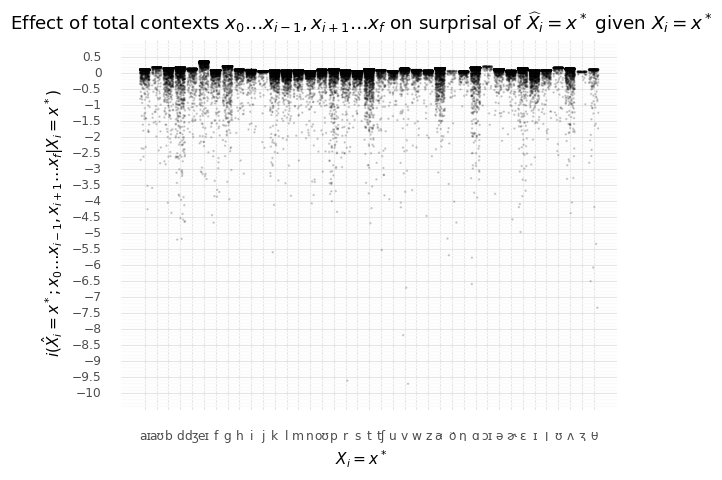

<ggplot: (-9223363274200713500)>

In [429]:
lowAlpha
iXhatiStarX0fXiStar_tc_far = plot(iXhatiStarX0fXiStar_df, 
     x_col = '$x^*$', 
     y_col = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     title = "Effect of total contexts $x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f$ on surprisal of $\widehat{X}_i = x^*$ given $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     y_min = -10.0,
     y_max = 0.5,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
#      alpha=0.05,
     alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
iXhatiStarX0fXiStar_tc_far

0.15

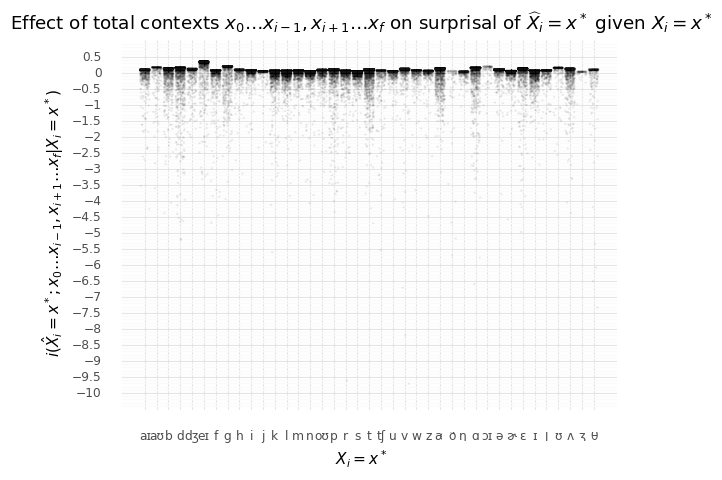

<ggplot: (8762212511871)>

In [430]:
lowAlpha
iXhatiStarX0fXiStar_tc_close = plot(iXhatiStarX0fXiStar_df, 
     x_col = '$x^*$', 
     y_col = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     title = "Effect of total contexts $x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f$ on surprisal of $\widehat{X}_i = x^*$ given $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     y_min = -10.0,
     y_max = 0.5,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
iXhatiStarX0fXiStar_tc_close

0.15

/home/AD/emeinhar/anaconda3/envs/anvil/lib/python3.6/site-packages/plotnine/layer.py:449: UserWarning: geom_jitter : Removed 324 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


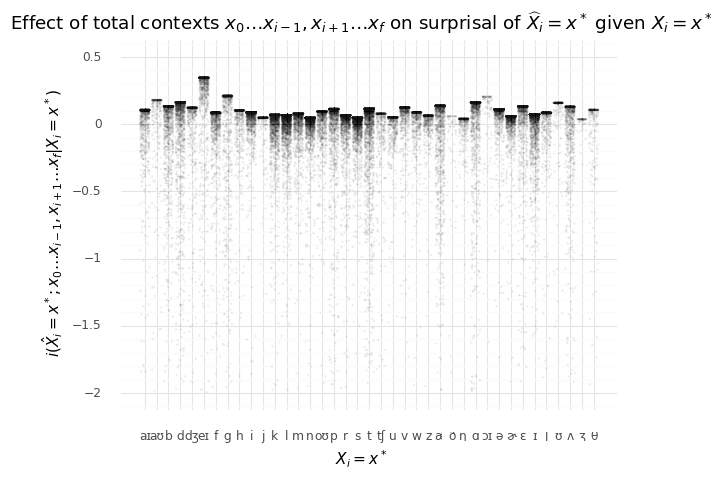

<ggplot: (8762656465391)>

In [447]:
lowAlpha
iXhatiStarX0fXiStar_tc_very_close = plot(iXhatiStarX0fXiStar_df, 
     x_col = '$x^*$', 
     y_col = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     title = "Effect of total contexts $x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f$ on surprisal of $\widehat{X}_i = x^*$ given $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = "$i(\hat{X}_i = x^* ; x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f | X_i = x^*)$", 
     y_min = -2.0,
     y_max = 0.5,
     size=smallSize, 
#      size=medSize,
#      size=largeSize,
     alpha=0.05,
#      alpha=lowAlpha,
#      alpha=medAlpha,
#      alpha=highAlpha,
     width=largeWidth)
iXhatiStarX0fXiStar_tc_very_close

### $I(\hat{X}_i ; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$

In [ ]:
#KEYPLOT_5L

KEYPLOT_5L

$I(\hat{X}_i ; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*) = H(\hat{X}_i|X_i = x^*) - H(\hat{X}_i | X_0 \ldots X_{i-1}, X_i = x^*, X_{i+1} \ldots X_f)$

In [438]:
HXhatiXistar_tc = {x_star:H(pXhatiprimeXistar_tc[x_star])
                        for x_star in Xs_lex}

In [443]:
IXhatiX0f_Xistar = {x_star:HXhatiXistar_tc[x_star] - HXhatiX0f_by_xstar[x_star]
                    for x_star in Xs}

In [442]:
IXhatiX0f_Xistar_df = pd.DataFrame(data=[{'$x^*$':x_star,
                                        # '$i$':i,
                                        # '$x_0^{*f}$':x0f,
                                          '$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$':IXhatiX0f_Xistar[x_star]}
                                                for x_star in IXhatiX0f_Xistar 
                                                    # for x0f in hXhatistarXistar_tc[x_star]
                                                       # for i in hXhatistarXistar_tc[x_star][x0f]
                                                       ])
IXhatiX0f_Xistar_df.head()

,"$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$",$x^*$
0,0.179029,oʊ
1,0.515130,eɪ
2,0.152603,h
3,0.060360,u
4,0.329078,g


In [444]:
IXhatiX0f_Xistar_df.sort_values('$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$', ascending=False)

,"$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$",$x^*$
1,0.515130,eɪ
21,0.356841,d
15,0.331264,ɔɪ
4,0.329078,g
27,0.301767,p
12,0.263020,dʒ
18,0.261392,ɛ
28,0.233663,ɑ
26,0.222490,aʊ
7,0.221903,ʊ


0.15

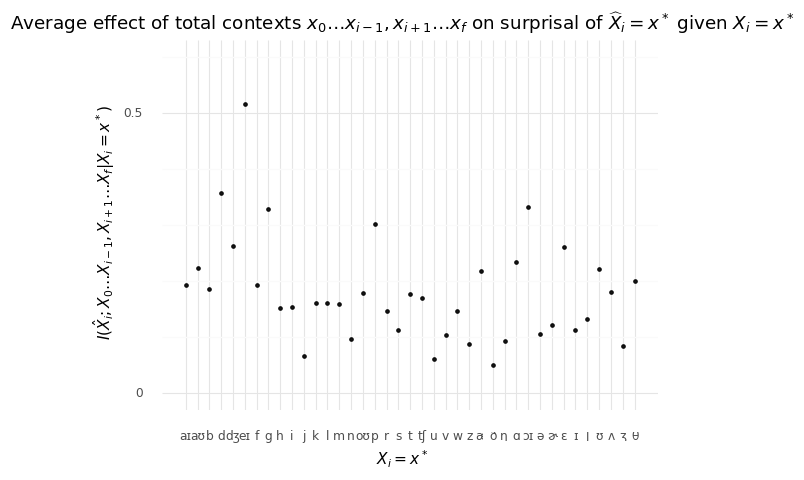

<ggplot: (-9223363274199090635)>

In [446]:
lowAlpha
IXhatiX0f_Xistar_far = plot(IXhatiX0f_Xistar_df, 
     x_col = '$x^*$', 
     y_col = '$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$', 
     title = "Average effect of total contexts $x_0 \ldots x_{i-1}, x_{i+1} \ldots x_f$ on surprisal of $\widehat{X}_i = x^*$ given $X_i = x^*$", 
     x_label = '$X_i = x^*$', 
     y_label = '$I(\hat{X}_i; X_0 \ldots X_{i-1}, X_{i+1} \ldots X_f | X_i = x^*)$', 
     y_min = 0.0,
     y_max = 0.6,
     # size=smallSize, 
#      size=medSize,
     size=largeSize,
#      alpha=0.05,
     # alpha=lowAlpha,
#      alpha=medAlpha,
     alpha=highAlpha,
     width=0.0)
IXhatiX0f_Xistar_far

### Average total contextual perceptual contrast: $D_{\overline{C}}(x^*,x') = D_{JS}(p(Y_i|X_i = x^*) || p(Y_i| X_i = x'))$

In [ ]:
#KEYPLOT_7L

`KEYPLOT_7L`

In [478]:
list(totalContexts['z'])[3]
remove

('⋊.s.ɪ.m.b.ə.l.aɪ.z.⋉', 8)

In [482]:
def removeXj(s, j):
    s_t = ds2t(s)
    s_l = list(s_t)
    s_l[j] = '_'
    s_t = tuple(s_l)
    return t2ds(s_t)

In [483]:
removeXj(list(totalContexts['z'])[3][0], list(totalContexts['z'])[3][1])

'⋊.s.ɪ.m.b.ə.l.aɪ._.⋉'

In [484]:
def punchHole(total_context):
    w = total_context[0]
    j = total_context[1]
    return removeXj(w, j)

In [497]:
def fillIn(context_w_hole, x):
    c_t = ds2t(context_w_hole)
    c_l = [s if s != '_' else x for s in c_t]
    return t2ds(tuple(c_l))

list(totalContexts['z'])[3]
punchHole(list(totalContexts['z'])[3])
fillIn(punchHole(list(totalContexts['z'])[3]), 'z')

('⋊.s.ɪ.m.b.ə.l.aɪ.z.⋉', 8)

'⋊.s.ɪ.m.b.ə.l.aɪ._.⋉'

'⋊.s.ɪ.m.b.ə.l.aɪ.z.⋉'

In [500]:
def get_common_contexts(x_star, x_prime):
    x_star_C = set(map(punchHole, totalContexts[x_star]))
    x_prime_C = set(map(punchHole, totalContexts[x_prime]))
    C = set.intersection(x_star_C, x_prime_C)
    return C

def get_minimal_pairs(x_star, x_prime):
    common_contexts = get_common_contexts(x_star, x_prime)
    star_c = list(map(lambda c: fillIn(c, x_star),
                     common_contexts))
    prime_c = list(map(lambda c: fillIn(c, x_prime),
                     common_contexts))
    return list(zip(star_c, prime_c))

commonContexts = {(x_star, x_prime):get_common_contexts(x_star, x_prime)
                  for x_star, x_prime in product(Xs, Xs)}
noCommonContexts = {(x_star, x_prime) 
                    for x_star, x_prime in commonContexts 
                    if commonContexts[(x_star, x_prime)] == set()}
list(commonContexts[('z','s')])
len(noCommonContexts) / 2
len(set(product(X1s, X1s))) / 2
list(noCommonContexts)[:5]
get_minimal_pairs('z','s')
#     X012s_lex
#     p3Y1X012_lex

['⋊.d.ə.v.aɪ._.⋉',
 '⋊._.i.l.⋉',
 '⋊.s.i._.⋉',
 '⋊.p.r.aɪ._.⋉',
 '⋊.g.r.eɪ._.⋉',
 '⋊._.u.⋉',
 '⋊._.i.⋉',
 '⋊._.ɪ.ŋ.⋉',
 '⋊.m.eɪ._.⋉',
 '⋊.ə.p.i._.⋉',
 '⋊._.ɛ.d.⋉',
 '⋊.b.ʌ._.⋉',
 '⋊.f.eɪ._.⋉',
 '⋊.l.eɪ._.i.⋉',
 '⋊.m.ʌ._.l.⋉',
 '⋊.p.i._.⋉',
 '⋊._.ɪ.ŋ.k.⋉',
 '⋊._.oʊ.n.⋉',
 '⋊._.ɪ.p.⋉',
 '⋊.æ._.⋉',
 '⋊.ə.d.v.aɪ._.⋉',
 '⋊.l.i._.⋉',
 '⋊.k.l.oʊ._.⋉',
 '⋊.r.aɪ._.⋉',
 '⋊.h.ɪ._.⋉',
 '⋊.r.eɪ._.⋉',
 '⋊.d.aɪ.v.ɚ._.⋉',
 '⋊.d.aɪ._.⋉',
 '⋊.n.u._.⋉',
 '⋊.l.u._.⋉',
 '⋊.d.oʊ._.⋉',
 '⋊.h.ɚ._.⋉',
 '⋊.f.ʌ._.⋉']

245.0

760.5

[('ʊ', 'r'), ('ɪ', 'f'), ('ʌ', 'ʒ'), ('æ', 'ʃ'), ('ɔɪ', 'n')]

[('⋊.d.ə.v.aɪ.z.⋉', '⋊.d.ə.v.aɪ.s.⋉'),
 ('⋊.z.i.l.⋉', '⋊.s.i.l.⋉'),
 ('⋊.s.i.z.⋉', '⋊.s.i.s.⋉'),
 ('⋊.p.r.aɪ.z.⋉', '⋊.p.r.aɪ.s.⋉'),
 ('⋊.g.r.eɪ.z.⋉', '⋊.g.r.eɪ.s.⋉'),
 ('⋊.z.u.⋉', '⋊.s.u.⋉'),
 ('⋊.z.i.⋉', '⋊.s.i.⋉'),
 ('⋊.z.ɪ.ŋ.⋉', '⋊.s.ɪ.ŋ.⋉'),
 ('⋊.m.eɪ.z.⋉', '⋊.m.eɪ.s.⋉'),
 ('⋊.ə.p.i.z.⋉', '⋊.ə.p.i.s.⋉'),
 ('⋊.z.ɛ.d.⋉', '⋊.s.ɛ.d.⋉'),
 ('⋊.b.ʌ.z.⋉', '⋊.b.ʌ.s.⋉'),
 ('⋊.f.eɪ.z.⋉', '⋊.f.eɪ.s.⋉'),
 ('⋊.l.eɪ.z.i.⋉', '⋊.l.eɪ.s.i.⋉'),
 ('⋊.m.ʌ.z.l.⋉', '⋊.m.ʌ.s.l.⋉'),
 ('⋊.p.i.z.⋉', '⋊.p.i.s.⋉'),
 ('⋊.z.ɪ.ŋ.k.⋉', '⋊.s.ɪ.ŋ.k.⋉'),
 ('⋊.z.oʊ.n.⋉', '⋊.s.oʊ.n.⋉'),
 ('⋊.z.ɪ.p.⋉', '⋊.s.ɪ.p.⋉'),
 ('⋊.æ.z.⋉', '⋊.æ.s.⋉'),
 ('⋊.ə.d.v.aɪ.z.⋉', '⋊.ə.d.v.aɪ.s.⋉'),
 ('⋊.l.i.z.⋉', '⋊.l.i.s.⋉'),
 ('⋊.k.l.oʊ.z.⋉', '⋊.k.l.oʊ.s.⋉'),
 ('⋊.r.aɪ.z.⋉', '⋊.r.aɪ.s.⋉'),
 ('⋊.h.ɪ.z.⋉', '⋊.h.ɪ.s.⋉'),
 ('⋊.r.eɪ.z.⋉', '⋊.r.eɪ.s.⋉'),
 ('⋊.d.aɪ.v.ɚ.z.⋉', '⋊.d.aɪ.v.ɚ.s.⋉'),
 ('⋊.d.aɪ.z.⋉', '⋊.d.aɪ.s.⋉'),
 ('⋊.n.u.z.⋉', '⋊.n.u.s.⋉'),
 ('⋊.l.u.z.⋉', '⋊.l.u.s.⋉'),
 ('⋊.d.oʊ.z.⋉', '⋊.d.oʊ.s.⋉'),
 ('⋊.h.ɚ.z.⋉', '⋊.h.ɚ.s.⋉'),
 ('⋊

In [489]:
len( commonContexts.keys() )
len( set(commonContexts.keys()) - noCommonContexts )

1521

1031

In [492]:
set(map(punchHole, totalContexts['b']))

{'⋊.ʌ.p._.r.ɪ.ŋ.ɪ.ŋ.⋉',
 '⋊._.ɚ.⋉',
 '⋊._.ɚ.θ.⋉',
 '⋊._.r.ʌ.n.t.⋉',
 '⋊._.eɪ.b.⋉',
 '⋊.ɛ.m._.ɚ.⋉',
 '⋊.ʌ.n.s.t.eɪ._.l.⋉',
 '⋊.ɪ.n.h.æ._.ɪ.t.ɪ.n.t.⋉',
 '⋊._.ɪ.s.t.r.oʊ.⋉',
 '⋊.p.ɑ.s.ɪ._.l.i.⋉',
 '⋊._.æ.θ.h.aʊ.s.⋉',
 '⋊._.r.ɑ.n.z.⋉',
 '⋊.t.æ._.j.ʊ.l.eɪ.ʃ.ɪ.n.⋉',
 '⋊.ɪ.m._.ɑ.r.k.⋉',
 '⋊.ə._.l.aɪ.dʒ.⋉',
 '⋊._.r.eɪ.n.⋉',
 '⋊.s.ʌ._.dʒ.ɪ.g.eɪ.ʃ.ɪ.n.⋉',
 '⋊._.ɪ.m.oʊ.n.⋉',
 '⋊._.ə.k.i.n.i.⋉',
 '⋊.ɪ.n.s.ɚ.m.aʊ.n.t.ə._.l.⋉',
 '⋊.r.u._.i.⋉',
 '⋊.m.æ.s.t.ɚ._.eɪ.t.⋉',
 '⋊._.ɚ.n.t.⋉',
 '⋊.ɪ.g.z.ɪ._.ə.t.⋉',
 '⋊._.eɪ.s.⋉',
 '⋊._.j.u.t.i.⋉',
 '⋊._.ʊ.k.l.ɪ.t.⋉',
 '⋊.r.ɛ._.l.⋉',
 '⋊.m.oʊ._.l.ə.z.eɪ.ʃ.ɪ.n.⋉',
 '⋊._.ɑ.b.l.⋉',
 '⋊.p.æ.s.ɚ._.aɪ.⋉',
 '⋊.l.oʊ._.⋉',
 '⋊.r.ɑ._.ɚ.i.⋉',
 '⋊._.ɪ.h.oʊ.l.d.⋉',
 '⋊.p.l.ɑ.z.ə._.l.⋉',
 '⋊._.ɪ.n.æ.l.ɪ.t.i.⋉',
 '⋊._.oʊ.z.⋉',
 '⋊.g.ʌ.m._.oʊ.⋉',
 '⋊._.r.ɪ.m.⋉',
 '⋊._.r.i.f.⋉',
 '⋊.d.ʌ._.l.ɪ.t.⋉',
 '⋊.t.r.aɪ._.⋉',
 '⋊._.l.ɑ.t.⋉',
 '⋊.l.ɛ.dʒ.ɪ._.l.⋉',
 '⋊.r.ɪ.s.i.v.ə._.l.⋉',
 '⋊.n.oʊ.t.ə._.l.⋉',
 '⋊.t.ə._.æ.k.oʊ.⋉',
 '⋊.r.i.d.ə._.l.⋉',
 '⋊._.ɑ.m.ɚ.⋉',
 '⋊._.ɛ.n.ə.f.ɪ.ʃ.l.⋉',
 

limit_output extension: Maximum message size of 20000 exceeded with 20935 characters

In [ ]:
#BOOKMARK

### Average total contextual discriminability: $\hat{D}_{\overline{C}}(x^*,x') = D_{JS}(p(\hat{X}_i|X_i = x^*) || p(\hat{X}_i| X_i = x'))$

In [ ]:
#KEYPLOT_8L

`KEYPLOT_8L`

### Change in value

### Average change in value 

In [ ]:
#print plots